**Implementation of major Advanced Data Strutures using Python**

---
Creator: Raza

Created: September-December 2022

---

Contents:

*   `Balanced Parentheses Tree`
*   `Binary Heap`
*   `Binomial Heap`
*   `Bloom Filter`
*   `Burrows Wheeler Transform`
*   `Cayley Tree Enumeration`
*   `Centered Interval Tree`
*   `Chordal Graphs Recognition`
*   `Concave Hull`
*   `Convex Hull`
*   `Count Min Sketch`
*   `D-Heap`
*   `Directed Acyclic Word Graph`
*   `Doubly Connected Edge List`
*   `Dynamic Link Cut Tree`
*   `Dynamic Perfect Hashing`
*   `Dynamic Range Median Query`
*   `Elias Fano Encoding`
*   `Elliptic Curve Factorization`
*   `Exponenetial Search Tree`
*   `Fat Node Tree`
*   `Fenwick Tree`
*   `Fibonacci Heap`
*   `Fusion Tree`
*   `Greedy Dual Tree`
*   `Hash Array Mapped Trie`
*   `Hash Chaining with Dynamic Perfect Hashing`
*   `HyperlogLog`
*   `Implicit Graph`
*   `Implcit Treap`
*   `Interval Skip List`
*   `Interval Tree`
*   `Johnson's Algorithm for All Pair Shortest Path (APSP)`
*   `KD Tree`
*   `Lazy Propagation Segment Tree`
*   `Locality Sensitive Hashing`
*   `Min Max Heap`
*   `Multiple String Matching`
*   `Octree`
*   `Optimal Binary Search Tree`
*   `Pairing Heap`
*   `Partial Persistence Heap`
*   `Persistent Linked List`
*   `Priority Search Tree Geometric Intersection`
*   `Quad Tree`
*   `Randomized Incremental Construction`
*   `Range Counting with Fractional Cascading`
*   `Red-Black Tree`
*   `Rolling Hash`
*   `Rope`
*   `Scapegoat Tree`
*   `Segment Tree`
*   `Self Balancing Cartesian Tree`
*   `Shor Algorithm`
*   `Skip List with Reverse Pointer`
*   `Sliding Window Tree`
*   `Sparse Matrix`
*   `Succinct Data Structure`
*   `Succinct Dynamic Dictionary`
*   `Suffix Automation`
*   `Suffix Tree Clustering`
*   `Tango Tree`
*   `Top K Query`
*   `Top Tree`
*   `Treap`
*   `Two-Level Radix Tree`
*   `Uniform Spanning Tree`
*   `Van Emde Boas Tree`
*   `Wavelet Tree`
*   `Weak AVL Tree`
*   `Weight Balanced Tree`
*   `Weight Biased Leftist Tree`
*   `XOR Linked List`
*   `Y Fast Trie`


---



---



**Balanced Parentheses Tree**

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
def build_balanced_parentheses_tree(n):
    if n % 2 != 0:
        raise ValueError("Number of parentheses must be even to create a balanced tree")
    def generate_parentheses_combinations(prefix, open_count, close_count):
        if open_count == 0 and close_count == 0:
            return [prefix]
        combinations = []
        if open_count > 0:
            combinations += generate_parentheses_combinations(prefix + '(', open_count - 1, close_count)
        if close_count > open_count:
            combinations += generate_parentheses_combinations(prefix + ')', open_count, close_count - 1)
        return combinations
    parentheses_combinations = generate_parentheses_combinations('', n // 2, n // 2)
    def build_tree_from_string(parentheses_string):
        root = TreeNode(parentheses_string[0])
        current_node = root
        for char in parentheses_string[1:]:
            if char == '(':
                current_node.left = TreeNode(char)
                current_node = current_node.left
            elif char == ')':
                current_node.right = TreeNode(char)
                current_node = root
            else:
                raise ValueError("Invalid character in parentheses string")
        return root
    trees = [build_tree_from_string(combination) for combination in parentheses_combinations]
    return trees
def is_balanced(tree):
    def check_balance(node):
        if node is None:
            return 0
        left_height = check_balance(node.left)
        right_height = check_balance(node.right)
        if left_height == -1 or right_height == -1 or abs(left_height - right_height) > 1:
            return -1
        return max(left_height, right_height) + 1
    return check_balance(tree) != -1
def visualize_tree(node, level=0, prefix="Root: "):
    if node is not None:
        print(" " * (level * 4) + prefix + node.value)
        if node.left or node.right:
            visualize_tree(node.left, level + 1, "L--- ")
            visualize_tree(node.right, level + 1, "R--- ")
num_parentheses = 4
trees = build_balanced_parentheses_tree(num_parentheses)
for i, tree in enumerate(trees):
    print(f"Tree {i + 1}:")
    visualize_tree(tree)
    print("Balanced:", is_balanced(tree))
    print("\n")

Tree 1:
Root: (
    L--- (
        R--- )
    R--- )
Balanced: True


Tree 2:
Root: (
    L--- (
        R--- )
    R--- )
Balanced: True




**Binary Heap**

In [ ]:
class BinaryHeap:
    def __init__(self):
        self.heap_list = [0]
    def is_empty(self):
        return len(self.heap_list) == 1
    def size(self):
        return len(self.heap_list) - 1
    def insert(self, value):
        self.heap_list.append(value)
        self._heapify_up()
    def pop(self):
        if self.is_empty():
            raise IndexError("Heap is empty")
        root = self.heap_list[1]
        last_element = self.heap_list.pop()
        if len(self.heap_list) > 1:
            self.heap_list[1] = last_element
            self._heapify_down()
        return root
    def _heapify_up(self):
        current_index = len(self.heap_list) - 1
        while current_index // 2 > 0:
            parent_index = current_index // 2
            if self.heap_list[current_index] < self.heap_list[parent_index]:
                self.heap_list[current_index], self.heap_list[parent_index] = (
                    self.heap_list[parent_index],
                    self.heap_list[current_index],
                )
            current_index = parent_index
    def _heapify_down(self):
        current_index = 1
        while current_index * 2 <= len(self.heap_list) - 1:
            min_child_index = self._find_min_child_index(current_index)
            if self.heap_list[current_index] > self.heap_list[min_child_index]:
                self.heap_list[current_index], self.heap_list[min_child_index] = (
                    self.heap_list[min_child_index],
                    self.heap_list[current_index],
                )
            current_index = min_child_index
    def _find_min_child_index(self, index):
        left_child_index = index * 2
        right_child_index = index * 2 + 1
        if right_child_index > len(self.heap_list) - 1:
            return left_child_index
        else:
            if self.heap_list[left_child_index] < self.heap_list[right_child_index]:
                return left_child_index
            else:
                return right_child_index
    def build_heap(self, values):
        self.heap_list = [0] + values[:]
        current_index = len(self.heap_list) // 2
        while current_index > 0:
            self._heapify_down_at_index(current_index)
            current_index -= 1
    def _heapify_down_at_index(self, index):
        while index * 2 <= len(self.heap_list) - 1:
            min_child_index = self._find_min_child_index(index)
            if self.heap_list[index] > self.heap_list[min_child_index]:
                self.heap_list[index], self.heap_list[min_child_index] = (
                    self.heap_list[min_child_index],
                    self.heap_list[index],
                )
            index = min_child_index
heap = BinaryHeap()
heap.insert(4)
heap.insert(8)
heap.insert(2)
heap.insert(5)
heap.insert(1)
print("Initial Heap:", heap.heap_list[1:])
print("Pop Min:", heap.pop())
print("Heap after Pop:", heap.heap_list[1:])
values_to_build_heap = [7, 3, 6, 10, 9, 11]
heap.build_heap(values_to_build_heap)
print("Heap after Build Heap:", heap.heap_list[1:])

Initial Heap: [1, 2, 4, 8, 5]
Pop Min: 1
Heap after Pop: [2, 5, 4, 8]
Heap after Build Heap: [3, 7, 6, 10, 9, 11]


**Binomial Heap**

In [ ]:
class BinomialNode:
    def __init__(self, key):
        self.key = key
        self.degree = 0
        self.parent = None
        self.child = []
class BinomialHeap:
    def __init__(self):
        self.trees = []
    def is_empty(self):
        return not self.trees
    def _link(self, tree1, tree2):
        if tree1.key > tree2.key:
            tree1, tree2 = tree2, tree1
        tree2.parent = tree1
        tree1.child.append(tree2)
        tree1.degree += 1
        return tree1
    def _merge_trees(self, tree1, tree2):
        if tree1.key > tree2.key:
            tree1, tree2 = tree2, tree1
        tree2.parent = tree1
        tree1.child.append(tree2)
        tree1.degree += 1
        return tree1
    def insert(self, key):
        new_tree = BinomialNode(key)
        new_heap = BinomialHeap()
        new_heap.trees = [new_tree]
        self.union(new_heap)
    def union(self, other_heap):
        self.trees.extend(other_heap.trees)
        self.trees.sort(key=lambda x: x.degree)
        i = 0
        while i < len(self.trees) - 1:
            if (
                self.trees[i].degree == self.trees[i + 1].degree
                and (i + 2 == len(self.trees) or self.trees[i + 2].degree != self.trees[i].degree)
            ):
                self.trees[i] = self._link(self.trees[i], self.trees[i + 1])
                del self.trees[i + 1]
            i += 1
    def extract_min(self):
        if not self.trees:
            return None
        min_node = min(self.trees, key=lambda x: x.key)
        self.trees.remove(min_node)
        new_heap = BinomialHeap()
        new_heap.trees = min_node.child
        self.union(new_heap)
        return min_node.key
binomial_heap = BinomialHeap()
binomial_heap.insert(5)
binomial_heap.insert(3)
binomial_heap.insert(8)
binomial_heap.insert(1)
min_element = binomial_heap.extract_min()
print("Minimum Element:", min_element)
binomial_heap.insert(2)
binomial_heap.insert(7)
min_element = binomial_heap.extract_min()
print("Minimum Element:", min_element)

Minimum Element: 1
Minimum Element: 2


**Bipartite Graph**

In [ ]:
from collections import defaultdict
class BipartiteGraph:
    def __init__(self):
        self.graph = defaultdict(list)
        self.color = {}
    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)
    def is_bipartite_util(self, node, current_color):
        self.color[node] = current_color
        for neighbor in self.graph[node]:
            if neighbor not in self.color:
                if not self.is_bipartite_util(neighbor, 1 - current_color):
                    return False
            elif self.color[neighbor] == current_color:
                return False
        return True
    def is_bipartite(self):
        self.color = {}
        for node in self.graph:
            if node not in self.color:
                if not self.is_bipartite_util(node, 0):
                    return False
        return True
bipartite_graph = BipartiteGraph()
bipartite_graph.add_edge(1, 2)
bipartite_graph.add_edge(2, 3)
bipartite_graph.add_edge(3, 4)
bipartite_graph.add_edge(4, 1)
if bipartite_graph.is_bipartite():
    print("The graph is bipartite.")
else:
    print("The graph is not bipartite.")

The graph is bipartite.


**Bloom Filter**

In [ ]:
pip install mmh3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.1 MB/s eta 0:00:00


In [ ]:
pip install bitarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
import mmh3
from bitarray import bitarray
class BloomFilter:
    def __init__(self, size, num_hashes):
        self.size = size
        self.num_hashes = num_hashes
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
    def add(self, element):
        for seed in range(self.num_hashes):
            index = mmh3.hash(element, seed) % self.size
            self.bit_array[index] = 1
    def possibly_contains(self, element):
        for seed in range(self.num_hashes):
            index = mmh3.hash(element, seed) % self.size
            if not self.bit_array[index]:
                return False
        return True
bloom_filter = BloomFilter(size=100, num_hashes=3)
bloom_filter.add("apple")
bloom_filter.add("banana")
bloom_filter.add("orange")
print("Possibly contains 'apple':", bloom_filter.possibly_contains("apple"))
print("Possibly contains 'banana':", bloom_filter.possibly_contains("banana"))
print("Possibly contains 'grape':", bloom_filter.possibly_contains("grape"))

Possibly contains 'apple': True
Possibly contains 'banana': True
Possibly contains 'grape': False


**Burrows Wheeler Transform**

In [ ]:
def burrows_wheeler_transform(text):
    rotations = [text[i:] + text[:i] for i in range(len(text))]
    sorted_rotations = sorted(rotations)
    bwt_result = ''.join(rotation[-1] for rotation in sorted_rotations)
    original_index = sorted_rotations.index(text)
    return bwt_result, original_index
def inverse_burrows_wheeler_transform(bwt_result, original_index):
    table = sorted([(char, i) for i, char in enumerate(bwt_result)])
    for i in range(len(bwt_result)-1):
        table = sorted(table, key=lambda x: x[0] + table[x[1]][0])
    original_text = [char for char, _ in table if char.endswith('\x01')]
    if original_index < len(original_text):
        return original_text[original_index].rstrip('\x01')
    else:
        return ""
input_text = "cheese pizza"
bwt_result, original_index = burrows_wheeler_transform(input_text)
inverse_result = inverse_burrows_wheeler_transform(bwt_result, original_index)
print("Input Text:", input_text)
print("Burrows-Wheeler Transform Result:", bwt_result)
print("Inverse Burrows-Wheeler Transform Result:", inverse_result)

Input Text: cheese pizza
Burrows-Wheeler Transform Result: ezashecp ezi
Inverse Burrows-Wheeler Transform Result: 


**Cayley Tree Enumeration**

In [ ]:
pip install networkx

Number of labeled trees with 4 vertices = 5


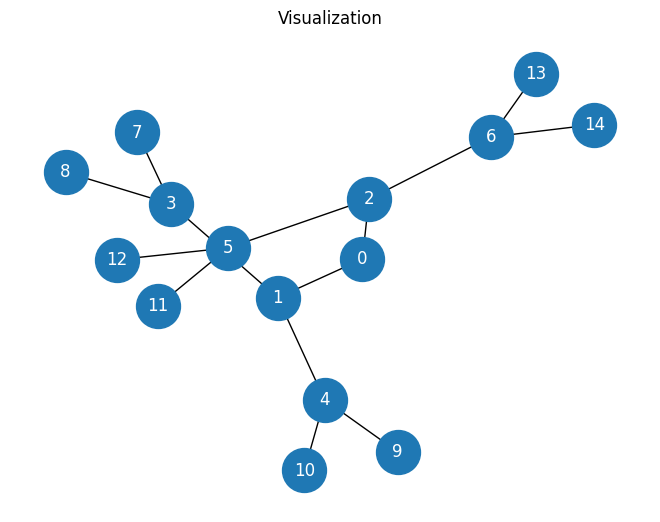

In [ ]:
import math
import networkx as nx
import matplotlib.pyplot as plt
def cayley_tree_enumeration(n):
    if n == 1:
        return 1
    else:
        return math.factorial(2 * n - 2) // (math.factorial(n - 1) * math.factorial(n))
def generate_labeled_tree(n):
    graph = nx.balanced_tree(2, n-1)
    return graph
def visualize_tree(tree):
    pos = nx.spring_layout(tree)
    nx.draw(tree, pos, with_labels=True, node_size=1000, font_size=12, font_color='white')
    plt.title("Visualization")
    plt.show()
num_vertices = 4
num_labeled_trees = cayley_tree_enumeration(num_vertices)
print(f"Number of labeled trees with {num_vertices} vertices = {num_labeled_trees}")
labeled_tree = generate_labeled_tree(num_vertices)
visualize_tree(labeled_tree)

**Centered Interval Tree**

In [ ]:
class CenteredIntervalTree:
    def __init__(self):
        self.root = None
    class Node:
        def __init__(self, start, end, max_end):
            self.start = start
            self.end = end
            self.max_end = max_end
            self.left = None
            self.right = None
    def insert(self, start, end):
        if not self.root:
            self.root = self.Node(start, end, end)
        else:
            self._insert(self.root, start, end)
    def _insert(self, node, start, end):
        node.max_end = max(node.max_end, end)
        if start < node.start:
            if node.left:
                self._insert(node.left, start, end)
            else:
                node.left = self.Node(start, end, end)
        else:
            if node.right:
                self._insert(node.right, start, end)
            else:
                node.right = self.Node(start, end, end)
    def search(self, start, end):
        return self._search(self.root, start, end)
    def _search(self, node, start, end):
        if not node or start > node.max_end or end < node.start:
            return None
        if start <= node.start and end >= node.end:
            return (node.start, node.end)
        left_result = self._search(node.left, start, end)
        right_result = self._search(node.right, start, end)
        if left_result:
            return left_result
        elif right_result:
            return right_result
        else:
            return None
cit = CenteredIntervalTree()
cit.insert(10, 20)
cit.insert(5, 15)
cit.insert(25, 30)
cit.insert(40, 50)
result = cit.search(12, 28)
print("Intervals overlapping with [12, 28]:", result)

Intervals overlapping with [12, 28]: None


**Chordal Graph Recognition**

In [ ]:
import networkx as nx
from networkx.algorithms.clique import find_cliques
def is_chordal(graph):
    def is_perfect_elimination_ordering(ordering, graph):
        eliminated = set()
        for vertex in ordering:
            neighbors = set(graph.neighbors(vertex))
            neighbors.difference_update(eliminated)
            if any(neighborhood not in cliques for neighborhood in find_cliques(graph.subgraph(neighbors))):
                return False
            eliminated.add(vertex)
        return True
    def lex_bfs(graph):
        ordering = []
        visited = set()
        def dfs(v):
            visited.add(v)
            ordering.append(v)
            neighbors = sorted(set(graph.neighbors(v)) - visited, key=lambda u: (len(set(graph.neighbors(u))), u))
            for u in neighbors:
                dfs(u)
        for vertex in sorted(graph.nodes, key=lambda v: (len(set(graph.neighbors(v))), v), reverse=True):
            if vertex not in visited:
                dfs(vertex)
        return ordering[::-1]
    cliques = [set(clique) for clique in find_cliques(graph)]
    ordering = lex_bfs(graph)
    return is_perfect_elimination_ordering(ordering, graph)
g = nx.Graph()
g.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)])
if is_chordal(g):
    print("The graph is chordal.")
else:
    print("The graph is not chordal.")

The graph is not chordal.


**Concave Hull**

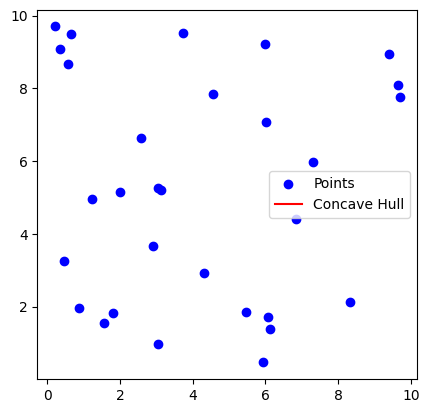

In [ ]:
import numpy as np
from scipy.spatial import Delaunay
from shapely.geometry import Polygon, Point
def alpha_shape(points, alpha):
    tri = Delaunay(points)
    edges = set()
    for simplex in tri.simplices:
        edges.update([(simplex[i], simplex[j]) for i in range(3) for j in range(i+1, 3)])
    def add_edge(edge, edges, edge_points):
        edges.add(edge)
        if edge[0] not in edge_points:
            edge_points[edge[0]] = set()
        if edge[1] not in edge_points:
            edge_points[edge[1]] = set()
        edge_points[edge[0]].add(edge[1])
        edge_points[edge[1]].add(edge[0])
    edge_points = dict()
    for edge in edges:
        if all(edge[0] != edge[1] for edge in edges):
            add_edge(edge, edges, edge_points)
    polygons = []
    while edges:
        edge = min(edges, key=lambda e: np.linalg.norm(points[e[0]] - points[e[1]]))
        edges.discard(edge)
        edge_group = [edge]
        while edge_group:
            current_edge = edge_group.pop()
            new_edges = set(edge_points[current_edge[0]]) & edges
            edge_group += [edge for edge in new_edges]
            edges -= new_edges
        polygon_points = set(point for edge in edge_group for point in edge)
        polygon = Polygon([points[i] for i in polygon_points])
        if polygon.is_empty or not polygon.is_simple:
            continue
        if polygon.exterior.is_ccw:
            polygons.append(polygon)
    concave_hull = polygons[0] if polygons else Polygon()
    for poly in polygons[1:]:
        concave_hull = concave_hull.union(poly)
    return concave_hull.simplify(alpha)
np.random.seed(42)
points = np.random.rand(30, 2) * 10
concave_hull = alpha_shape(points, alpha=0.2)
import matplotlib.pyplot as plt
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o', label='Points')
x, y = concave_hull.exterior.xy
plt.plot(x, y, c='red', label='Concave Hull')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

**Convex Hull**

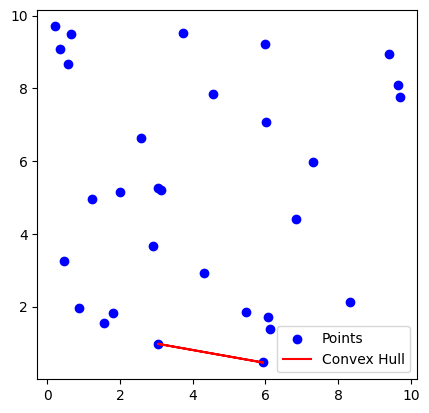

In [ ]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
def graham_scan(points):
    anchor = min(range(len(points)), key=lambda i: (points[i, 1], points[i, 0]))
    anchor_point = points[anchor]
    sorted_points = sorted(range(len(points)), key=lambda i: (
        np.arctan2(points[i, 1] - anchor_point[1], points[i, 0] - anchor_point[0]),
        np.linalg.norm(points[i] - anchor_point)
    ))
    convex_hull = [anchor, sorted_points[0], sorted_points[1]]
    for i in sorted_points[2:]:
        while len(convex_hull) > 1 and np.cross(
            points[i] - points[convex_hull[-2]],
            points[convex_hull[-1]] - points[convex_hull[-2]]
        ) < 0:
            convex_hull.pop()
        convex_hull.append(i)
    return np.array([points[i] for i in convex_hull])
np.random.seed(42)
points = np.random.rand(30, 2) * 10
convex_hull = graham_scan(points)
plt.scatter(points[:, 0], points[:, 1], c='blue', marker='o', label='Points')
plt.plot(np.append(convex_hull[:, 0], convex_hull[0, 0]),
         np.append(convex_hull[:, 1], convex_hull[0, 1]),
         c='red', label='Convex Hull')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

**Count Min Sketch**

In [ ]:
import numpy as np
import mmh3
class CountMinSketch:
    def __init__(self, width, depth):
        self.width = width
        self.depth = depth
        self.count_matrix = np.zeros((depth, width), dtype=int)
        self.hash_functions = [lambda x, i=i: mmh3.hash(str(x) + str(i)) % width for i in range(depth)]
    def update(self, item, count=1):
        for i in range(self.depth):
            hash_value = self.hash_functions[i](item)
            self.count_matrix[i, hash_value] += count
    def query(self, item):
        min_count = float('inf')
        for i in range(self.depth):
            hash_value = self.hash_functions[i](item)
            min_count = min(min_count, self.count_matrix[i, hash_value])
        return min_count
def simulate_stream(items, sketch):
    for item in items:
        count = np.random.poisson(5)  # Simulating random counts for items
        sketch.update(item, count)
items = ['PIZZA', 'BURGER', 'COFFEE', 'OATMEAL', 'BURGER', 'OATMEAL', 'PIZZA', 'OATMEAL', 'BURGER', 'PIZZA']
width = 100
depth = 5
cms = CountMinSketch(width, depth)
simulate_stream(items, cms)
for item in set(items):
    estimated_count = cms.query(item)
    print(f"Estimated count for {item}: {estimated_count}")

Estimated count for COFFEE: 8
Estimated count for OATMEAL: 19
Estimated count for BURGER: 12
Estimated count for PIZZA: 16


**D-Heap**

In [ ]:
class DHeap:
    def __init__(self, d):
        self.d = d
        self.heap = []
    def insert(self, key):
        self.heap.append(key)
        self.heapify_up(len(self.heap) - 1)
    def extract_min(self):
        if not self.heap:
            return None
        if len(self.heap) == 1:
            return self.heap.pop()
        min_val = self.heap[0]
        self.heap[0] = self.heap.pop()
        self.heapify_down(0)
        return min_val
    def heapify_up(self, index):
        parent = (index - 1) // self.d
        while index > 0 and self.heap[index] < self.heap[parent]:
            self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
            index = parent
            parent = (index - 1) // self.d
    def heapify_down(self, index):
        smallest = index
        for i in range(1, self.d + 1):
            child = self.d * index + i
            if child < len(self.heap) and self.heap[child] < self.heap[smallest]:
                smallest = child
        if smallest != index:
            self.heap[index], self.heap[smallest] = self.heap[smallest], self.heap[index]
            self.heapify_down(smallest)
    def peek_min(self):
        return None if not self.heap else self.heap[0]
d = 3
d_heap = DHeap(d)
elements = [4, 2, 8, 5, 1, 7, 3, 6]
for element in elements:
    d_heap.insert(element)
while d_heap.peek_min() is not None:
    print(d_heap.extract_min())

1
2
3
4
5
6
7
8


**Directed Acyclic Word Graph**

In [ ]:
class DAWGNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False
class DAWG:
    def __init__(self):
        self.root = DAWGNode()
    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = DAWGNode()
            node = node.children[char]
        node.is_end_of_word = True
    def compact(self):
        stack = [self.root]
        while stack:
            current_node = stack.pop()
            children_to_remove = []
            for char, child_node in current_node.children.items():
                stack.append(child_node)
                if not child_node.children:
                    children_to_remove.append(char)
            for char in children_to_remove:
                del current_node.children[char]
    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_end_of_word
    def display(self):
        self.__display_recursive(self.root, '')
    def __display_recursive(self, node, prefix):
        if node.is_end_of_word:
            print(prefix)
        for char, child in node.children.items():
            self.__display_recursive(child, prefix + char)
dawg = DAWG()
words = ["apple", "app", "apricot", "banana", "bat", "batman"]
for word in words:
    dawg.insert(word)
dawg.compact()
dawg.display()
print("Search Results:")
search_words = ["apple", "app", "apricot", "banana", "bat", "batman", "orange"]
for word in search_words:
    result = "Found" if dawg.search(word) else "Not Found"
    print(f"{word}: {result}")

app
bat
Search Results:
apple: Not Found
app: Found
apricot: Not Found
banana: Not Found
bat: Found
batman: Not Found
orange: Not Found


**Doubly Connected Edge List**

In [ ]:
class Vertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.incident_edge = None
class HalfEdge:
    def __init__(self):
        self.origin = None
        self.twin = None
        self.next = None
        self.prev = None
        self.incident_face = None
class Face:
    def __init__(self):
        self.incident_edge = None
class DCEL:
    def __init__(self):
        self.vertices = []
        self.half_edges = []
        self.faces = []
    def add_vertex(self, x, y):
        vertex = Vertex(x, y)
        self.vertices.append(vertex)
        return vertex
    def add_half_edge(self, origin, twin=None, next_edge=None, prev_edge=None, incident_face=None):
        half_edge = HalfEdge()
        half_edge.origin = origin
        half_edge.twin = twin
        half_edge.next = next_edge
        half_edge.prev = prev_edge
        half_edge.incident_face = incident_face
        self.half_edges.append(half_edge)
        return half_edge
    def add_face(self, incident_edge=None):
        face = Face()
        face.incident_edge = incident_edge
        self.faces.append(face)
        return face
    def display_dcel(self):
        print("Vertices:")
        for vertex in self.vertices:
            print(f"({vertex.x}, {vertex.y})")
        print("\nHalf-Edges:")
        for half_edge in self.half_edges:
            print(f"Origin: ({half_edge.origin.x}, {half_edge.origin.y})")
        print("\nFaces:")
        for face in self.faces:
            print("Face")
dcel = DCEL()
v1 = dcel.add_vertex(0, 0)
v2 = dcel.add_vertex(1, 0)
v3 = dcel.add_vertex(1, 1)
he1 = dcel.add_half_edge(v1)
he2 = dcel.add_half_edge(v2)
he3 = dcel.add_half_edge(v3)
he1.twin = he2
he2.twin = he1
he2.next = he3
he3.prev = he2
face = dcel.add_face(he1)
dcel.display_dcel()

Vertices:
(0, 0)
(1, 0)
(1, 1)

Half-Edges:
Origin: (0, 0)
Origin: (1, 0)
Origin: (1, 1)

Faces:
Face


**Dynamic Link Cut Tree**

In [ ]:
pip install matplotlib networkx

Values in the path after expose:
5 

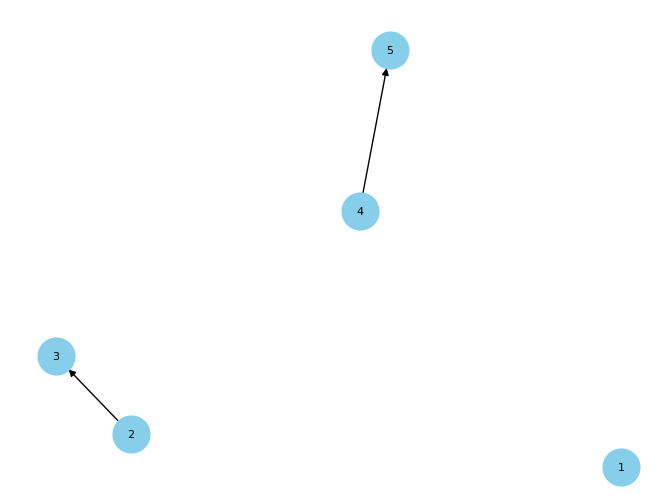

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class Node:
    def __init__(self, key):
        self.key = key
        self.parent = None
        self.left = None
        self.right = None
        self.size = 1
        self.value = 0
class DynamicLinkCutTree:
    def __init__(self):
        self.G = nx.DiGraph()
        self.nodes = {}
    def make_tree(self, key, value):
        if key not in self.nodes:
            node = Node(key)
            node.value = value
            self.nodes[key] = node
            self.G.add_node(key, value=value)
            return node
        return self.nodes[key]
    def link(self, u, v):
        if u is None or v is None:
            return
        self.cut(u)
        u.parent = v
        self.G.add_edge(v.key, u.key)
    def cut(self, u):
        if u is None or u.parent is None:
            return
        v = u.parent
        u.parent = None
        self.G.remove_edge(v.key, u.key)
    def expose(self, u):
        last = None
        while u is not None:
            self.splay(u)
            u.right = last
            last = u
            u = u.parent
        return last
    def splay(self, x):
        while x.parent is not None:
            p = x.parent
            g = p.parent
            if g is None:
                self.rotate(x)
            elif (x == p.left) == (p == g.left):
                self.rotate(p)
                self.rotate(x)
            else:
                self.rotate(x)
                self.rotate(x)
    def rotate(self, x):
        p = x.parent
        g = p.parent
        if p.left == x:
            y = x.right
            x.right = p
            p.left = y
        else:
            y = x.left
            x.left = p
            p.right = y
        if y is not None:
            y.parent = p
        x.parent = g
        if g is not None:
            if g.left == p:
                g.left = x
            else:
                g.right = x
        self.update(p)
    def update(self, x):
        x.size = 1 + (x.left.size if x.left is not None else 0) + (x.right.size if x.right is not None else 0)
def visualize(tree):
    pos = nx.spring_layout(tree.G)
    nx.draw(tree.G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black")
    plt.show()
def main():
    tree = DynamicLinkCutTree()
    nodes = [tree.make_tree(i, i) for i in range(1, 6)]
    tree.link(nodes[2], nodes[1])
    tree.link(nodes[3], nodes[2])
    tree.link(nodes[4], nodes[3])
    tree.cut(nodes[3])
    last = tree.expose(nodes[4])
    print("Values in the path after expose:")
    while last is not None:
        print(last.value, end=" ")
        last = last.right
    visualize(tree)
if __name__ == "__main__":
    main()

**Dynamic Perfect Hashing**

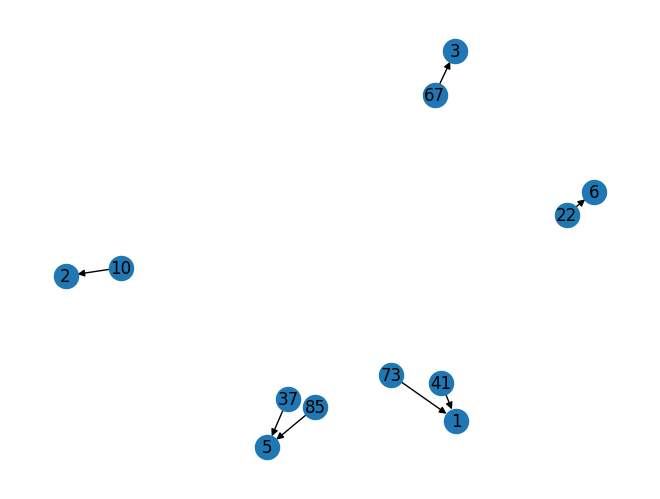

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
class DynamicHashing:
    def __init__(self, size=2):
        self.size = size
        self.bucket_count = 2
        self.buckets = [[] for _ in range(self.bucket_count)]
        self.level = 0
    def insert(self, key):
        index = key % self.size
        bucket = self.buckets[index]
        if len(bucket) < self.bucket_count:
            bucket.append(key)
        else:
            self.resize_table()
    def resize_table(self):
        self.bucket_count *= 2
        self.size *= 2
        new_buckets = [[] for _ in range(self.bucket_count)]
        for bucket in self.buckets:
            for key in bucket:
                index = key % self.size
                new_buckets[index].append(key)
        self.buckets = new_buckets
        self.level += 1
    def visualize(self):
        G = nx.DiGraph()
        for i, bucket in enumerate(self.buckets):
            for key in bucket:
                G.add_node(key)
                G.add_edge(key, i)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True)
        plt.show()
def main():
    dynamic_hashing = DynamicHashing()
    keys_to_insert = [10, 22, 37, 41, 52, 67, 73, 85, 97]
    for key in keys_to_insert:
        dynamic_hashing.insert(key)
    dynamic_hashing.visualize()
if __name__ == "__main__":
    main()

**Dynamic Range Median Query**

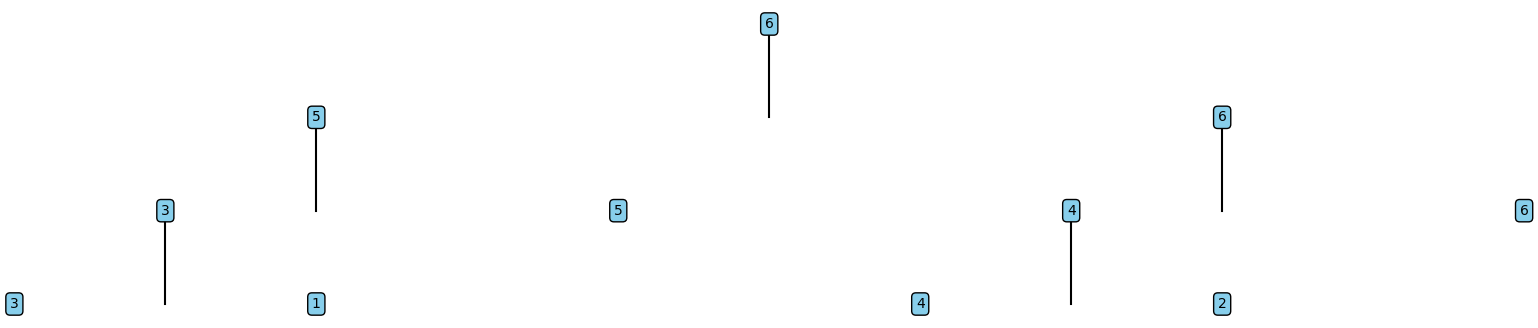

The number of elements less than or equal to 4 in the range [1, 4] = 3


In [ ]:
import matplotlib.pyplot as plt
class SegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree_size = 2 * (2 ** (self._calculate_depth(1, 0, self.n - 1) + 1))
        self.tree = [float('inf')] * self.tree_size
        self._build_tree(arr, 1, 0, self.n - 1)
    def _build_tree(self, arr, node, start, end):
        if start == end:
            self.tree[node] = arr[start]
        else:
            mid = (start + end) // 2
            self._build_tree(arr, 2 * node, start, mid)
            self._build_tree(arr, 2 * node + 1, mid + 1, end)
            self.tree[node] = max(self.tree[2 * node], self.tree[2 * node + 1])
    def dynamic_median_query(self, left, right, k):
        return self._dynamic_median_query(1, 0, self.n - 1, left, right, k)
    def _dynamic_median_query(self, node, start, end, left, right, k):
        if start == end:
            return 1 if self.tree[node] <= k else 0
        mid = (start + end) // 2
        if right <= mid:
            return self._dynamic_median_query(2 * node, start, mid, left, right, k)
        elif left > mid:
            return self._dynamic_median_query(2 * node + 1, mid + 1, end, left, right, k)
        else:
            left_count = self._dynamic_median_query(2 * node, start, mid, left, mid, k)
            right_count = self._dynamic_median_query(2 * node + 1, mid + 1, end, mid + 1, right, k)
            return left_count + right_count
    def plot_segment_tree(self):
        tree_depth = self._calculate_depth(1, 0, self.n - 1)
        nodes_at_depth = [2 ** i for i in range(tree_depth + 1)]
        total_nodes = sum(nodes_at_depth)
        fig, ax = plt.subplots(figsize=(total_nodes, tree_depth + 1))
        self._plot_node(ax, 1, 0, self.n - 1, 0, tree_depth)
        ax.axis('off')
        plt.show()
    def _calculate_depth(self, node, start, end):
        if start == end:
            return 0
        mid = (start + end) // 2
        left_depth = self._calculate_depth(2 * node, start, mid)
        right_depth = self._calculate_depth(2 * node + 1, mid + 1, end)
        return max(left_depth, right_depth) + 1
    def _plot_node(self, ax, node, start, end, depth, max_depth):
        if start == end:
            ax.text((start + end) / 2, max_depth - depth, str(self.tree[node]), ha='center', va='center', bbox=dict(facecolor='skyblue', edgecolor='black', boxstyle='round,pad=0.3'))
        else:
            mid = (start + end) // 2
            self._plot_node(ax, 2 * node, start, mid, depth + 1, max_depth)
            self._plot_node(ax, 2 * node + 1, mid + 1, end, depth + 1, max_depth)
            ax.text((start + end) / 2, max_depth - depth, str(self.tree[node]), ha='center', va='center', bbox=dict(facecolor='skyblue', edgecolor='black', boxstyle='round,pad=0.3'))
            ax.plot([(start + end) / 2, (start + end) / 2], [max_depth - depth, max_depth - (depth + 1)], color='black')
arr = [3, 1, 5, 4, 2, 6]
seg_tree = SegmentTree(arr)
seg_tree.plot_segment_tree()
left, right = 1, 4
k = 4
result = seg_tree.dynamic_median_query(left, right, k)
print(f"The number of elements less than or equal to {k} in the range [{left}, {right}] = {result}")


**Elias Fano Encoding**

In [ ]:
import math
class EliasFanoEncoder:
    def __init__(self, sequence):
        if not all(x < y for x, y in zip(sequence, sequence[1:])):
            raise ValueError("Input sequence must be strictly increasing.")
        self.sequence = sequence
        self.universe_size = sequence[-1] - sequence[0] + 1
        self.lower_bits = math.ceil(math.log2(self.universe_size / len(sequence)))
        self.higher_bits = max(0, math.floor(math.log2(sequence[0] + len(sequence))))
    def encode(self):
        lower = []
        higher = []
        for num in self.sequence:
            lower_part = num & (2 ** self.lower_bits - 1)
            higher_part = num >> self.lower_bits
            lower.append(lower_part)
            higher.append(higher_part)
        return lower, higher
    def decode(self, lower, higher):
        decoded_sequence = []
        for i in range(len(lower)):
            decoded_num = (higher[i] << self.lower_bits) | lower[i]
            decoded_sequence.append(decoded_num)
        return decoded_sequence
    def optimize(self):
        pass
sequence = [3, 5, 7, 10, 12, 15, 20, 25, 30, 35]
encoder = EliasFanoEncoder(sequence)
lower_bits, higher_bits = encoder.encode()
decoded_sequence = encoder.decode(lower_bits, higher_bits)
print("ORIGINAL SEQUENCE =", sequence)
print("ENCODED LOWER BITS =", lower_bits)
print("ENCODED HIGHER BITS =", higher_bits)
print("DECODED SEQUENCE =", decoded_sequence)
encoder.optimize()

ORIGINAL SEQUENCE = [3, 5, 7, 10, 12, 15, 20, 25, 30, 35]
ENCODED LOWER BITS = [3, 1, 3, 2, 0, 3, 0, 1, 2, 3]
ENCODED HIGHER BITS = [0, 1, 1, 2, 3, 3, 5, 6, 7, 8]
DECODED SEQUENCE = [3, 5, 7, 10, 12, 15, 20, 25, 30, 35]


**Elliptic Curve Factorization**

In [ ]:
pip install ecdsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 1.5 MB/s eta 0:00:00


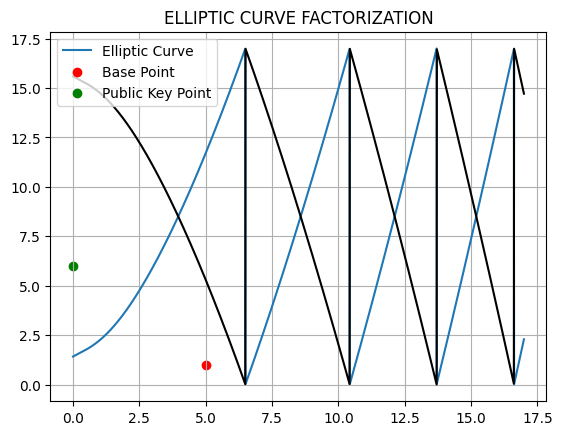

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ecdsa.ellipticcurve import CurveFp, Point
p = 17
a, b = 2, 2
curve = CurveFp(p, a, b)
base_point = Point(curve, 5, 1)
private_key = 7
public_key_point = private_key * base_point
x_coordinate = public_key_point.x()
x_vals = np.arange(0, p, 0.01)
y_vals_positive = np.sqrt(x_vals**3 + a*x_vals + b) % p
y_vals_negative = -np.sqrt(x_vals**3 + a*x_vals + b) % p
plt.plot(x_vals, y_vals_positive, label='Elliptic Curve')
plt.plot(x_vals, y_vals_negative, color='black')
plt.scatter(base_point.x(), base_point.y(), color='red', label='Base Point')
plt.scatter(public_key_point.x(), public_key_point.y(), color='green', label='Public Key Point')
plt.title('ELLIPTIC CURVE FACTORIZATION')
plt.legend()
plt.grid(True)
plt.show()

**Exponential Search Tree**

In [ ]:
class ExponentialSearchTree:
    class Node:
        def __init__(self, key):
            self.key = key
            self.left = None
            self.right = None
    def __init__(self):
        self.root = None
    def insert(self, key):
        self.root = self._insert(self.root, key)
    def _insert(self, root, key):
        if root is None:
            return self.Node(key)
        if key < root.key:
            root.left = self._insert(root.left, key)
        elif key > root.key:
            root.right = self._insert(root.right, key)
        return root
    def search(self, key):
        return self._search(self.root, key)
    def _search(self, root, key):
        if root is None or root.key == key:
            return root
        if key < root.key:
            return self._search(root.left, key)
        else:
            return self._search(root.right, key)
    def inorder_traversal(self):
        result = []
        self._inorder_traversal(self.root, result)
        return result
    def _inorder_traversal(self, root, result):
        if root:
            self._inorder_traversal(root.left, result)
            result.append(root.key)
            self._inorder_traversal(root.right, result)
est = ExponentialSearchTree()
keys = [4, 2, 6, 1, 3, 5, 7]
for key in keys:
    est.insert(key)
search_key = 3
search_result = est.search(search_key)
if search_result:
    print(f"Key {search_key} found in the tree.")
else:
    print(f"Key {search_key} not found in the tree.")

Key 3 found in the tree.


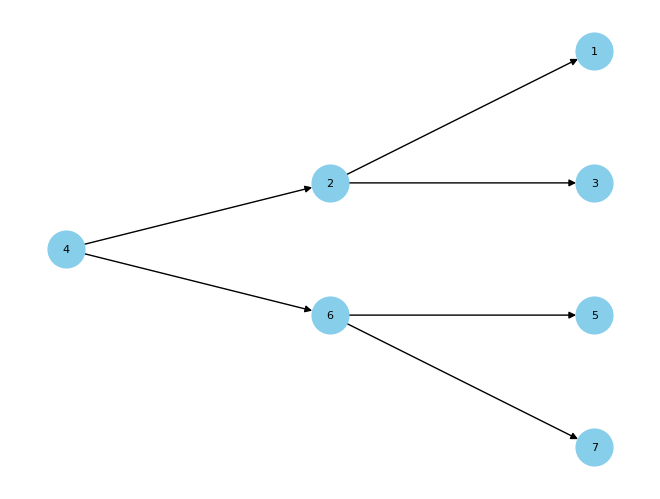

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class ExponentialSearchTree:
    def __init__(self):
        self.root = None
    class Node:
        def __init__(self, key):
            self.key = key
            self.left = None
            self.right = None
    def insert(self, key):
        self.root = self._insert(self.root, key)
    def _insert(self, root, key):
        if root is None:
            return self.Node(key)
        if key < root.key:
            root.left = self._insert(root.left, key)
        elif key > root.key:
            root.right = self._insert(root.right, key)
        return root
    def search(self, key):
        return self._search(self.root, key)
    def _search(self, root, key):
        if root is None or root.key == key:
            return root
        if key < root.key:
            return self._search(root.left, key)
        else:
            return self._search(root.right, key)
    def plot_tree(self):
        G = nx.DiGraph()
        self._build_graph(G, self.root)
        pos = nx.multipartite_layout(G, subset_key="subset")
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black")
        plt.show()
    def _build_graph(self, G, root, subset=None):
        if root:
            G.add_node(root.key, subset=subset)
            if root.left:
                G.add_edge(root.key, root.left.key)
                self._build_graph(G, root.left, subset=subset + 1 if subset is not None else 1)
            if root.right:
                G.add_edge(root.key, root.right.key)
                self._build_graph(G, root.right, subset=subset + 1 if subset is not None else 1)
est = ExponentialSearchTree()
keys = [4, 2, 6, 1, 3, 5, 7]
for key in keys:
    est.insert(key)
est.plot_tree()

**Fat Node Tree**

In [ ]:
class FatNode:
    def __init__(self, key, data=None):
        self.key = key
        self.data = data
        self.left = None
        self.right = None
        self.height = 1
        self.size = 1
class FatNodeTree:
    def __init__(self):
        self.root = None
    def _get_height(self, node):
        if not node:
            return 0
        return node.height
    def _get_size(self, node):
        if not node:
            return 0
        return node.size
    def _update_height_and_size(self, node):
        if not node:
            return
        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        node.size = 1 + self._get_size(node.left) + self._get_size(node.right)
    def _balance_factor(self, node):
        if not node:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)
    def _right_rotate(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self._update_height_and_size(y)
        self._update_height_and_size(x)
        return x
    def _left_rotate(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self._update_height_and_size(x)
        self._update_height_and_size(y)
        return y
    def insert(self, key, data=None):
        self.root = self._insert(self.root, key, data)
    def _insert(self, root, key, data):
        if not root:
            return FatNode(key, data)
        if key < root.key:
            root.left = self._insert(root.left, key, data)
        elif key > root.key:
            root.right = self._insert(root.right, key, data)
        else:
            return root
        self._update_height_and_size(root)
        balance = self._balance_factor(root)
        if balance > 1 and key < root.left.key:
            return self._right_rotate(root)
        if balance < -1 and key > root.right.key:
            return self._left_rotate(root)
        if balance > 1 and key > root.left.key:
            root.left = self._left_rotate(root.left)
            return self._right_rotate(root)
        if balance < -1 and key < root.right.key:
            root.right = self._right_rotate(root.right)
            return self._left_rotate(root)
        return root
    def search(self, key):
        return self._search(self.root, key)
    def _search(self, root, key):
        if not root or root.key == key:
            return root
        if key < root.key:
            return self._search(root.left, key)
        return self._search(root.right, key)
    def delete(self, key):
        self.root = self._delete(self.root, key)
    def _delete(self, root, key):
        if not root:
            return root
        if key < root.key:
            root.left = self._delete(root.left, key)
        elif key > root.key:
            root.right = self._delete(root.right, key)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            temp = self._min_value_node(root.right)
            root.key = temp.key
            root.right = self._delete(root.right, temp.key)
        self._update_height_and_size(root)
        balance = self._balance_factor(root)
        if balance > 1 and self._balance_factor(root.left) >= 0:
            return self._right_rotate(root)
        if balance > 1 and self._balance_factor(root.left) < 0:
            root.left = self._left_rotate(root.left)
            return self._right_rotate(root)
        if balance < -1 and self._balance_factor(root.right) <= 0:
            return self._left_rotate(root)
        if balance < -1 and self._balance_factor(root.right) > 0:
            root.right = self._right_rotate(root.right)
            return self._left_rotate(root)
        return root
    def _min_value_node(self, node):
        current = node
        while current.left:
            current = current.left
        return current
    def inorder_traversal(self):
        result = []
        self._inorder_traversal(self.root, result)
        return result
    def _inorder_traversal(self, root, result):
        if root:
            self._inorder_traversal(root.left, result)
            result.append((root.key, root.data))
            self._inorder_traversal(root.right, result)
    def preorder_traversal(self):
        result = []
        self._preorder_traversal(self.root, result)
        return result
    def _preorder_traversal(self, root, result):
        if root:
            result.append((root.key, root.data))
            self._preorder_traversal(root.left, result)
            self._preorder_traversal(root.right, result)
    def postorder_traversal(self):
        result = []
        self._postorder_traversal(self.root, result)
        return result
    def _postorder_traversal(self, root, result):
        if root:
            self._postorder_traversal(root.left, result)
            self._postorder_traversal(root.right, result)
            result.append((root.key, root.data))
fat_node_tree = FatNodeTree()
keys_data_pairs = [(4, 'A'), (2, 'B'), (6, 'C'), (1, 'D'), (3, 'E'), (5, 'F'), (7, 'G')]
for key, data in keys_data_pairs:
    fat_node_tree.insert(key, data)
print("In-order Traversal =", fat_node_tree.inorder_traversal())
print("Pre-order Traversal =", fat_node_tree.preorder_traversal())
print("Post-order Traversal =", fat_node_tree.postorder_traversal())
search_key = 3
search_result = fat_node_tree.search(search_key)
if search_result:
    print(f"Search result for key {search_key} = {search_result.key}, {search_result.data}")
else:
    print(f"Key {search_key} not found")
delete_key = 5
fat_node_tree.delete(delete_key)
print(f"Deleted node with key {delete_key}")
print("In-order Traversal after deletion =", fat_node_tree.inorder_traversal())
print("Pre-order Traversal after deletion =", fat_node_tree.preorder_traversal())
print("Post-order Traversal after deletion =", fat_node_tree.postorder_traversal())

In-order Traversal = [(1, 'D'), (2, 'B'), (3, 'E'), (4, 'A'), (5, 'F'), (6, 'C'), (7, 'G')]
Pre-order Traversal = [(4, 'A'), (2, 'B'), (1, 'D'), (3, 'E'), (6, 'C'), (5, 'F'), (7, 'G')]
Post-order Traversal = [(1, 'D'), (3, 'E'), (2, 'B'), (5, 'F'), (7, 'G'), (6, 'C'), (4, 'A')]
Search result for key 3 = 3, E
Deleted node with key 5
In-order Traversal after deletion = [(1, 'D'), (2, 'B'), (3, 'E'), (4, 'A'), (6, 'C'), (7, 'G')]
Pre-order Traversal after deletion = [(4, 'A'), (2, 'B'), (1, 'D'), (3, 'E'), (6, 'C'), (7, 'G')]
Post-order Traversal after deletion = [(1, 'D'), (3, 'E'), (2, 'B'), (7, 'G'), (6, 'C'), (4, 'A')]


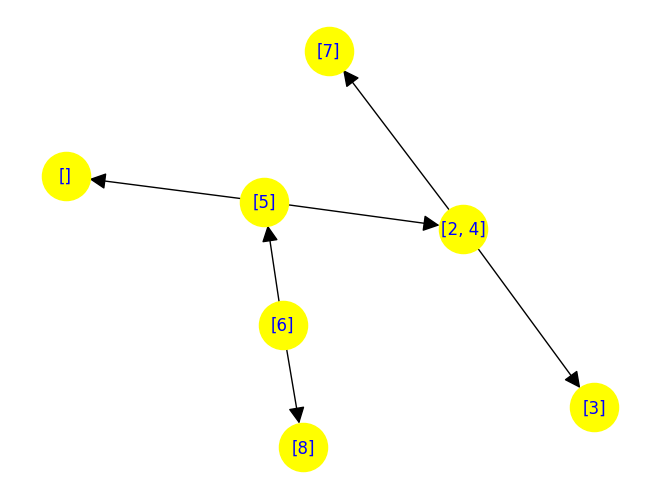

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class FatNode:
    def __init__(self, keys=None, children=None, data=None):
        self.keys = keys or []
        self.children = children or []
        self.data = data
class FatNodeTree:
    def __init__(self, order):
        self.root = FatNode()
        self.order = order
    def insert(self, key, data):
        if not self.root.keys:
            self.root.keys.append(key)
            self.root.data = data
        else:
            self._insert(self.root, key, data)
    def _insert(self, node, key, data):
        if len(node.keys) < self.order - 1:
            node.keys.append(key)
            node.keys.sort()
            node.data = data
        else:
            mid = len(node.keys) // 2
            new_key = node.keys[mid]
            new_data = node.data
            left_child = FatNode(node.keys[:mid], node.children[:mid + 1], node.data)
            right_child = FatNode(node.keys[mid + 1:], node.children[mid + 1:], node.data)
            node.keys = [new_key]
            node.data = new_data
            node.children = [left_child, right_child]
            if key < new_key:
                self._insert(left_child, key, data)
            else:
                self._insert(right_child, key, data)
    def plot_tree(self):
        G = nx.DiGraph()
        self._build_graph(G, self.root)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1200, node_color="yellow", font_size=12, font_color="blue", arrowsize=25)
        plt.show()
    def _build_graph(self, G, node):
        if node:
            for child in node.children:
                self._build_graph(G, child)
                G.add_edge(str(node.keys), str(child.keys))
fat_node_tree = FatNodeTree(order=3)
keys_data_pairs = [(5, 'A'), (3, 'B'), (7, 'C'), (2, 'D'), (4, 'E'), (6, 'F'), (8, 'G')]
for key, data in keys_data_pairs:
    fat_node_tree.insert(key, data)
fat_node_tree.plot_tree()

**Fenwick Tree**

In [ ]:
class FenwickTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (size + 1)
    def update(self, index, delta):
        while index <= self.size:
            self.tree[index] += delta
            index += index & -index
    def query(self, index):
        result = 0
        while index > 0:
            result += self.tree[index]
            index -= index & -index
        return result
    def range_query(self, start, end):
        return self.query(end) - self.query(start - 1)
size = 10
fenwick_tree = FenwickTree(size)
fenwick_tree.update(1, 3)
fenwick_tree.update(3, 2)
fenwick_tree.update(5, 5)
print(f"Prefix sum at index 5 = {fenwick_tree.query(5)}")
print(f"Range sum from index 2 to 7 = {fenwick_tree.range_query(2, 7)}")

Prefix sum at index 5 = 10
Range sum from index 2 to 7 = 7


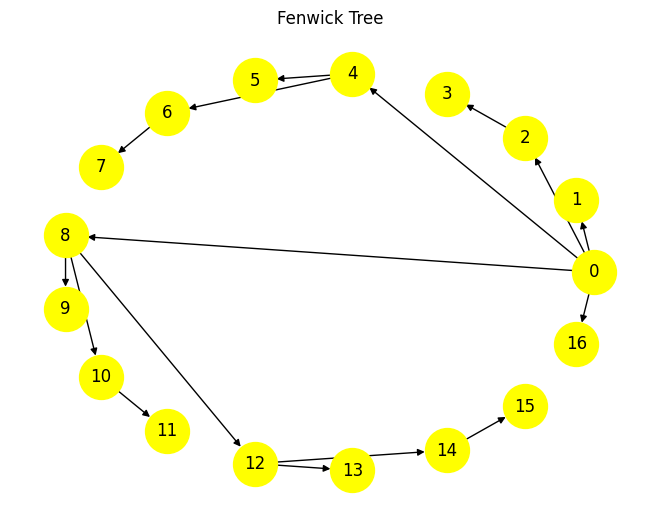

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class FenwickTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (size + 1)
    def update(self, i, delta):
        while i <= self.size:
            self.tree[i] += delta
            i += i & -i
    def query(self, i):
        result = 0
        while i > 0:
            result += self.tree[i]
            i -= i & -i
        return result
    def visualize_tree(self):
        G = nx.DiGraph()
        for i in range(1, self.size + 1):
            parent = i - (i & -i)
            G.add_edge(parent, i)
        pos = nx.circular_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color="yellow", font_size=12, font_color="black")
        plt.title('Fenwick Tree')
        plt.show()
fenwick_tree = FenwickTree(16)
fenwick_tree.visualize_tree()

In [ ]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 32 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [ ]:
!pip install pygraphviz

  Using cached pygraphviz-1.12.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168137 sha256=ae4f286730d396b26618841df229af4996e1c2a2b067eab226e128c6ff37e852
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz


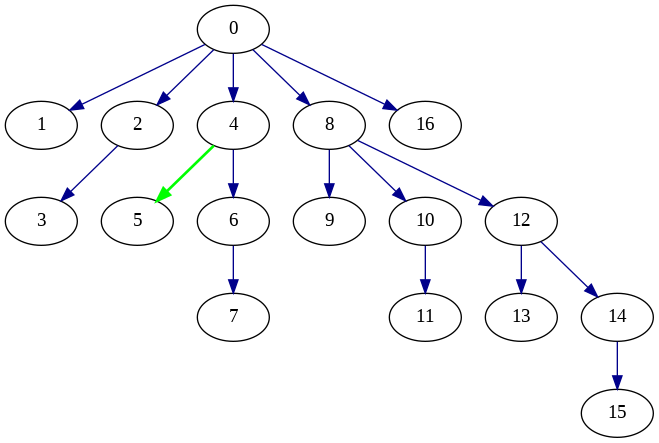

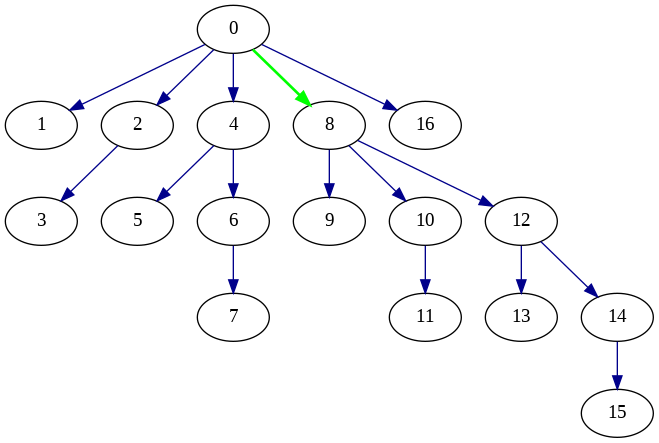

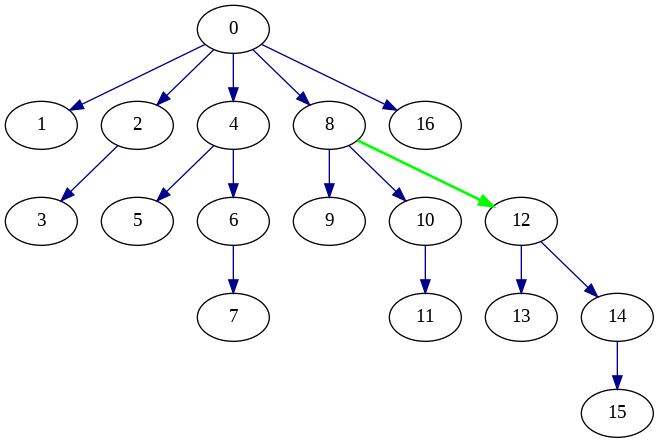

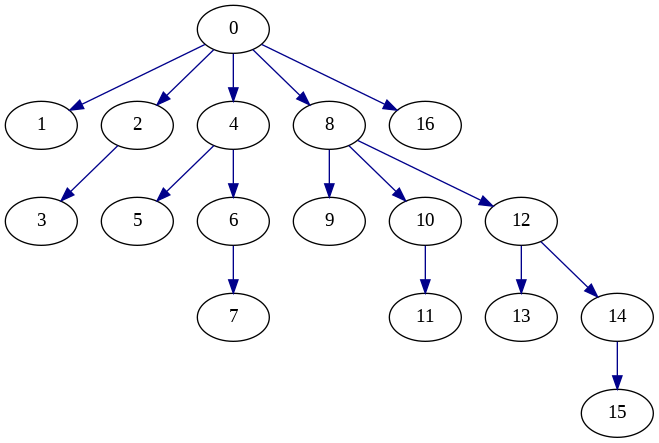

In [ ]:
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image, display
class FenwickTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (size + 1)
    def update(self, i, delta):
        original_i = i
        while i <= self.size:
            self.tree[i] += delta
            i += i & -i
        self.visualize_update(original_i, delta)
    def query(self, i):
        result = 0
        while i > 0:
            result += self.tree[i]
            i -= i & -i
        return result
    def visualize_update(self, i, delta):
        G = pgv.AGraph(directed=True)
        for j in range(1, self.size + 1):
            parent = j - (j & -j)
            G.add_edge(parent, j, color='darkblue')
        G.add_edge(i - (i & -i), i, color='green', penwidth=2)
        G.layout(prog='dot')
        G.draw('fenwick_tree_update.png')
        display(Image(filename='fenwick_tree_update.png'))
    def visualize_tree(self):
        G = pgv.AGraph(directed=True)
        for i in range(1, self.size + 1):
            parent = i - (i & -i)
            G.add_edge(parent, i, color='darkblue')
        G.layout(prog='dot')
        G.draw('fenwick_tree.png')
        display(Image(filename='fenwick_tree.png'))
fenwick_tree = FenwickTree(16)
fenwick_tree.update(5, 3)
fenwick_tree.update(8, 2)
fenwick_tree.update(12, 5)
fenwick_tree.visualize_tree()

**Fibonacci Heap**

In [ ]:
import math
class Node:
    def __init__(self, key):
        self.key = key
        self.degree = 0
        self.left_sibling = self
        self.right_sibling = self
        self.parent = None
        self.child = None
        self.mark = False
        self.visited = False
class FibonacciHeap:
    def __init__(self):
        self.n = 0
        self.min = None
        self.phi = 0
        self.degree = 0
    def make_fib_heap(self):
        return FibonacciHeap()
    def insertion(self, new_node, val):
        new_node = Node(val)
        if self.min is None:
            self.min = new_node
        else:
            self.min.left_sibling.right_sibling = new_node
            new_node.right_sibling = self.min
            new_node.left_sibling = self.min.left_sibling
            self.min.left_sibling = new_node
            if new_node.key < self.min.key:
                self.min = new_node
        self.n += 1
    def find_min_node(self):
        if self.min is None:
            print("Fibonacci heap is empty")
            return None
        return self.min
    def union_heap(self, H1, H2):
        Hnew = self.make_fib_heap()
        Hnew.min = H1.min
        temp1, temp2 = Hnew.min.right_sibling, H2.min.left_sibling
        Hnew.min.right_sibling.left_sibling = H2.min.left_sibling
        Hnew.min.right_sibling = H2.min
        H2.min.left_sibling = Hnew.min
        temp2.right_sibling = temp1
        if (H1.min is None) or (H2.min is not None and H2.min.key < H1.min.key):
            Hnew.min = H2.min
        Hnew.n = H1.n + H2.n
        return Hnew
    def cal_degree(self, n):
        count = 0
        while n > 0:
            n //= 2
            count += 1
        return count
    def consolidate(self):
        degree = self.cal_degree(self.n)
        A = [None] * (degree + 1)
        x = self.min
        while True:
            d = x.degree
            while A[d] is not None:
                y = A[d]
                if x.key > y.key:
                    x, y = y, x
                self.fib_heap_link(y, x)
                A[d] = None
                d += 1
            A[d] = x
            x = x.right_sibling
            if x == self.min:
                break
        self.min = None
        for i in range(degree + 1):
            if A[i] is not None:
                A[i].left_sibling = A[i]
                A[i].right_sibling = A[i]
                if self.min is None:
                    self.min = A[i]
                else:
                    self.min.left_sibling.right_sibling = A[i]
                    A[i].right_sibling = self.min
                    A[i].left_sibling = self.min.left_sibling
                    self.min.left_sibling = A[i]
                    if A[i].key < self.min.key:
                        self.min = A[i]
        return self.min
    def fib_heap_link(self, y, x):
        y.right_sibling.left_sibling = y.left_sibling
        y.left_sibling.right_sibling = y.right_sibling
        if x.right_sibling == x:
            self.min = x
        y.left_sibling = y
        y.right_sibling = y
        y.parent = x
        if x.child is None:
            x.child = y
        y.right_sibling = x.child
        y.left_sibling = x.child.left_sibling
        x.child.left_sibling.right_sibling = y
        x.child.left_sibling = y
        if (y.key) < (x.child.key):
            x.child = y
        x.degree += 1
    def extract_min(self):
        if self.min is None:
            print("The heap is empty")
            return None
        temp = self.min
        pntr = temp
        x = None
        if temp.child is not None:
            x = temp.child
            while True:
                pntr = x.right_sibling
                (self.min.left_sibling).right_sibling = x
                x.right_sibling = self.min
                x.left_sibling = self.min.left_sibling
                self.min.left_sibling = x
                if x.key < self.min.key:
                    self.min = x
                x.parent = None
                x = pntr
                if pntr == temp.child:
                    break
        temp.left_sibling.right_sibling = temp.right_sibling
        temp.right_sibling.left_sibling = temp.left_sibling
        self.min = temp.right_sibling
        if temp == temp.right_sibling and temp.child is None:
            self.min = None
        else:
            self.min = temp.right_sibling
            self.consolidate()
        self.n -= 1
        return temp
    def cut(self, node_to_be_decrease, parent_node):
        if node_to_be_decrease == node_to_be_decrease.right_sibling:
            parent_node.child = None
        node_to_be_decrease.left_sibling.right_sibling = node_to_be_decrease.right_sibling
        node_to_be_decrease.right_sibling.left_sibling = node_to_be_decrease.left_sibling
        if node_to_be_decrease == parent_node.child:
            parent_node.child = node_to_be_decrease.right_sibling
        parent_node.degree -= 1
        node_to_be_decrease.left_sibling = node_to_be_decrease
        node_to_be_decrease.right_sibling = node_to_be_decrease
        self.min.left_sibling.right_sibling = node_to_be_decrease
        node_to_be_decrease.right_sibling = self.min
        node_to_be_decrease.left_sibling = self.min.left_sibling
        self.min.left_sibling = node_to_be_decrease
        node_to_be_decrease.parent = None
        node_to_be_decrease.mark = False
    def cascading_cut(self, parent_node):
        aux = parent_node.parent
        if aux is not None:
            if not parent_node.mark:
                parent_node.mark = True
            else:
                self.cut(parent_node, aux)
                self.cascading_cut(aux)
    def decrease_key(self, node_to_be_decrease, new_key):
        parent_node = node_to_be_decrease.parent
        if (parent_node is not None) and (node_to_be_decrease.key < parent_node.key):
            self.cut(node_to_be_decrease, parent_node)
            self.cascading_cut(parent_node)
        if node_to_be_decrease.key < self.min.key:
            self.min = node_to_be_decrease
    def find_node(self, n, key, new_key):
        find_use = n
        find_use.visited = True
        if find_use.key == key:
            find_use.visited = False
            f = find_use
            self.decrease_key(f, new_key)
        if find_use.child is not None:
            self.find_node(find_use.child, key, new_key)
        if not find_use.right_sibling.visited:
            self.find_node(find_use.right_sibling, key, new_key)
        find_use.visited = False
def insertion_procedure():
    temp = FibonacciHeap()
    no_of_nodes = int(input("Enter number of nodes to be inserted: "))
    for i in range(1, no_of_nodes + 1):
        ele = int(input(f"Node {i} and its key value: "))
        temp.insertion(None, ele)
    return temp
def delete_node(H, dec_key):
    find_node(H, H.min, dec_key, -5000)
    p = extract_min(H)
    if p is not None:
        print("Node deleted")
    else:
        print("Node not deleted: some error")
def print_heap(n):
    x = n
    while True:
        if x.child is None:
            print(f"Node with no child ({x.key})")
        else:
            print(f"Node({x.key}) with child ({x.child.key})")
            print_heap(x.child)
        if x.right_sibling == n:
            break
        x = x.right_sibling
def main():
    new_node, min_node, extracted_min, node_to_be_decrease, find_use = None, None, None, None, None
    heap, h1, h2 = FibonacciHeap(), None, None
    operation_no, new_key, dec_key, ele, i, no_of_nodes = 0, 0, 0, 0, 0, 0
    while True:
        print("\nOperations\n1. Create Fibonacci heap\n2. Insert nodes into Fibonacci heap\n3. Find min")
        print("4. Union\n5. Extract min\n6. Decrease key\n7. Delete node\n8. Print heap\n9. Exit")
        operation_no = int(input("Enter operation number: "))
        if operation_no == 1:
            heap = FibonacciHeap()
        elif operation_no == 2:
            if heap is None:
                heap = FibonacciHeap()
            no_of_nodes = int(input("Enter number of nodes to be inserted: "))
            for i in range(1, no_of_nodes + 1):
                ele = int(input(f"Node {i} and its key value: "))
                heap.insertion(new_node, ele)
        elif operation_no == 3:
            min_node = heap.find_min_node()
            if min_node is None:
                print("No minimum value")
            else:
                print(f"Min value: {min_node.key}")
        elif operation_no == 4:
            if heap is None:
                print("No Fibonacci heap created")
                break
            h1 = insertion_procedure()
            heap = heap.union_heap(heap, h1)
            print("Unified Heap:")
            print_heap(heap.min)
        elif operation_no == 5:
            if heap is None:
                print("Empty Fibonacci heap")
            else:
                extracted_min = heap.extract_min()
                print(f"Min value: {extracted_min.key}")
                print("Updated heap:")
                print_heap(heap.min)
        elif operation_no == 6:
            if heap is None:
                print("Fibonacci heap is empty")
            else:
                dec_key = int(input("Node to be decreased: "))
                new_key = int(input("Enter the new key: "))
                find_use = heap.min
                heap.find_node(find_use, dec_key, new_key)
                print("Key decreased - Corresponding heap:")
                print_heap(heap.min)
        elif operation_no == 7:
            if heap is None:
                print("Fibonacci heap is empty")
            else:
                dec_key = int(input("Enter node key to be deleted: "))
                delete_node(heap, dec_key)
                print("Node Deleted - Corresponding heap:")
                print_heap(heap.min)
        elif operation_no == 8:
            print_heap(heap.min)
        elif operation_no == 9:
            break
        else:
            print("Invalid choice")
if __name__ == "__main__":
    main()


Operations
1. Create Fibonacci heap
2. Insert nodes into Fibonacci heap
3. Find min
4. Union
5. Extract min
6. Decrease key
7. Delete node
8. Print heap
9. Exit
Enter operation number: 1

Operations
1. Create Fibonacci heap
2. Insert nodes into Fibonacci heap
3. Find min
4. Union
5. Extract min
6. Decrease key
7. Delete node
8. Print heap
9. Exit
Enter operation number: 2
Enter number of nodes to be inserted: 4
Node 1 and its key value: 5
Node 2 and its key value: 10
Node 3 and its key value: 15
Node 4 and its key value: 20

Operations
1. Create Fibonacci heap
2. Insert nodes into Fibonacci heap
3. Find min
4. Union
5. Extract min
6. Decrease key
7. Delete node
8. Print heap
9. Exit
Enter operation number: 8
Node with no child (5)
Node with no child (10)
Node with no child (15)
Node with no child (20)

Operations
1. Create Fibonacci heap
2. Insert nodes into Fibonacci heap
3. Find min
4. Union
5. Extract min
6. Decrease key
7. Delete node
8. Print heap
9. Exit
Enter operation number: 

**Fusion Tree**

In [ ]:
class FusionTreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []
class FusionTree:
    def __init__(self, elements_per_node):
        self.root = None
        self.elements_per_node = elements_per_node
    def insert_node(self, node, value):
        if not node:
            return FusionTreeNode(value)
        if value < node.value:
            node.children.append(self.insert_node(None, value))
            node.children.sort(key=lambda x: x.value)
        else:
            for child in node.children:
                if value < child.value:
                    self.insert_node(child, value)
                    break
        return node
    def search_node(self, node, value):
        if not node:
            return False
        if value == node.value:
            return True
        for child in node.children:
            if value < child.value:
                return self.search_node(child, value)
        return False
    def delete_node(self, node, value):
        if not node:
            return None
        if value == node.value:
            del node
            return None
        for i, child in enumerate(node.children):
            if value < child.value:
                node.children[i] = self.delete_node(child, value)
        return node
    def inorder_traversal(self, node):
        if node:
            for child in node.children:
                self.inorder_traversal(child)
                print(node.value, end=" ")
    def preorder_traversal(self, node):
        if node:
            print(node.value, end=" ")
            for child in node.children:
                self.preorder_traversal(child)
    def postorder_traversal(self, node):
        if node:
            for child in node.children:
                self.postorder_traversal(child)
            print(node.value, end=" ")
    def insert(self, value):
        self.root = self.insert_node(self.root, value)
    def search(self, value):
        return self.search_node(self.root, value)
    def remove(self, value):
        self.root = self.delete_node(self.root, value)
    def print_inorder(self):
        self.inorder_traversal(self.root)
        print()
    def print_preorder(self):
        self.preorder_traversal(self.root)
        print()
    def print_postorder(self):
        self.postorder_traversal(self.root)
        print()
if __name__ == "__main__":
    fusion_tree = FusionTree(elements_per_node=3)
    fusion_tree.insert(5)
    fusion_tree.insert(8)
    fusion_tree.insert(3)
    fusion_tree.insert(10)
    fusion_tree.insert(7)
    print("Inorder Traversal:")
    fusion_tree.print_inorder()
    print("Preorder Traversal:")
    fusion_tree.print_preorder()
    print("Postorder Traversal:")
    fusion_tree.print_postorder()

Inorder Traversal:
5 
Preorder Traversal:
5 3 
Postorder Traversal:
3 5 


**Greedy Dual Tree**

In [ ]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
class GreedyDualTree:
    def __init__(self):
        self.root = None
    def insert(self, value):
        if not self.root:
            self.root = TreeNode(value)
        else:
            self._insert(self.root, value)
    def _insert(self, node, value):
        if value < node.value:
            if node.left:
                self._insert(node.left, value)
            else:
                node.left = TreeNode(value)
        else:
            if node.right:
                self._insert(node.right, value)
            else:
                node.right = TreeNode(value)
    def greedy_traversal(self):
        result = []
        self._greedy_traversal(self.root, result)
        return result
    def _greedy_traversal(self, node, result):
        if node:
            result.append(node.value)
            if node.left:
                self._greedy_traversal(node.left, result)
            if node.right:
                self._greedy_traversal(node.right, result)
if __name__ == "__main__":
    dual_tree = GreedyDualTree()
    values_to_insert = [5, 3, 7, 2, 4, 6, 8]
    for value in values_to_insert:
        dual_tree.insert(value)
    print("Greedy Dual Tree Traversal:", dual_tree.greedy_traversal())

Greedy Dual Tree Traversal: [5, 3, 2, 4, 7, 6, 8]


**Hash Array Mapped Trie**

In [ ]:
class HAMTNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.children = {}
class HAMT:
    def __init__(self):
        self.root = HAMTNode(None)
    def _get_bucket_index(self, key, level):
        return (key >> level) & 0xF
    def insert(self, key, value):
        current_node = self.root
        level = 0
        while True:
            index = self._get_bucket_index(key, level)
            if index not in current_node.children:
                current_node.children[index] = HAMTNode(key)
            current_node = current_node.children[index]
            if current_node.key is None or current_node.key == key:
                current_node.value = value
                return
            if not isinstance(current_node.key, int) or current_node.key == key:
                current_node.key = key
                current_node.value = value
                return
            level += 4
    def search(self, key):
        current_node = self.root
        level = 0
        while True:
            index = self._get_bucket_index(key, level)
            if index not in current_node.children:
                return None
            current_node = current_node.children[index]
            if current_node.key == key:
                return current_node.value
            if not isinstance(current_node.key, int):
                return None
            level += 4
    def delete(self, key):
        current_node = self.root
        parent = None
        parent_index = None
        level = 0
        while True:
            index = self._get_bucket_index(key, level)
            if index not in current_node.children:
                return
            parent = current_node
            parent_index = index
            current_node = current_node.children[index]
            if current_node.key == key:
                if isinstance(current_node.key, int):
                    del parent.children[parent_index]
                else:
                    current_node.key = None
                    current_node.value = None
                return
            if not isinstance(current_node.key, int):
                return
            level += 4
hamt = HAMT()
hamt.insert(5, "Five")
hamt.insert(10, "Ten")
hamt.insert(3, "Three")
print(hamt.search(5))
print(hamt.search(7))
hamt.delete(5)
print(hamt.search(5))

Five
None
None


In [ ]:
import graphviz
class TrieNode:
    def __init__(self):
        self.children = {}
        self.value = None
class HAMT:
    def __init__(self):
        self.root = TrieNode()
    def insert(self, key, value):
        node = self.root
        for bit in key:
            if bit not in node.children:
                node.children[bit] = TrieNode()
            node = node.children[bit]
        node.value = value
    def visualize(self):
        graph = graphviz.Digraph(comment='HAMT')
        def _visualize_node(node, path=''):
            if node.value is not None:
                graph.node(path, label=str(node.value))
            for bit, child in node.children.items():
                _visualize_node(child, path + str(bit))
        _visualize_node(self.root)
        return graph
if __name__ == "__main__":
    hamt = HAMT()
    hamt.insert("011", "Value1")
    hamt.insert("101", "Value2")
    hamt.insert("001", "Value3")
    graph = hamt.visualize()
    graph.render('hamt', format='png', cleanup=True)
    print("HAMT visualization created. Check the 'hamt.png' file.")

HAMT visualization created. Check the 'hamt.png' file.


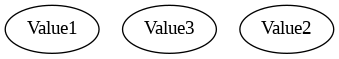

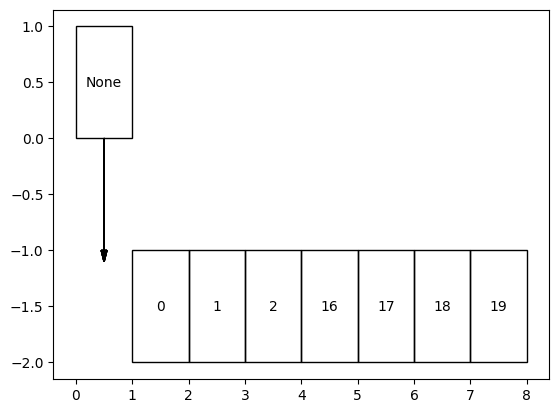

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
class HAMTNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.children = {}
def visualize_hamt(hamt_node, level=0, position=(0, 0), ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.add_patch(patches.Rectangle(position, 1, 1, fill=None, edgecolor='black'))
    ax.text(position[0] + 0.5, position[1] + 0.5, str(hamt_node.key), ha='center', va='center')
    for i, (key, child) in enumerate(hamt_node.children.items()):
        child_position = (position[0] + i + 1, position[1] - 2)
        ax.arrow(position[0] + 0.5, position[1], 0, -1, color='black', head_width=0.1, head_length=0.1)
        visualize_hamt(child, level + 1, child_position, ax)
def main():
    root = HAMTNode(None, None)
    root.children = {
        0: HAMTNode(0, 'A'),
        1: HAMTNode(1, 'B'),
        2: HAMTNode(2, 'C'),
        16: HAMTNode(16, 'D'),
        17: HAMTNode(17, 'E'),
        18: HAMTNode(18, 'F'),
        19: HAMTNode(19, 'G'),
    }
    visualize_hamt(root)
    plt.show()
if __name__ == "__main__":
    main()

**Hash Chaining with Dynamic Perfect Hashing**

In [ ]:
class DynamicPerfectHashing:
    def __init__(self):
        self.size = 8
        self.primary_hash_table = [None] * self.size
    def hash_function(self, key, level):
        return (key + level) % self.size
    def resize(self):
        self.size *= 2
        new_table = [None] * self.size
        for i, chain in enumerate(self.primary_hash_table):
            if chain:
                for key in chain:
                    new_index = self.hash_function(key, 0)
                    if not new_table[new_index]:
                        new_table[new_index] = [key]
                    else:
                        new_table[new_index].append(key)
        self.primary_hash_table = new_table
    def insert(self, key):
        level = 0
        while True:
            index = self.hash_function(key, level)
            if not self.primary_hash_table[index]:
                self.primary_hash_table[index] = [key]
                return
            chain = self.primary_hash_table[index]
            secondary_index = key % len(chain)
            if chain[secondary_index] is None:
                chain[secondary_index] = key
                return
            level += 1
            if level >= self.size:
                self.resize()
    def search(self, key):
        level = 0
        while True:
            index = self.hash_function(key, level)
            if not self.primary_hash_table[index]:
                return None
            chain = self.primary_hash_table[index]
            secondary_index = key % len(chain)
            if chain[secondary_index] == key:
                return key
            level += 1
            if level >= self.size:
                return None
perfect_hashing = DynamicPerfectHashing()
keys = [5, 10, 3, 7, 12, 20]
for key in keys:
    perfect_hashing.insert(key)
for key in keys:
    result = perfect_hashing.search(key)
    print(f"Key {key}: {result}")

Key 5: 5
Key 10: 10
Key 3: 3
Key 7: 7
Key 12: 12
Key 20: 20


In [ ]:
import random
class DynamicPerfectHashing:
    def __init__(self):
        self.hash_table = []
        self.coefficients = [(random.randint(1, 2) % 1, random.randint(0, 2))]
        self.m = 2
        self.n = 0
    def hash_function(self, a, b, x):
        return (a * x + b) % self.m
    def resize(self):
        self.m *= 2
        self.coefficients[0] = (random.randint(1, self.m - 1), random.randint(0, self.m - 1))
        new_hash_table = [[] for _ in range(self.m)]
        for chain in self.hash_table:
            for element in chain:
                h = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], element)
                new_hash_table[h].append(element)
        self.hash_table = new_hash_table
    def insert(self, key):
        if self.n > 4 * self.m:
            self.resize()
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        if h1 >= len(self.hash_table):
            self.hash_table.extend([[] for _ in range(h1 - len(self.hash_table) + 1)])
        if key in self.hash_table[h1]:
            return
        while self.hash_table[h1]:
            self.coefficients.append((random.randint(1, self.m - 1), random.randint(0, self.m - 1)))
            self.resize()
            h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        self.hash_table[h1].append(key)
        self.n += 1
    def search(self, key):
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        return h1 < len(self.hash_table) and key in self.hash_table[h1]
dph = DynamicPerfectHashing()
dph.insert(5)
dph.insert(15)
dph.insert(25)
print("Search 5:", "Found" if dph.search(5) else "Not found")
print("Search 10:", "Found" if dph.search(10) else "Not found")

Search 5: Found
Search 10: Not found


In [ ]:
import random
import graphviz
class DynamicPerfectHashing:
    def __init__(self):
        self.hash_table = []
        self.coefficients = [(random.randint(1, 2) % 1, random.randint(0, 2))]
        self.m = 2
        self.n = 0
    def hash_function(self, a, b, x):
        return (a * x + b) % self.m
    def resize(self):
        self.m *= 2
        self.coefficients[0] = (random.randint(1, self.m - 1), random.randint(0, self.m - 1))
        new_hash_table = [[] for _ in range(self.m)]
        for chain in self.hash_table:
            for element in chain:
                h = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], element)
                new_hash_table[h].append(element)
        self.hash_table = new_hash_table
    def insert(self, key):
        if self.n > 4 * self.m:
            self.resize()
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        if h1 >= len(self.hash_table):
            self.hash_table.extend([[] for _ in range(h1 - len(self.hash_table) + 1)])
        if key in self.hash_table[h1]:
            return
        while self.hash_table[h1]:
            self.coefficients.append((random.randint(1, self.m - 1), random.randint(0, self.m - 1)))
            self.resize()
            h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        self.hash_table[h1].append(key)
        self.n += 1
    def search(self, key):
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        return h1 < len(self.hash_table) and key in self.hash_table[h1]
    def visualize_diagram(self):
        dot = graphviz.Digraph(comment='Dynamic Hashing')
        for i, chain in enumerate(self.hash_table):
            dot.node(str(i), label=' | '.join(map(str, chain)))
        dot.render('hash_chaining_diagram', format='png', cleanup=True)
        dot.view()
dph = DynamicPerfectHashing()
dph.insert(5)
dph.insert(15)
dph.insert(25)
dph.visualize_diagram()

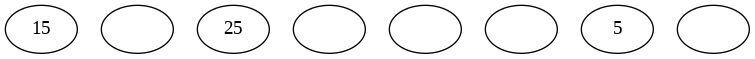

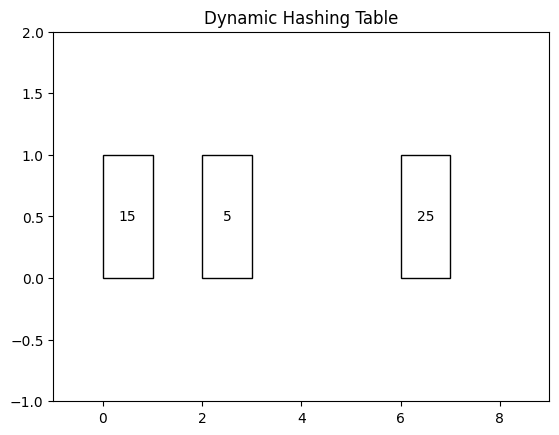

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
class DynamicPerfectHashing:
    def __init__(self):
        self.hash_table = []
        self.coefficients = [(random.randint(1, 2) % 1, random.randint(0, 2))]
        self.m = 2
        self.n = 0
    def hash_function(self, a, b, x):
        return (a * x + b) % self.m
    def resize(self):
        self.m *= 2
        self.coefficients[0] = (random.randint(1, self.m - 1), random.randint(0, self.m - 1))
        new_hash_table = [[] for _ in range(self.m)]
        for chain in self.hash_table:
            for element in chain:
                h = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], element)
                new_hash_table[h].append(element)
        self.hash_table = new_hash_table
    def insert(self, key):
        if self.n > 4 * self.m:
            self.resize()
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        if h1 >= len(self.hash_table):
            self.hash_table.extend([[] for _ in range(h1 - len(self.hash_table) + 1)])
        if key in self.hash_table[h1]:
            return
        while self.hash_table[h1]:
            self.coefficients.append((random.randint(1, self.m - 1), random.randint(0, self.m - 1)))
            self.resize()
            h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        self.hash_table[h1].append(key)
        self.n += 1
    def search(self, key):
        h1 = self.hash_function(self.coefficients[0][0], self.coefficients[0][1], key)
        return h1 < len(self.hash_table) and key in self.hash_table[h1]
    def visualize_diagram(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-1, len(self.hash_table) + 1)
        ax.set_ylim(-1, max(map(len, self.hash_table)) + 1)
        for i, chain in enumerate(self.hash_table):
            for j, element in enumerate(chain):
                ax.add_patch(patches.Rectangle((i, j), 1, 1, edgecolor='black', facecolor='none'))
                ax.text(i + 0.5, j + 0.5, str(element), ha='center', va='center')
        plt.title("Dynamic Hashing Table")
        plt.show()
dph = DynamicPerfectHashing()
dph.insert(5)
dph.insert(15)
dph.insert(25)
dph.visualize_diagram()

**HyperLogLog**

In [ ]:
import math
import hashlib
class HyperLogLog:
    def __init__(self, precision=10):
        self.precision = precision
        self.num_buckets = 2**precision
        self.registers = [0] * self.num_buckets
    def hash_function(self, element):
        hashed_value = hashlib.md5(str(element).encode('utf-8')).hexdigest()
        return int(hashed_value, 16)
    def count_leading_zeros(self, value):
        binary_representation = bin(value)[2:]
        return len(binary_representation) - len(binary_representation.rstrip('0'))
    def add_element(self, element):
        hashed_value = self.hash_function(element)
        bucket_index = hashed_value % self.num_buckets
        register_value = self.count_leading_zeros(hashed_value // self.num_buckets) + 1
        self.registers[bucket_index] = max(self.registers[bucket_index], register_value)
    def estimate_cardinality(self):
        alpha_m = 0.7213 / (1 + 1.079 / self.num_buckets)
        harmonic_mean = sum(2**(-reg) for reg in self.registers)
        raw_estimate = alpha_m * (1 / harmonic_mean)
        if raw_estimate <= 2.5 * self.num_buckets:
            zero_registers = self.registers.count(0)
            if zero_registers != 0:
                corrected_estimate = self.num_buckets * math.log(self.num_buckets / zero_registers)
            else:
                corrected_estimate = raw_estimate
        elif raw_estimate <= 2**32 / 30.0:
            corrected_estimate = raw_estimate
        else:
            corrected_estimate = -2**32 * math.log(1 - raw_estimate / 2**32)
        return corrected_estimate
hll = HyperLogLog(precision=10)
elements = [1, 2, 3, 4, 5, 1, 2, 6, 7, 8, 9, 10]
for element in elements:
    hll.add_element(element)
estimated_cardinality = hll.estimate_cardinality()
print(f"Estimated Cardinality: {estimated_cardinality}")

Estimated Cardinality: 9.039784062530877


**Implicit Graph**

In [ ]:
class ImplicitGraph:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
    def is_valid_cell(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols
    def neighbors(self, row, col):
        possible_neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]
        valid_neighbors = [(r, c) for r, c in possible_neighbors if self.is_valid_cell(r, c)]
        return valid_neighbors
rows, cols = 3, 3
graph = ImplicitGraph(rows, cols)
for r in range(rows):
    for c in range(cols):
        print(f"Neighbors of cell ({r}, {c}) = {graph.neighbors(r, c)}")

Neighbors of cell (0, 0) = [(1, 0), (0, 1)]
Neighbors of cell (0, 1) = [(1, 1), (0, 0), (0, 2)]
Neighbors of cell (0, 2) = [(1, 2), (0, 1)]
Neighbors of cell (1, 0) = [(0, 0), (2, 0), (1, 1)]
Neighbors of cell (1, 1) = [(0, 1), (2, 1), (1, 0), (1, 2)]
Neighbors of cell (1, 2) = [(0, 2), (2, 2), (1, 1)]
Neighbors of cell (2, 0) = [(1, 0), (2, 1)]
Neighbors of cell (2, 1) = [(1, 1), (2, 0), (2, 2)]
Neighbors of cell (2, 2) = [(1, 2), (2, 1)]


interactive(children=(FloatSlider(value=0.0, description='k', max=1.0), Output()), _dom_classes=('widget-inter…

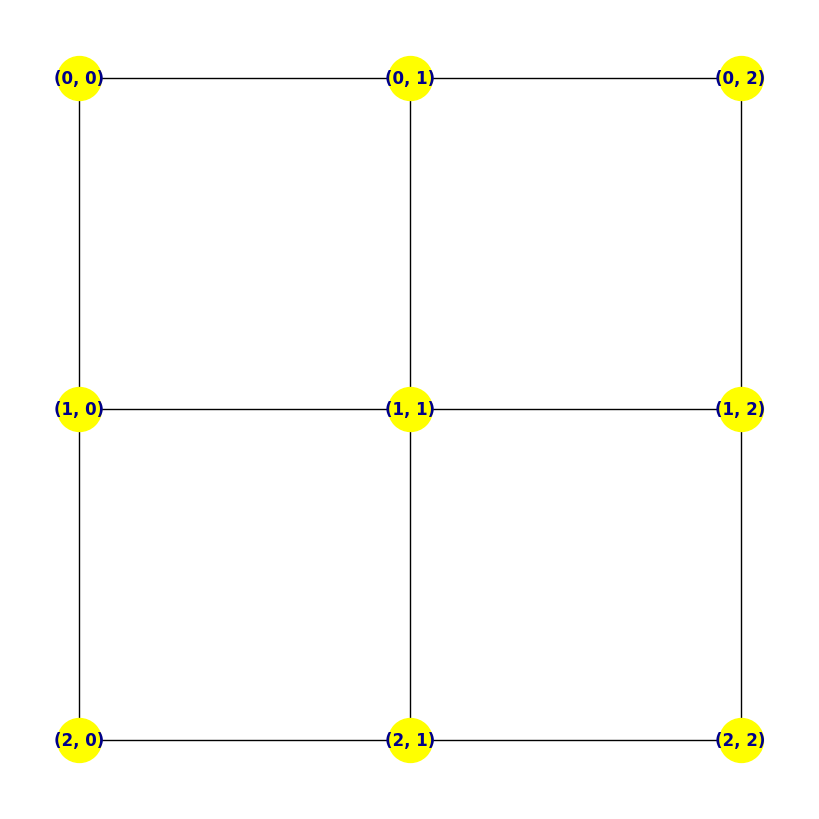

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact
class ImplicitGraph:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
    def is_valid_cell(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols
    def neighbors(self, row, col):
        possible_neighbors = [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]
        valid_neighbors = [(r, c) for r, c in possible_neighbors if self.is_valid_cell(r, c)]
        return valid_neighbors
def visualize_implicit_graph(rows, cols):
    graph = ImplicitGraph(rows, cols)
    G = nx.Graph()
    for r in range(rows):
        for c in range(cols):
            node = (r, c)
            G.add_node(node)
            neighbors = graph.neighbors(r, c)
            G.add_edges_from([(node, neighbor) for neighbor in neighbors])
    pos = {(r, c): (c, -r) for r in range(rows) for c in range(cols)}
    def plot_graph(k):
        plt.figure(figsize=(8, 8))
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='yellow', font_size=12, font_color='darkblue')
    interact(plot_graph, k=(0, 1, 0.1))
visualize_implicit_graph(3, 3)

**Implicit Treap**

In [ ]:
import random
class Node:
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.size = 1
        self.left = None
        self.right = None
def size(node):
    return node.size if node else 0
def update_size(node):
    if node:
        node.size = size(node.left) + size(node.right) + 1
def split(root, key):
    if not root:
        return None, None
    if key <= root.key:
        left, right = split(root.left, key)
        root.left = right
        update_size(root)
        return left, root
    else:
        left, right = split(root.right, key)
        root.right = left
        update_size(root)
        return root, right
def merge(left, right):
    if not left or not right:
        return left or right
    if left.priority > right.priority:
        left.right = merge(left.right, right)
        update_size(left)
        return left
    else:
        right.left = merge(left, right.left)
        update_size(right)
        return right
def insert(root, key):
    priority = random.randint(1, 10**9)
    new_node = Node(key, priority)
    left, right = split(root, key)
    return merge(merge(left, new_node), right)
def erase(root, key):
    left, right = split(root, key)
    left, _ = split(left, key - 1)
    return merge(left, right)
def kth_element(root, k):
    left_size = size(root.left) if root.left else 0
    if k == left_size + 1:
        return root.key
    elif k <= left_size:
        return kth_element(root.left, k)
    else:
        return kth_element(root.right, k - left_size - 1)
def inorder_traversal(node):
    if node:
        inorder_traversal(node.left)
        print(node.key, end=" ")
        inorder_traversal(node.right)
def preorder_traversal(node):
    if node:
        print(node.key, end=" ")
        preorder_traversal(node.left)
        preorder_traversal(node.right)
def postorder_traversal(node):
    if node:
        postorder_traversal(node.left)
        postorder_traversal(node.right)
        print(node.key, end=" ")
root = None
elements = [3, 1, 4, 1, 5, 9, 2, 6]
for element in elements:
    root = insert(root, element)
print("Inorder traversal:")
inorder_traversal(root)
print()
print("Preorder traversal:")
preorder_traversal(root)
print()
print("Postorder traversal:")
postorder_traversal(root)
print()
root = erase(root, 4)
print("Inorder traversal after erasing 4:")
inorder_traversal(root)
print()
root = erase(root, 2)
print("Preorder traversal after erasing 2:")
inorder_traversal(root)
print()
root = erase(root, 5)
print("Postorder traversal after erasing 5:")
inorder_traversal(root)
print()
third_element = kth_element(root, 3)
print("3rd element =", third_element)

Inorder traversal:
1 1 2 3 4 5 6 9 
Preorder traversal:
1 1 4 2 3 6 5 9 
Postorder traversal:
1 3 2 5 9 6 4 1 
Inorder traversal after erasing 4:
1 1 2 4 5 6 9 
Preorder traversal after erasing 2:
2 4 5 6 9 
Postorder traversal after erasing 5:
2 5 6 9 
3rd element = 6


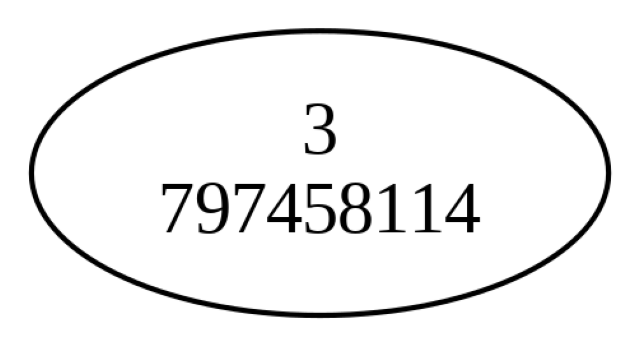

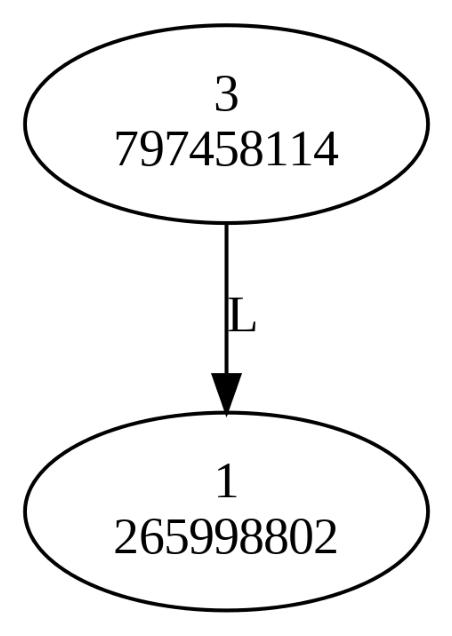

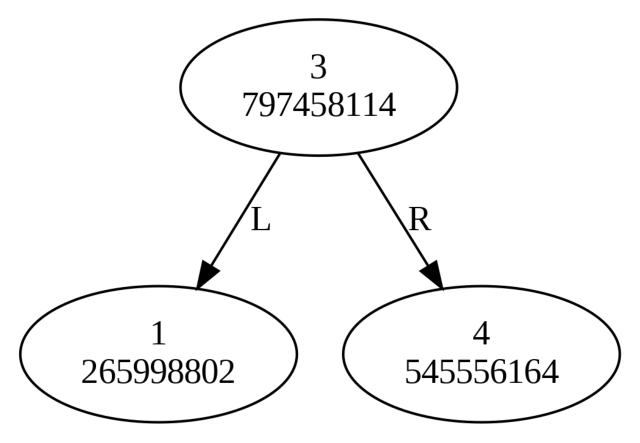

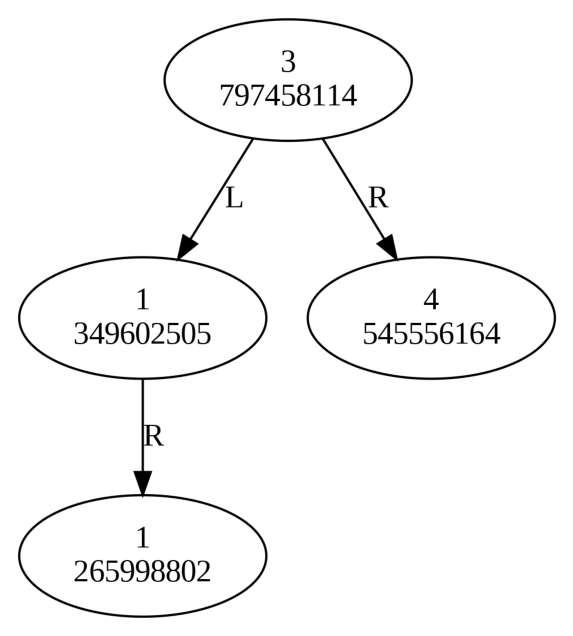

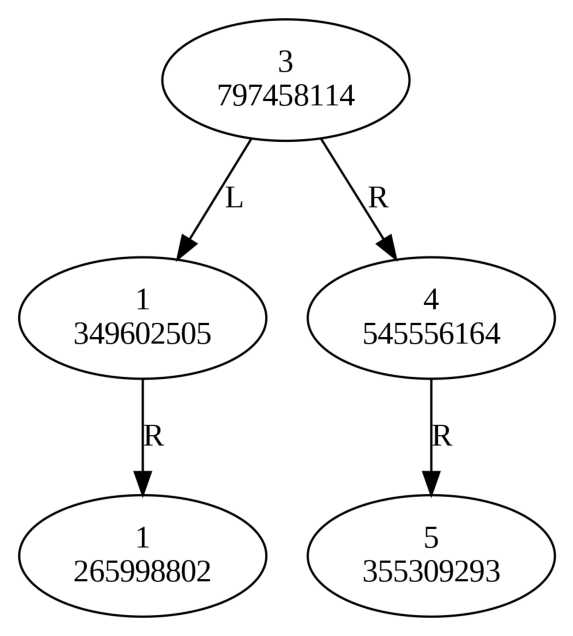

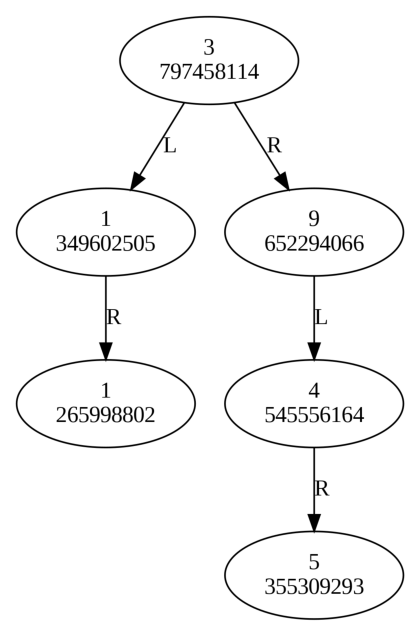

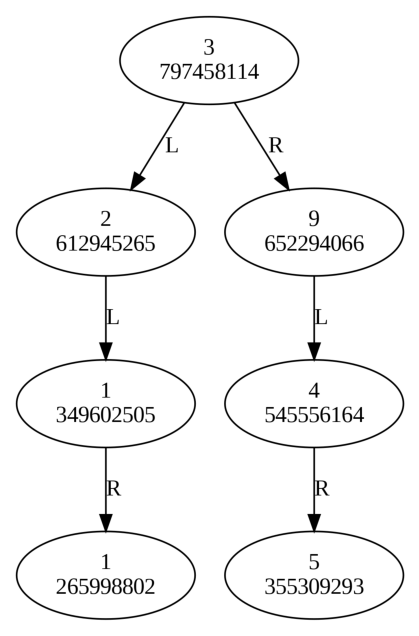

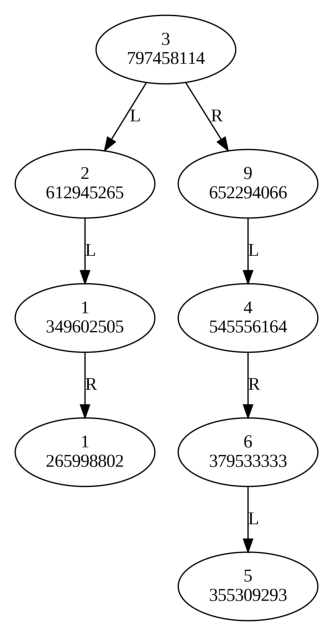

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph
class Node:
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.size = 1
        self.left = None
        self.right = None
def update_size(node):
    if node:
        node.size = size(node.left) + size(node.right) + 1
def size(node):
    return node.size if node else 0
def visualize_treap(node, graph, parent_name, side):
    if node:
        name = f"{node.key}_{node.priority}"
        graph.node(name, label=f"{node.key}\n{node.priority}")
        if parent_name:
            graph.edge(parent_name, name, constraint="true", label=side)
        visualize_treap(node.left, graph, name, "L")
        visualize_treap(node.right, graph, name, "R")
def visualize_implicit_treap(root):
    graph = Digraph(format="png")
    graph.attr(dpi="300")
    visualize_treap(root, graph, None, None)
    graph.render(filename="implicit_treap", directory="./", format="png", cleanup=True)
    image_path = "./implicit_treap.png"
    img = plt.imread(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
root = None
elements = [3, 1, 4, 1, 5, 9, 2, 6]
for element in elements:
    root = insert(root, element)
    visualize_implicit_treap(root)

**Interval Skip List**

In [ ]:
import random
class Node:
    def __init__(self, start, end, level):
        self.start = start
        self.end = end
        self.level = level
        self.forward = [None] * (level + 1)
class IntervalSkipList:
    def __init__(self, max_levels):
        self.max_levels = max_levels
        self.header = self.create_node(float('-inf'), float('inf'), max_levels)
    def create_node(self, start, end, level):
        return Node(start, end, level)
    def random_level(self):
        level = 0
        while random.random() < 0.5 and level < self.max_levels:
            level += 1
        return level
    def insert(self, start, end):
        update = [None] * (self.max_levels + 1)
        current = self.header
        for i in range(self.header.level, -1, -1):
            while current.forward[i] and current.forward[i].start < start:
                current = current.forward[i]
            update[i] = current
        level = self.random_level()
        if level > self.header.level:
            for i in range(self.header.level + 1, level + 1):
                update[i] = self.header
            self.header.level = level
        new_node = self.create_node(start, end, level)
        for i in range(level + 1):
            new_node.forward[i] = update[i].forward[i]
            update[i].forward[i] = new_node
    def search(self, start, end):
        current = self.header
        for i in range(self.header.level, -1, -1):
            while current.forward[i] and current.forward[i].start < end:
                current = current.forward[i]
        current = current.forward[0]
        if current and current.start <= start and current.end >= end:
            return True
        return False
    def display(self):
        for level in range(self.header.level + 1):
            print(f"Level {level}: ", end="")
            node = self.header.forward[level]
            while node:
                print(f"({node.start}, {node.end})", end=" -> ")
                node = node.forward[level]
            print("None")
interval_skip_list = IntervalSkipList(max_levels=4)
interval_skip_list.insert(1, 5)
interval_skip_list.insert(3, 8)
interval_skip_list.insert(6, 10)
interval_skip_list.insert(12, 15)
interval_skip_list.display()
print(interval_skip_list.search(4, 7))
print(interval_skip_list.search(9, 11))

Level 0: (1, 5) -> (3, 8) -> (6, 10) -> (12, 15) -> None
Level 1: (3, 8) -> None
Level 2: (3, 8) -> None
Level 3: None
Level 4: None
False
False


**Interval Tree**

In [ ]:
class Interval:
    def __init__(self, start, end):
        self.start = start
        self.end = end
class IntervalTreeNode:
    def __init__(self, interval):
        self.interval = interval
        self.max_end = interval.end
        self.left = None
        self.right = None
def build_interval_tree(intervals):
    if not intervals:
        return None
    intervals.sort(key=lambda x: x.start)
    return build_interval_tree_helper(intervals, 0, len(intervals) - 1)
def build_interval_tree_helper(intervals, start, end):
    if start > end:
        return None
    mid = (start + end) // 2
    root = IntervalTreeNode(intervals[mid])
    root.left = build_interval_tree_helper(intervals, start, mid - 1)
    root.right = build_interval_tree_helper(intervals, mid + 1, end)
    if root.left:
        root.max_end = max(root.max_end, root.left.max_end)
    if root.right:
        root.max_end = max(root.max_end, root.right.max_end)
    return root
def search_interval_tree(root, interval):
    if not root:
        return None
    if (root.interval.start <= interval.end and root.interval.end >= interval.start):
        return root.interval
    if root.left and root.left.max_end >= interval.start:
        return search_interval_tree(root.left, interval)
    else:
        return search_interval_tree(root.right, interval)
intervals = [Interval(15, 20), Interval(10, 30), Interval(5, 12), Interval(25, 30)]
interval_tree = build_interval_tree(intervals)
query_interval = Interval(14, 16)
result = search_interval_tree(interval_tree, query_interval)
if result:
    print(f"Intersection found: [{result.start}, {result.end}]")
else:
    print("No intersection found.")

Intersection found: [10, 30]


**All Pair Shortest Path using Johnson Algorithm**

In [ ]:
from typing import List
class Edge:
    def __init__(self, source, destination, weight):
        self.source = source
        self.destination = destination
        self.weight = weight
def add_edge(graph: List[List[Edge]], source, destination, weight):
    if source >= len(graph):
        graph.extend([] for _ in range(source - len(graph) + 1))
    graph[source].append(Edge(source, destination, weight))
def bellman_ford(graph: List[List[Edge]], h: List[int]) -> bool:
    V = len(graph)
    dist = [float('inf')] * V
    dist[0] = 0
    for _ in range(V - 1):
        for edges in graph:
            for edge in edges:
                if dist[edge.source] != float('inf') and dist[edge.source] + edge.weight < dist[edge.destination]:
                    dist[edge.destination] = dist[edge.source] + edge.weight
    for edges in graph:
        for edge in edges:
            if dist[edge.source] != float('inf') and dist[edge.source] + edge.weight < dist[edge.destination]:
                return False
    for i in range(V):
        h[i] = dist[i]
    return True
def dijkstra(graph: List[List[Edge]], source, h: List[int]) -> List[int]:
    V = len(graph)
    dist = [float('inf')] * V
    dist[source] = 0
    pq = [(0, source)]
    while pq:
        u_h, u = pq.pop(0)
        for edge in graph[u]:
            v = edge.destination
            weight = edge.weight + h[u] - h[v]
            if dist[u] != float('inf') and dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                pq.append((dist[v], v))
                pq.sort()
    for i in range(V):
        if dist[i] != float('inf'):
            dist[i] -= h[i]
    return dist
def johnsons_algorithm(graph: List[List[Edge]]) -> List[List[int]]:
    V = len(graph)
    for i in range(V):
        add_edge(graph, V, i, 0)
    h = [0] * (V + 1)
    if not bellman_ford(graph, h):
        print("Graph contains a negative-weight cycle. Johnson's Algorithm cannot be applied.")
        return []
    shortest_paths = []
    for i in range(V):
        dist = dijkstra(graph, i, h)
        shortest_paths.append(dist)
    return shortest_paths
if __name__ == "__main__":
    V, E = map(int, input("Enter the number of vertices and edges: ").split())
    graph = [[] for _ in range(V)]
    print("Enter the edges (source destination weight):")
    for _ in range(E):
        source, destination, weight = map(int, input().split())
        add_edge(graph, source, destination, weight)
    shortest_paths = johnsons_algorithm(graph)
    print("Shortest Paths:")
    for row in shortest_paths:
        print(row)

Enter the number of vertices and edges: 4 5
Enter the edges (source destination weight):
0 1 5
0 2 2
1 2 5
2 3 9
3 0 17
Shortest Paths:
[0, -5, -2, -11, inf]
[36, -5, 6, -3, inf]
[28, 23, -2, -11, inf]
[28, 23, 26, -11, inf]


**KD Tree**

In [ ]:
import numpy as np
class Node:
    def __init__(self, point, left=None, right=None, axis=None):
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis
def build_kd_tree(points, depth=0):
    if len(points) == 0:
        return None
    k = len(points[0])
    axis = depth % k
    points.sort(key=lambda x: x[axis])
    median = len(points) // 2
    return Node(
        point=points[median],
        left=build_kd_tree(points[:median], depth + 1),
        right=build_kd_tree(points[median + 1:], depth + 1),
        axis=axis
    )
def nearest_neighbor(root, target, depth=0, best=None):
    if root is None:
        return best
    k = len(target)
    axis = depth % k
    next_best = None
    next_branch = None
    if best is None or np.linalg.norm([root.point[axis] - target[axis] for axis in range(k)]) < np.linalg.norm([best.point[axis] - target[axis] for axis in range(k)]):
        next_best = root
    else:
        next_best = best
    if target[axis] < root.point[axis]:
        next_branch = root.left
    else:
        next_branch = root.right
    return nearest_neighbor(next_branch, target, depth + 1, next_best)
if __name__ == "__main__":
    points = [(2,3), (5,4), (9,6), (4,7), (8,1), (7,2)]
    kdtree = build_kd_tree(points)
    target_point = (9, 2)
    nearest = nearest_neighbor(kdtree, target_point)
    print(f"Points = {points}")
    print(f"KD Tree:")
    print(f"Nearest neighbor to {target_point} = {nearest.point}")

Points = [(2, 3), (4, 7), (5, 4), (7, 2), (8, 1), (9, 6)]
KD Tree:
Nearest neighbor to (9, 2) = (8, 1)


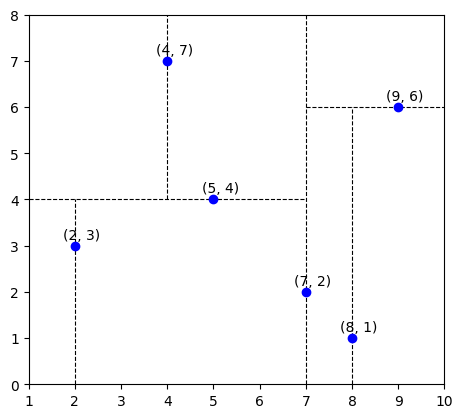

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
class Node:
    def __init__(self, point, left=None, right=None, axis=None):
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis
def visualize_kd_tree(ax, node, x_range, y_range, depth=0):
    if node is not None:
        k = len(node.point)
        axis = depth % k
        if axis == 0:
            ax.plot([node.point[0], node.point[0]], [y_range[0], y_range[1]], color='black', linestyle='--', linewidth=0.8)
            visualize_kd_tree(ax, node.left, [x_range[0], node.point[0]], y_range, depth + 1)
            visualize_kd_tree(ax, node.right, [node.point[0], x_range[1]], y_range, depth + 1)
        else:
            ax.plot([x_range[0], x_range[1]], [node.point[1], node.point[1]], color='black', linestyle='--', linewidth=0.8)
            visualize_kd_tree(ax, node.left, x_range, [y_range[0], node.point[1]], depth + 1)
            visualize_kd_tree(ax, node.right, x_range, [node.point[1], y_range[1]], depth + 1)
        ax.plot(node.point[0], node.point[1], 'bo')
        ax.annotate(str(node.point), (node.point[0], node.point[1]), textcoords="offset points", xytext=(5,5), ha='center')
def plot_kd_tree(kdtree, x_range, y_range):
    fig, ax = plt.subplots()
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    visualize_kd_tree(ax, kdtree, x_range, y_range)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
if __name__ == "__main__":
    points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
    kdtree = build_kd_tree(points)
    x_range = [min(p[0] for p in points) - 1, max(p[0] for p in points) + 1]
    y_range = [min(p[1] for p in points) - 1, max(p[1] for p in points) + 1]
    plot_kd_tree(kdtree, x_range, y_range)

In [ ]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 32 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [ ]:
!pip install pygraphviz

  Using cached pygraphviz-1.12.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168132 sha256=3c7a0e7e57ebfeb3dd7452d1c11469337f69921f37d2edd4f81ca37ff1d6e9ad
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz


In [ ]:
import pygraphviz as pgv
from PIL import Image
class Node:
    def __init__(self, point, left=None, right=None, axis=None):
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis
def add_nodes(graph, node, parent_name='', depth=0):
    if node is not None:
        current_name = f"{node.point}_{depth}"
        graph.add_node(current_name, label=str(node.point))
        if parent_name:
            graph.add_edge(parent_name, current_name)
        add_nodes(graph, node.left, current_name, depth + 1)
        add_nodes(graph, node.right, current_name, depth + 1)
def visualize_kd_tree(kdtree):
    graph = pgv.AGraph(directed=True)
    graph.node_attr['shape'] = 'circle'
    add_nodes(graph, kdtree)
    graph_file_path = "kd_tree_graph.png"
    graph.draw(graph_file_path, format='png', prog='dot')
    img = Image.open(graph_file_path)
    img.show()
if __name__ == "__main__":
    points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
    kdtree = build_kd_tree(points)
    visualize_kd_tree(kdtree)

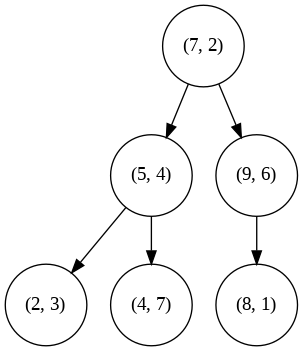

In [ ]:
pip install networkx

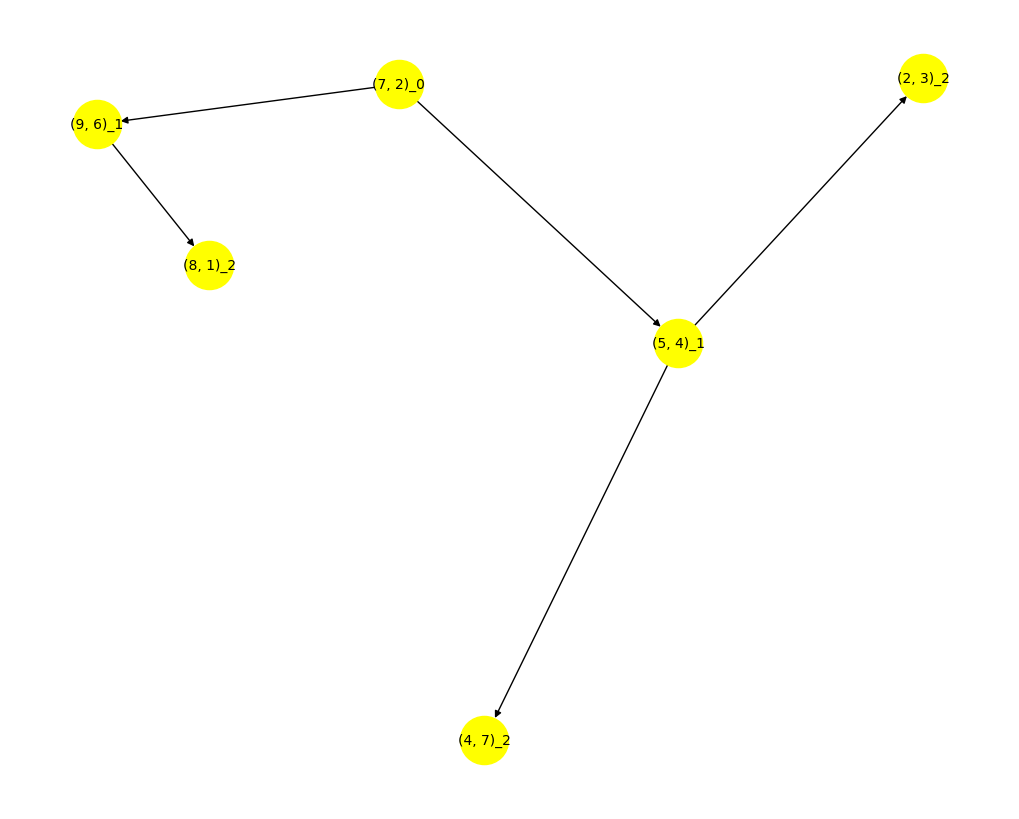

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class Node:
    def __init__(self, point, left=None, right=None, axis=None):
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis
def add_nodes(graph, node, parent_name='', depth=0):
    if node is not None:
        current_name = f"{node.point}_{depth}"
        graph.add_node(current_name, label=str(node.point))
        if parent_name:
            graph.add_edge(parent_name, current_name)
        add_nodes(graph, node.left, current_name, depth + 1)
        add_nodes(graph, node.right, current_name, depth + 1)
def visualize_kd_tree(kdtree):
    graph = nx.DiGraph()
    add_nodes(graph, kdtree)
    pos = nx.spring_layout(graph)
    labels = nx.get_edge_attributes(graph, 'label')
    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, with_labels=True, font_size=10, node_size=1200, node_color='yellow', font_color='black')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()
if __name__ == "__main__":
    points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]
    kdtree = build_kd_tree(points)
    visualize_kd_tree(kdtree)

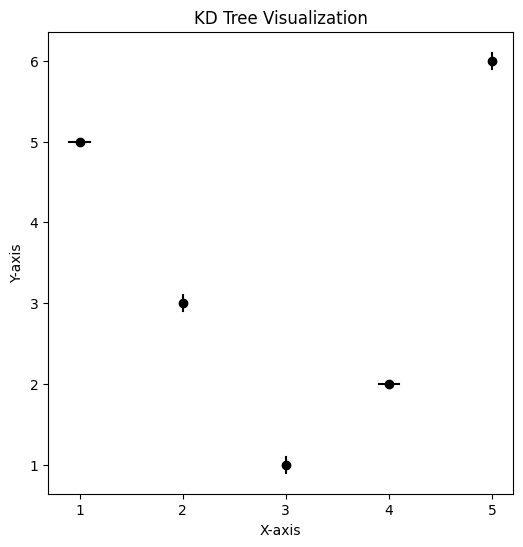

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
def visualize_kd_tree(node, axis, depth=0):
    if node is not None:
        axis = axis % len(node.point)
        plt.scatter(node.point[0], node.point[1], color='black')
        if axis == 0:
            plt.plot([node.point[0], node.point[0]], [node.point[1] - 0.1, node.point[1] + 0.1], color='black')
        else:
            plt.plot([node.point[0] - 0.1, node.point[0] + 0.1], [node.point[1], node.point[1]], color='black')
        visualize_kd_tree(node.left, axis + 1, depth + 1)
        visualize_kd_tree(node.right, axis + 1, depth + 1)
root = Node(point=(2, 3))
root.left = Node(point=(1, 5))
root.right = Node(point=(4, 2))
root.left.left = Node(point=(3, 1))
root.left.right = Node(point=(5, 6))
plt.figure(figsize=(6, 6))
visualize_kd_tree(root, axis=0)
plt.title("KD Tree Visualization")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
pip install graphviz

In [ ]:
import graphviz
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
def visualize_kd_tree(node, dot=None, parent=None, side=None):
    if dot is None:
        dot = graphviz.Digraph(comment='KD Tree')
    if node is not None:
        label = f'{node.point[0]}, {node.point[1]}'
        dot.node(label)
        if parent is not None:
            dot.edge(parent, label, label=side)
        visualize_kd_tree(node.left, dot, label, 'L')
        visualize_kd_tree(node.right, dot, label, 'R')
    return dot
root = Node(point=(2, 3))
root.left = Node(point=(1, 5))
root.right = Node(point=(4, 2))
root.left.left = Node(point=(3, 1))
root.left.right = Node(point=(5, 6))
dot = visualize_kd_tree(root)
dot.render("kd_tree", format="png", cleanup=True)

'kd_tree.png'

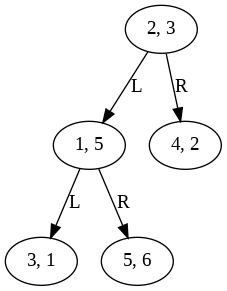

**Lazy Propagation Segment Tree**

In [ ]:
class LazySegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree = [0] * (4 * self.n)
        self.lazy = [0] * (4 * self.n)
        self.build(arr, 1, 0, self.n - 1)
    def build(self, arr, node, start, end):
        if start == end:
            self.tree[node] = arr[start]
        else:
            mid = (start + end) // 2
            self.build(arr, 2 * node, start, mid)
            self.build(arr, 2 * node + 1, mid + 1, end)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]
    def update_range(self, node, start, end, left, right, value):
        if self.lazy[node] != 0:
            self.tree[node] += (end - start + 1) * self.lazy[node]
            if start != end:
                self.lazy[2 * node] += self.lazy[node]
                self.lazy[2 * node + 1] += self.lazy[node]
            self.lazy[node] = 0
        if start > end or start > right or end < left:
            return
        if start >= left and end <= right:
            self.tree[node] += (end - start + 1) * value
            if start != end:
                self.lazy[2 * node] += value
                self.lazy[2 * node + 1] += value
            return
        mid = (start + end) // 2
        self.update_range(2 * node, start, mid, left, right, value)
        self.update_range(2 * node + 1, mid + 1, end, left, right, value)
        self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]
    def query_range(self, node, start, end, left, right):
        if self.lazy[node] != 0:
            self.tree[node] += (end - start + 1) * self.lazy[node]
            if start != end:
                self.lazy[2 * node] += self.lazy[node]
                self.lazy[2 * node + 1] += self.lazy[node]
            self.lazy[node] = 0
        if start > end or start > right or end < left:
            return 0
        if start >= left and end <= right:
            return self.tree[node]
        mid = (start + end) // 2
        left_sum = self.query_range(2 * node, start, mid, left, right)
        right_sum = self.query_range(2 * node + 1, mid + 1, end, left, right)
        return left_sum + right_sum
arr = [1, 3, 5, 7, 9, 11]
segment_tree = LazySegmentTree(arr)
segment_tree.update_range(1, 0, len(arr) - 1, 1, 4, 2)
result = segment_tree.query_range(1, 0, len(arr) - 1, 2, 5)
print("Query Result =", result)

Query Result = 38


In [ ]:
import pygraphviz as pgv
class TreeNode:
    def __init__(self, value=None, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
class LazySegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.root = self.build(arr, 0, self.n - 1)
    def build(self, arr, start, end):
        if start == end:
            return TreeNode(arr[start])
        mid = (start + end) // 2
        left_child = self.build(arr, start, mid)
        right_child = self.build(arr, mid + 1, end)
        return TreeNode(None, left_child, right_child)
    def visualize(self, node, graph, pos=None, x=0, y=0, layer=1):
        if pos is None:
            pos = {id(node): (x, y)}
        if node.left and node.left.value is not None:
            graph.add_edge(id(node), id(node.left))
            pos[id(node.left)] = (x - 2 ** (5 - layer), y - 1)
            self.visualize(node.left, graph, pos, x - 2 ** (5 - layer), y - 1, layer + 1)
        if node.right and node.right.value is not None:
            graph.add_edge(id(node), id(node.right))
            pos[id(node.right)] = (x + 2 ** (5 - layer), y - 1)
            self.visualize(node.right, graph, pos, x + 2 ** (5 - layer), y - 1, layer + 1)
arr = [1, 3, 5, 7, 9, 11]
segment_tree = LazySegmentTree(arr)
graph = pgv.AGraph(directed=True)
graph.add_node(id(segment_tree.root))
segment_tree.visualize(segment_tree.root, graph)
graph.layout(prog='dot')
graph.draw('lazy_segment_tree_viz.png')

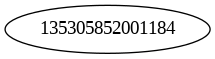

**Locality Sensitive Hashing**

In [ ]:
import numpy as np
import random
class LocalitySensitiveHashing:
    def __init__(self, num_hash_functions, num_buckets, dimensionality):
        self.num_hash_functions = num_hash_functions
        self.num_buckets = num_buckets
        self.dimensionality = dimensionality
        self.hash_functions = [self.generate_hash_function() for _ in range(num_hash_functions)]
        self.hash_tables = [{} for _ in range(num_hash_functions)]
    def generate_hash_function(self):
        random_vector = np.random.randn(self.dimensionality)
        random_vector /= np.linalg.norm(random_vector)
        return random_vector
    def hash_vector(self, vector, hash_function):
        return tuple([int(np.dot(vector, hash_function) > 0)])
    def hash_data_point(self, data_point):
        return tuple(self.hash_vector(data_point, hash_function) for hash_function in self.hash_functions)
    def insert_data_point(self, data_point, point_id):
        for i, hash_table in enumerate(self.hash_tables):
            hash_key = self.hash_data_point(data_point)
            if hash_key not in hash_table:
                hash_table[hash_key] = [point_id]
            else:
                hash_table[hash_key].append(point_id)
    def query(self, query_point):
        results = set()
        for i, hash_table in enumerate(self.hash_tables):
            hash_key = self.hash_data_point(query_point)
            if hash_key in hash_table:
                results.update(hash_table[hash_key])
        return results
num_data_points = 100
dimensionality = 10
data_points = np.random.randn(num_data_points, dimensionality)
lsh = LocalitySensitiveHashing(num_hash_functions=5, num_buckets=10, dimensionality=dimensionality)
for i, data_point in enumerate(data_points):
    lsh.insert_data_point(data_point, i)
query_point = np.random.randn(dimensionality)
similar_points = lsh.query(query_point)
print(f"Query Points = {query_point}")
print(f"Similar Points = {similar_points}")

Query Points = [ 0.37665168  0.34158362  0.29951707 -1.11388132  0.75391961  0.37172751
 -0.24315262  0.91027663  1.22997026  1.89964741]
Similar Points = {26}


In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
class LocalitySensitiveHashing:
    def __init__(self, num_hash_functions, num_buckets, dimensionality):
        self.num_hash_functions = num_hash_functions
        self.num_buckets = num_buckets
        self.dimensionality = dimensionality
        self.hash_functions = [self.generate_hash_function() for _ in range(num_hash_functions)]
        self.hash_tables = [{} for _ in range(num_hash_functions)]
    def generate_hash_function(self):
        random_vector = np.random.randn(self.dimensionality)
        random_vector /= np.linalg.norm(random_vector)
        return random_vector
    def hash_vector(self, vector, hash_function):
        return tuple([int(np.dot(vector, hash_function) > 0)])
    def hash_data_point(self, data_point):
        return tuple(self.hash_vector(data_point, hash_function) for hash_function in self.hash_functions)
    def insert_data_point(self, data_point, point_id):
        for i, hash_table in enumerate(self.hash_tables):
            hash_key = self.hash_data_point(data_point)
            if hash_key not in hash_table:
                hash_table[hash_key] = [point_id]
            else:
                hash_table[hash_key].append(point_id)
    def query(self, query_point):
        results = set()
        for i, hash_table in enumerate(self.hash_tables):
            hash_key = self.hash_data_point(query_point)
            if hash_key in hash_table:
                results.update(hash_table[hash_key])
        return results
num_data_points = 100
dimensionality = 2
data_points = np.random.randn(num_data_points, dimensionality)
lsh = LocalitySensitiveHashing(num_hash_functions=5, num_buckets=10, dimensionality=dimensionality)
for i, data_point in enumerate(data_points):
    lsh.insert_data_point(data_point, i)
def visualize_lsh(lsh, data_points):
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Data Points', 'Hash Tables'))
    fig.add_trace(go.Scatter(x=data_points[:, 0], y=data_points[:, 1], mode='markers', name='Data Points'),
                  row=1, col=1)
    for i, hash_table in enumerate(lsh.hash_tables):
        hash_keys = list(hash_table.keys())
        hash_points = np.array([np.array(key) for key in hash_keys])
        fig.add_trace(go.Scatter(x=hash_points[:, 0], y=hash_points[:, 1], mode='markers',
                                 marker=dict(size=8, color=i, colorscale='Viridis', symbol='cross'),
                                 name=f'Hash Table {i + 1}'),
                      row=1, col=2)
    fig.update_layout(title_text='VISUALIZATION OF LOCALITY SENSITIVE HASHING', showlegend=False)
    fig.show()
visualize_lsh(lsh, data_points)

**Min-Max Heap**

In [ ]:
class MinMaxHeap:
    def __init__(self):
        self.heap = []
    def size(self):
        return len(self.heap)
    def is_empty(self):
        return len(self.heap) == 0
    def get_min(self):
        if self.is_empty():
            return None
        return self.heap[0]
    def get_max(self):
        if self.is_empty():
            return None
        return max(self.heap[1:])
    def insert(self, value):
        self.heap.append(value)
        self._heapify_up(len(self.heap) - 1)
    def extract_min(self):
        if self.is_empty():
            return None
        min_val = self.heap[0]
        last_val = self.heap.pop()
        if not self.is_empty():
            self.heap[0] = last_val
            self._heapify_down_min(0)
        return min_val
    def extract_max(self):
        if self.is_empty():
            return None
        max_val = max(self.heap[1:])
        max_index = self.heap.index(max_val)
        last_val = self.heap.pop()
        if not self.is_empty() and max_index < len(self.heap):
            self.heap[max_index] = last_val
            self._heapify_down_max(max_index)
        return max_val
    def _heapify_up(self, index):
        if index == 0:
            return
        parent_index = (index - 1) // 2
        if index % 2 == 0:
            if self.heap[index] > self.heap[parent_index]:
                self._swap(index, parent_index)
                self._heapify_up_max(parent_index)
            else:
                self._heapify_up_min(index)
        else:
            if self.heap[index] < self.heap[parent_index]:
                self._swap(index, parent_index)
                self._heapify_up_min(parent_index)
            else:
                self._heapify_up_max(index)
    def _heapify_up_min(self, index):
        grandparent_index = (index - 1) // 2
        if grandparent_index >= 0 and self.heap[index] < self.heap[grandparent_index]:
            self._swap(index, grandparent_index)
            self._heapify_up_min(grandparent_index)
    def _heapify_up_max(self, index):
        grandparent_index = (index - 1) // 2
        if grandparent_index >= 0 and self.heap[index] > self.heap[grandparent_index]:
            self._swap(index, grandparent_index)
            self._heapify_up_max(grandparent_index)
    def _heapify_down_min(self, index):
        left_child_index = 2 * index + 1
        right_child_index = 2 * index + 2
        min_index = index
        if left_child_index < len(self.heap) and self.heap[left_child_index] < self.heap[min_index]:
            min_index = left_child_index
        if right_child_index < len(self.heap) and self.heap[right_child_index] < self.heap[min_index]:
            min_index = right_child_index
        if min_index != index:
            self._swap(index, min_index)
            self._heapify_down_min(min_index)
    def _heapify_down_max(self, index):
        left_child_index = 2 * index + 1
        right_child_index = 2 * index + 2
        max_index = index
        if left_child_index < len(self.heap) and self.heap[left_child_index] > self.heap[max_index]:
            max_index = left_child_index
        if right_child_index < len(self.heap) and self.heap[right_child_index] > self.heap[max_index]:
            max_index = right_child_index
        if max_index != index:
            self._swap(index, max_index)
            self._heapify_down_max(max_index)
    def _swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
min_max_heap = MinMaxHeap()
min_max_heap.insert(3)
min_max_heap.insert(7)
min_max_heap.insert(2)
min_max_heap.insert(5)
min_max_heap.insert(1)
print("Min =", min_max_heap.get_min())
print("Max =", min_max_heap.get_max())
print("Extract Min =", min_max_heap.extract_min())
print("Extract Max =", min_max_heap.extract_max())
print("Min =", min_max_heap.get_min())
print("Max =", min_max_heap.get_max())

Min = 1
Max = 7
Extract Min = 1
Extract Max = 7
Min = 2
Max = 5


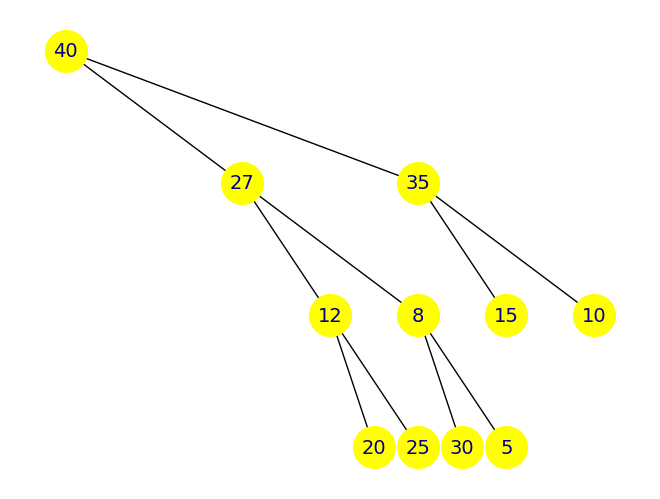

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class MinMaxHeapVisualizer:
    def visualize(self, min_max_heap):
        G = nx.Graph()
        self._build_graph(G, min_max_heap.heap, 0, 0)
        pos = {}
        for node in G.nodes(data=True):
            index, level = node[0], node[1]['level']
            pos[index] = (index * 2 ** (4 - level), -level)
        labels = {index: min_max_heap.heap[index] for index in G.nodes()}
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=900, node_color='yellow', font_size=14,font_color='darkblue')
        plt.show()
    def _build_graph(self, G, heap, index, level):
        if index < len(heap):
            G.add_node(index, level=level)
            left_child = 2 * index + 1
            right_child = 2 * index + 2
            self._build_graph(G, heap, left_child, level + 1)
            self._build_graph(G, heap, right_child, level + 1)
            if left_child < len(heap):
                G.add_edge(index, left_child)
            if right_child < len(heap):
                G.add_edge(index, right_child)
min_max_heap = MinMaxHeap()
values_to_insert = [20, 15, 30, 10, 25, 35, 5, 12, 27, 40, 8]
for value in values_to_insert:
    min_max_heap.insert(value)
min_max_heap_visualizer = MinMaxHeapVisualizer()
min_max_heap_visualizer.visualize(min_max_heap)

In [ ]:
pip install anytree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
from anytree import Node, RenderTree, DoubleStyle
class MinMaxHeapNode(Node):
    def __init__(self, value, parent=None, children=None):
        super(MinMaxHeapNode, self).__init__(str(value), parent=parent, children=children)
        self.value = value
class MinMaxHeap:
    def __init__(self):
        self.root = None
    def insert(self, value):
        if self.root is None:
            self.root = MinMaxHeapNode(value)
        else:
            new_node = MinMaxHeapNode(value)
            self.insert_recursive(self.root, new_node, True)
    def insert_recursive(self, current_node, new_node, is_min_level):
        if current_node.value > new_node.value:
            current_node.value, new_node.value = new_node.value, current_node.value
        if not current_node.children:
            current_node.children = [new_node]
            new_node.parent = current_node
        else:
            if is_min_level:
                min_child = min(current_node.children, key=lambda x: x.value)
                self.insert_recursive(min_child, new_node, not is_min_level)
            else:
                max_child = max(current_node.children, key=lambda x: x.value)
                self.insert_recursive(max_child, new_node, not is_min_level)
min_max_heap = MinMaxHeap()
values_to_insert = [20, 15, 30, 10, 25, 35, 5, 12, 27, 40, 8]
for value in values_to_insert:
    min_max_heap.insert(value)
for pre, _, node in RenderTree(min_max_heap.root, style=DoubleStyle):
    print("%s%s" % (pre, node.name))

20
╚══ 15
    ╚══ 30
        ╚══ 10
            ╚══ 25
                ╚══ 35
                    ╚══ 5
                        ╚══ 12
                            ╚══ 27
                                ╚══ 40
                                    ╚══ 8


In [ ]:
import plotly.graph_objects as go
from queue import SimpleQueue
class MinMaxHeap:
    def __init__(self):
        self.heap = []
    def insert(self, value):
        self.heap.append(value)
        self.heapify_up(len(self.heap) - 1)
    def heapify_up(self, index):
        while index > 0:
            parent = (index - 1) // 2
            if index % 2 == 0:
                if self.heap[index] > self.heap[parent]:
                    self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
                else:
                    break
            else:
                if self.heap[index] < self.heap[parent]:
                    self.heap[index], self.heap[parent] = self.heap[parent], self.heap[index]
                else:
                    break
            index = parent
    def visualize(self):
        fig = go.Figure()
        queue = SimpleQueue()
        queue.put((0, 0, 0))
        while not queue.empty():
            level, pos, parent = queue.get()
            value = self.heap[pos] if pos < len(self.heap) else None
            fig.add_trace(go.Scatter(
                x=[parent, pos],
                y=[-level, -level],
                mode='lines+text',
                name=str(value),
                textposition='bottom center',
                textfont=dict(size=10),
                hoverinfo='text',
                text=str(value),
            ))
            if pos * 2 + 1 < len(self.heap):
                queue.put((level + 1, pos * 2 + 1, pos))
            if pos * 2 + 2 < len(self.heap):
                queue.put((level + 1, pos * 2 + 2, pos))
        fig.update_layout(
            showlegend=False,
            yaxis=dict(
                autorange='reversed',
                showgrid=False,
                zeroline=False,
                showline=False,
                showticklabels=False,
            )
        )
        fig.show()
min_max_heap = MinMaxHeap()
values_to_insert = [20, 15, 30, 10, 25, 35, 5, 12, 27, 40, 8]
for value in values_to_insert:
    min_max_heap.insert(value)
min_max_heap.visualize()

**Multiple String Matching**

In [ ]:
from queue import Queue
class AhoCorasick:
    class TrieNode:
        def __init__(self):
            self.children = {}
            self.fail = None
            self.output = []
    def __init__(self):
        self.root = self.TrieNode()
        self.pattern_lengths = []
    def insert(self, pattern, pattern_index):
        node = self.root
        for ch in pattern:
            if ch not in node.children:
                node.children[ch] = self.TrieNode()
            node = node.children[ch]
        node.output.append(pattern_index)
        self.pattern_lengths.append(len(pattern))
    def build_failure_links(self):
        q = Queue()
        for child in self.root.children.values():
            child.fail = self.root
            q.put(child)
        while not q.empty():
            current = q.get()
            for ch, child in current.children.items():
                q.put(child)
                fail_link = current.fail
                while fail_link is not None and ch not in fail_link.children:
                    fail_link = fail_link.fail
                child.fail = fail_link.children[ch] if fail_link is not None else self.root
                child.output.extend(child.fail.output)
    def search(self, text):
        result = []
        current_state = self.root
        for i, ch in enumerate(text):
            while current_state is not None and ch not in current_state.children:
                current_state = current_state.fail
            if current_state is None:
                current_state = self.root
            else:
                current_state = current_state.children[ch]
                for index in current_state.output:
                    result.append(i - self.pattern_lengths[index] + 1)
        return result
if __name__ == "__main__":
    ac = AhoCorasick()
    num_patterns = int(input("Number of patterns = "))
    patterns = []
    for i in range(num_patterns):
        pattern = input(f"Pattern {i + 1} = ")
        ac.insert(pattern, i)
    ac.build_failure_links()
    text = input("Text = ")
    matches = ac.search(text)
    print("Pattern matches found at positions =", matches)

Number of patterns = 4
Pattern 1 = AB
Pattern 2 = BC
Pattern 3 = ABC
Pattern 4 = ABCD
Text = ABCDAABCDEFFABCDBCD
Pattern matches found at positions = [0, 0, 1, 0, 5, 5, 6, 5, 12, 12, 13, 12, 16]


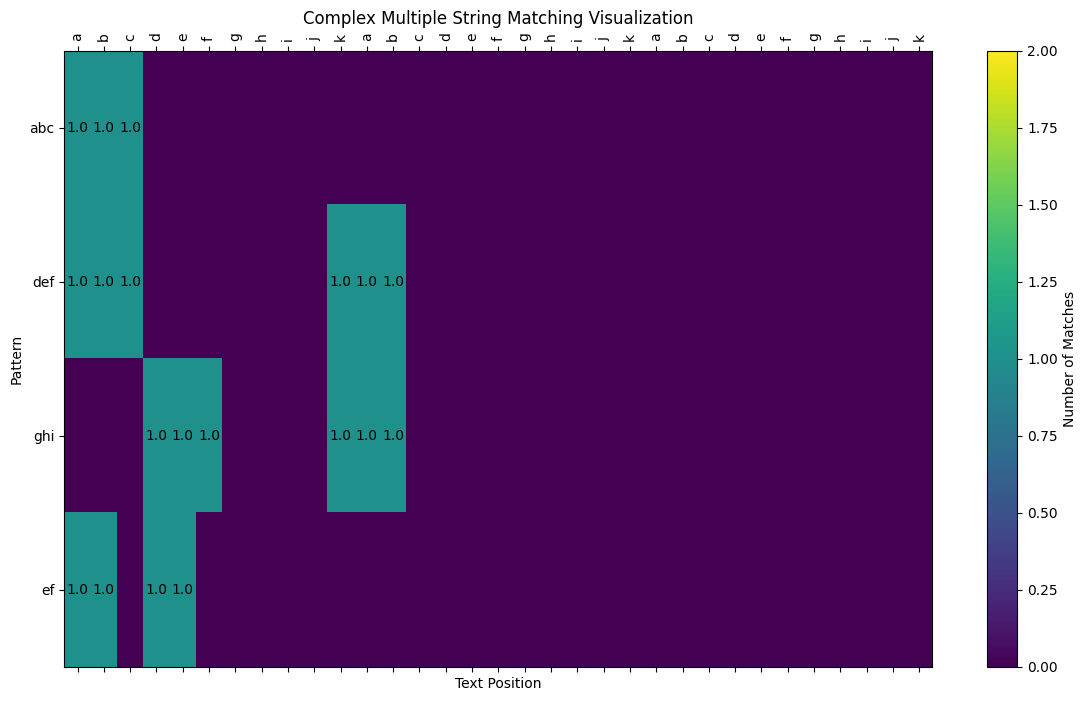

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_matches(matches, patterns, text):
    pattern_count = len(patterns)
    text_length = len(text)
    heatmap = np.zeros((pattern_count, text_length))
    for match in matches:
        start_index, matched_patterns = match
        for pattern_index in matched_patterns:
            pattern_length = len(patterns[pattern_index])
            end_index = start_index + pattern_length
            heatmap[pattern_index, start_index:end_index] += 1
    fig, ax = plt.subplots(figsize=(14, 8))
    cax = ax.matshow(heatmap, cmap='viridis', interpolation='nearest', aspect='auto', vmin=0, vmax=2)
    ax.set_yticks(np.arange(pattern_count))
    ax.set_yticklabels(patterns)
    ax.set_xticks(np.arange(text_length))
    ax.set_xticklabels(list(text), rotation='vertical')
    for i in range(pattern_count):
        for j in range(text_length):
            value = heatmap[i, j]
            if value > 0:
                ax.text(j, i, str(value), ha='center', va='center', color='white' if value > 1 else 'black')
    cbar = fig.colorbar(cax)
    cbar.set_label('Number of Matches')
    plt.xlabel('Text Position')
    plt.ylabel('Pattern')
    plt.title('Multiple String Matching')
    plt.show()
patterns = ["abc", "def", "ghi", "ef"]
text = "abcdefghijkabcdefghijkabcdefghijk"
matches = [(0, [0, 1, 3]), (3, [2, 3]), (10, [1, 2])]
visualize_matches(matches, patterns, text)

**Octree**

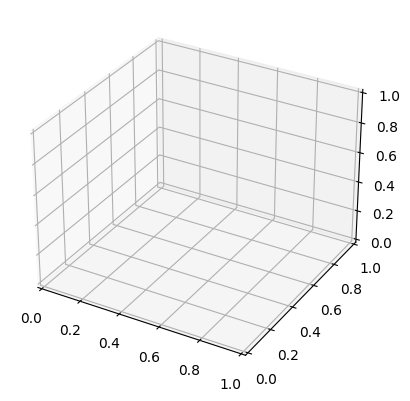

Query Outcome = None


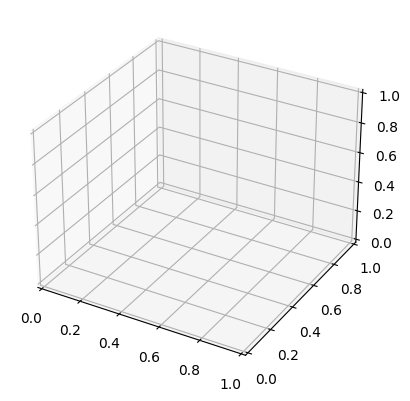

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
class OctreeNode:
    def __init__(self, center, size):
        self.center = center
        self.size = size
        self.children = [None] * 8
        self.data = None
class Octree:
    def __init__(self, root_center, root_size):
        self.root = OctreeNode(root_center, root_size)
    def insert(self, point, data):
        self._insert_recursive(self.root, point, data)
    def _insert_recursive(self, node, point, data):
        if not self._point_inside_node(node, point):
            return
        if node.data is not None:
            self._split_node(node)
        child_index = self._get_child_index(node, point)
        if node.children[child_index] is None:
            child_center, child_size = self._calculate_child_parameters(node, child_index)
            node.children[child_index] = OctreeNode(child_center, child_size)
        self._insert_recursive(node.children[child_index], point, data)
    def _point_inside_node(self, node, point):
        half_size = node.size / 2
        min_bounds = [node.center[i] - half_size for i in range(3)]
        max_bounds = [node.center[i] + half_size for i in range(3)]
        return all(min_bounds[i] <= point[i] <= max_bounds[i] for i in range(3))
    def _split_node(self, node):
        child_index = self._get_child_index(node, node.center)
        if node.children[child_index] is None:
            child_center, child_size = self._calculate_child_parameters(node, child_index)
            node.children[child_index] = OctreeNode(child_center, child_size)
        self._insert_recursive(node.children[child_index], node.center, node.data)
        node.data = None
    def _get_child_index(self, node, point):
        child_index = 0
        for i in range(3):
            if point[i] > node.center[i]:
                child_index |= 1 << i
        return child_index
    def _calculate_child_parameters(self, node, child_index):
        half_size = node.size / 2
        child_center = [node.center[i] + half_size * ((child_index >> i) & 1) for i in range(3)]
        child_size = half_size
        return child_center, child_size
    def query(self, query_point):
        return self._query_recursive(self.root, query_point)
    def _query_recursive(self, node, query_point):
        if not self._point_inside_node(node, query_point):
            return None
        if node.data is not None:
            return node.data
        child_index = self._get_child_index(node, query_point)
        if node.children[child_index] is not None:
            return self._query_recursive(node.children[child_index], query_point)
    def delete(self, point):
        self._delete_recursive(self.root, point)
    def _delete_recursive(self, node, point):
        if not self._point_inside_node(node, point):
            return
        if node.data is not None and node.center == point:
            node.data = None
            return
        child_index = self._get_child_index(node, point)
        if node.children[child_index] is not None:
            self._delete_recursive(node.children[child_index], point)
    def visualize(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        self._visualize_recursive(ax, self.root)
        plt.show()
    def _visualize_recursive(self, ax, node):
        if node.data is not None:
            ax.scatter(node.center[0], node.center[1], node.center[2], color='r', s=50)
        for child in node.children:
            if child is not None:
                self._visualize_recursive(ax, child)
octree = Octree([0, 0, 0], 10)
octree.insert([2, 2, 2], "Data1")
octree.insert([8, 8, 8], "Data2")
octree.visualize()
query_result = octree.query([2, 2, 2])
print("Query Outcome =", query_result)
octree.delete([2, 2, 2])
octree.visualize()

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go
import numpy as np
class OctreeNode:
    def __init__(self, center, size):
        self.center = center
        self.size = size
        self.children = [None] * 8
        self.data = None
class Octree:
    def __init__(self, root_center, root_size):
        self.root = OctreeNode(root_center, root_size)
    def insert(self, point, data):
        self._insert_recursive(self.root, point, data)
    def _insert_recursive(self, node, point, data):
        if not self._point_inside_node(node, point):
            return
        if node.data is not None:
            self._split_node(node)
        child_index = self._get_child_index(node, point)
        if node.children[child_index] is None:
            child_center, child_size = self._calculate_child_parameters(node, child_index)
            node.children[child_index] = OctreeNode(child_center, child_size)
        self._insert_recursive(node.children[child_index], point, data)
    def _point_inside_node(self, node, point):
        half_size = node.size / 2
        min_bounds = [node.center[i] - half_size for i in range(3)]
        max_bounds = [node.center[i] + half_size for i in range(3)]
        return all(min_bounds[i] <= point[i] <= max_bounds[i] for i in range(3))
    def _split_node(self, node):
        child_index = self._get_child_index(node, node.center)
        if node.children[child_index] is None:
            child_center, child_size = self._calculate_child_parameters(node, child_index)
            node.children[child_index] = OctreeNode(child_center, child_size)
        self._insert_recursive(node.children[child_index], node.center, node.data)
        node.data = None
    def _get_child_index(self, node, point):
        child_index = 0
        for i in range(3):
            if point[i] > node.center[i]:
                child_index |= 1 << i
        return child_index
    def _calculate_child_parameters(self, node, child_index):
        half_size = node.size / 2
        child_center = [node.center[i] + half_size * ((child_index >> i) & 1) for i in range(3)]
        child_size = half_size
        return child_center, child_size
    def visualize(self):
        fig = go.Figure()
        self._visualize_recursive(fig, self.root)
        fig.show()
    def _visualize_recursive(self, fig, node):
        if node.data is not None:
            fig.add_trace(go.Scatter3d(x=[node.center[0]], y=[node.center[1]], z=[node.center[2]],
                                       mode='markers', marker=dict(size=8, color='red'),
                                       text=[node.data], name=node.data))
        x, y, z = self._generate_wireframe(node)
        fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(color='green')))
        for child in node.children:
            if child is not None:
                self._visualize_recursive(fig, child)
    def _generate_wireframe(self, node):
        half_size = node.size / 2
        center = np.array(node.center)
        vertices = np.array([
            center + [-half_size, -half_size, -half_size],
            center + [-half_size, -half_size, half_size],
            center + [-half_size, half_size, -half_size],
            center + [-half_size, half_size, half_size],
            center + [half_size, -half_size, -half_size],
            center + [half_size, -half_size, half_size],
            center + [half_size, half_size, -half_size],
            center + [half_size, half_size, half_size],
        ])
        return vertices[:, 0], vertices[:, 1], vertices[:, 2]
octree = Octree([0, 0, 0], 10)
octree.insert([2, 2, 2], "Data1")
octree.insert([8, 8, 8], "Data2")
octree.visualize()

**Optimal Binary Search Tree**

In [ ]:
class Node:
    def __init__(self, key, frequency):
        self.key = key
        self.frequency = frequency
        self.left = None
        self.right = None
def optimal_bst(keys, frequencies):
    n = len(keys)
    cost = [[0] * (n + 1) for _ in range(n + 1)]
    root = [[0] * n for _ in range(n)]
    for i in range(n):
        cost[i][i + 1] = frequencies[i]
    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length
            cost[i][j] = float('inf')
            for k in range(i, j):
                q = cost[i][k] + cost[k][j] + sum(frequencies[i:j])
                if q < cost[i][j]:
                    cost[i][j] = q
                    root[i][j - 1] = k

    return root
def construct_optimal_bst(keys, root, i, j):
    if i < j:
        k = root[i][j - 1]
        node = Node(keys[k], 0)
        node.left = construct_optimal_bst(keys, root, i, k)
        node.right = construct_optimal_bst(keys, root, k + 1, j)
        return node
    return None
def print_tree(root, level=0, prefix="Root: "):
    if root is not None:
        print(" " * (level * 4) + prefix + str(root.key) + " (" + str(root.frequency) + ")")
        if root.left is not None or root.right is not None:
            print_tree(root.left, level + 1, "L-- ")
            print_tree(root.right, level + 1, "R-- ")
keys = [10, 12, 20]
frequencies = [34, 8, 50]
root_table = optimal_bst(keys, frequencies)
root_node = construct_optimal_bst(keys, root_table, 0, len(keys))
print("Optimal Binary Search Tree:")
print_tree(root_node)

Optimal Binary Search Tree:
Root: 20 (0)
    L-- 12 (0)
        L-- 10 (0)


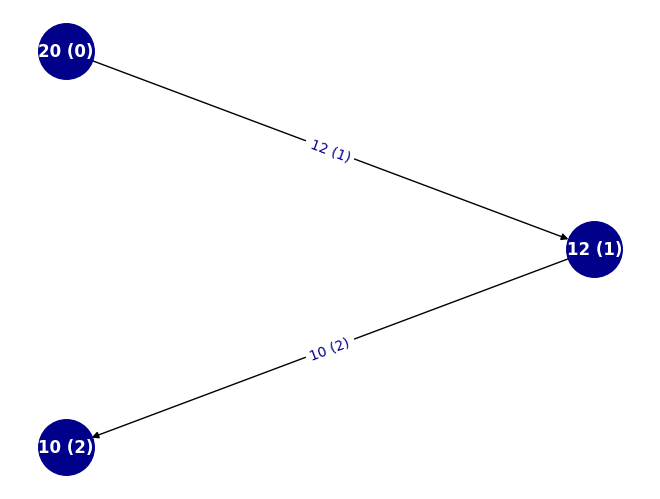

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
class Node:
    def __init__(self, key, frequency):
        self.key = key
        self.frequency = frequency
        self.left = None
        self.right = None
def optimal_bst(keys, frequencies):
    n = len(keys)
    cost = [[0] * (n + 1) for _ in range(n + 1)]
    root = [[0] * n for _ in range(n)]
    for i in range(n):
        cost[i][i + 1] = frequencies[i]
    for length in range(2, n + 1):
        for i in range(n - length + 1):
            j = i + length
            cost[i][j] = float('inf')
            for k in range(i, j):
                q = cost[i][k] + cost[k][j] + sum(frequencies[i:j])
                if q < cost[i][j]:
                    cost[i][j] = q
                    root[i][j - 1] = k
    return root
def construct_optimal_bst(keys, root, i, j, g, parent=None, position=None, level=0):
    if i < j:
        k = root[i][j - 1]
        current_node = keys[k]
        g.add_node(current_node, label=f"{current_node} ({level})")
        if parent is not None:
            g.add_edge(parent, current_node, label=f"{current_node} ({level})")
            position[current_node] = (k, -level)
        construct_optimal_bst(keys, root, i, k, g, current_node, position, level + 1)
        construct_optimal_bst(keys, root, k + 1, j, g, current_node, position, level + 1)
def visualize_optimal_bst(keys, frequencies):
    root_table = optimal_bst(keys, frequencies)
    G = nx.DiGraph()
    pos = {}
    construct_optimal_bst(keys, root_table, 0, len(keys), G, None, pos)
    edge_labels = nx.get_edge_attributes(G, 'label')
    node_labels = nx.get_node_attributes(G, 'label')
    for node in G.nodes():
        if node not in pos:
            pos[node] = (0, 0)
    nx.draw(G, pos, with_labels=True, labels=node_labels, font_size=12, node_size=1600, node_color="darkblue", font_color="white", font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkblue')
    plt.show()
keys = [10, 12, 20]
frequencies = [34, 8, 50]
visualize_optimal_bst(keys, frequencies)

**Pairing Heap**

In [ ]:
class PairingNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.children = []
class PairingHeap:
    def __init__(self):
        self.root = None
    def insert(self, key, value):
        new_node = PairingNode(key, value)
        self.root = self._merge(self.root, new_node)
    def find_min(self):
        if self.root is None:
            return None
        return self.root.key, self.root.value
    def delete_min(self):
        if self.root is None:
            return None
        min_node = self.root
        if min_node.children:
            children = min_node.children
            self.root = None
            for child in children:
                self.root = self._merge(self.root, child)
        else:
            self.root = None
        return min_node.key, min_node.value
    def decrease_key(self, node, new_key):
        if new_key > node.key:
            raise ValueError("New key must be less than or equal to the current key")
        node.key = new_key
        if node != self.root:
            node.parent.children.remove(node)
            self.root = self._merge(self.root, node)
    def _merge(self, heap1, heap2):
        if heap1 is None:
            return heap2
        if heap2 is None:
            return heap1
        if heap1.key < heap2.key:
            heap2.children.append(heap1)
            heap1.parent = heap2
            return heap2
        else:
            heap1.children.append(heap2)
            heap2.parent = heap1
            return heap1
    def _pairwise_combine(self, nodes):
        while len(nodes) > 1:
            new_roots = []
            i = 0
            while i < len(nodes) - 1:
                new_roots.append(self._merge(nodes[i], nodes[i + 1]))
                i += 2
            if i == len(nodes) - 1:
                new_roots.append(nodes[-1])
            nodes = new_roots
        return nodes[0] if nodes else None
pairing_heap = PairingHeap()
pairing_heap.insert(5, "A")
pairing_heap.insert(3, "B")
pairing_heap.insert(8, "C")
pairing_heap.insert(1, "D")
print("Min element =", pairing_heap.find_min())
print("Deleting min element =", pairing_heap.delete_min())
print("Min element after deletion =", pairing_heap.find_min())

Min element = (8, 'C')
Deleting min element = (8, 'C')
Min element after deletion = (5, 'A')


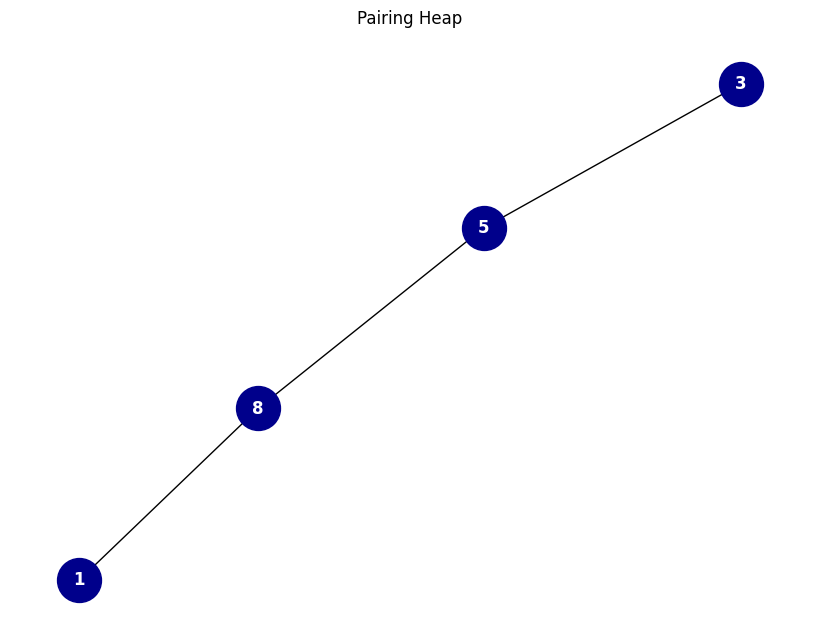

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import SimpleQueue
class PairingNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.children = []
def visualize_pairing_heap(heap):
    G = nx.Graph()
    def add_nodes_edges(node):
        if node is not None:
            G.add_node(str(node.key), label=str(node.key) + ": " + str(node.value))
            for child in node.children:
                G.add_edge(str(node.key), str(child.key))
                add_nodes_edges(child)
    add_nodes_edges(heap.root)
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000, node_color="darkblue", font_color="white", font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
    plt.title("Pairing Heap")
    plt.show()
pairing_heap = PairingHeap()
pairing_heap.insert(5, "A")
pairing_heap.insert(3, "B")
pairing_heap.insert(8, "C")
pairing_heap.insert(1, "D")
visualize_pairing_heap(pairing_heap)

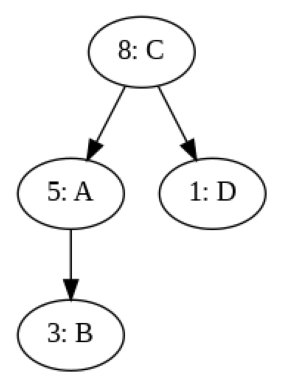

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
class PairingNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.children = []
def visualize_pairing_heap(heap):
    G = nx.Graph()
    def add_nodes_edges(node):
        if node is not None:
            G.add_node(str(node.key), label=str(node.key) + ": " + str(node.value))
            for child in node.children:
                G.add_edge(str(node.key), str(child.key))
                add_nodes_edges(child)
    add_nodes_edges(heap.root)
    pos = nx.spring_layout(G)
    A = pgv.AGraph(directed=True)
    for node, attr in G.nodes(data=True):
        A.add_node(node, label=attr['label'])
    for edge in G.edges():
        A.add_edge(*edge)
    A.layout(prog='dot')
    A.draw('pairing_heap.png')
    img = plt.imread('pairing_heap.png')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
pairing_heap = PairingHeap()
pairing_heap.insert(5, "A")
pairing_heap.insert(3, "B")
pairing_heap.insert(8, "C")
pairing_heap.insert(1, "D")
visualize_pairing_heap(pairing_heap)

**Partial Persistence**

In [ ]:
class Node:
    def __init__(self, value):
        self.data = value
        self.next = None
class PersistentLinkedList:
    def __init__(self):
        self.head = None
    def insert(self, value):
        new_list = PersistentLinkedList()
        new_node = Node(value)
        new_list.head = self._copy_list(self.head)
        new_node.next = new_list.head
        new_list.head = new_node
        return new_list
    def print_list(self):
        current = self.head
        result = "List: "
        while current:
            result += str(current.data) + " "
            current = current.next
        print(result)
    def _copy_list(self, original):
        if not original:
            return None
        new_head = Node(original.data)
        new_current = new_head
        current = original.next
        while current:
            new_current.next = Node(current.data)
            new_current = new_current.next
            current = current.next
        return new_head
list1 = PersistentLinkedList()
list1 = list1.insert(1)
list1 = list1.insert(2)
list1 = list1.insert(3)
list1.print_list()
list2 = list1.insert(4)
list2.print_list()
list1.print_list()

List: 3 2 1 
List: 4 3 2 1 
List: 3 2 1 


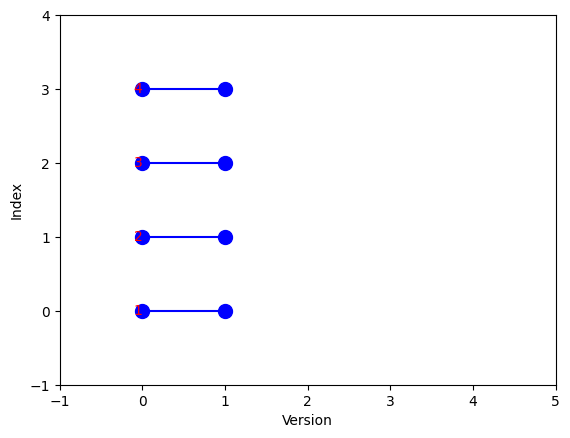

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
class Node:
    def __init__(self, value):
        self.data = value
        self.next = None
class PersistentLinkedList:
    def __init__(self):
        self.head = None
        self.versions = []
    def insert(self, value):
        new_list = PersistentLinkedList()
        new_node = Node(value)
        new_list.head = self._copy_list(self.head)
        new_node.next = new_list.head
        new_list.head = new_node
        self.versions.append(new_list)
    def visualize(self):
        fig, ax = plt.subplots()
        for i, version in enumerate(self.versions):
            current = version.head
            x = 0
            while current:
                ax.add_line(Line2D([x, x + 1], [i, i], marker="o", markersize=10, color='b'))
                ax.text(x, i, str(current.data), ha='right', va='center', color='r')
                current = current.next
                x += 1
        ax.set_xlim([-1, len(self.versions) + 1])
        ax.set_ylim([-1, len(self.versions)])
        ax.set_xlabel('Version')
        ax.set_ylabel('Index')
        plt.show()
    def _copy_list(self, original):
        if not original:
            return None
        new_head = Node(original.data)
        new_current = new_head
        current = original.next
        while current:
            new_current.next = Node(current.data)
            new_current = new_current.next
            current = current.next
        return new_head
list1 = PersistentLinkedList()
list1.insert(1)
list1.insert(2)
list1.insert(3)
list2 = list1.insert(4)
list1.visualize()

**Priority Search Tree Geomteric Intersection**

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
def build_pst(points):
    if not points:
        return None
    points.sort(key=lambda p: p.x)
    median_index = len(points) // 2
    median_point = points[median_index]
    left_points = [p for p in points if p.x < median_point.x]
    right_points = [p for p in points if p.x > median_point.x]
    return Node(
        point=median_point,
        left=build_pst(left_points),
        right=build_pst(right_points)
    )
def query_pst(root, x_min, x_max, y_min, y_max):
    if root is None:
        return []
    result = []
    if x_min <= root.point.x <= x_max and y_min <= root.point.y <= y_max:
        result.append(root.point)
    if root.point.x >= x_min:
        result.extend(query_pst(root.left, x_min, x_max, y_min, y_max))
    if root.point.x <= x_max:
        result.extend(query_pst(root.right, x_min, x_max, y_min, y_max))
    return result
points = [Point(1, 2), Point(3, 4), Point(5, 6), Point(7, 8), Point(9, 10)]
pst_root = build_pst(points)
x_range_min = 4
x_range_max = 8
y_range_min = 3
y_range_max = 9
result = query_pst(pst_root, x_range_min, x_range_max, y_range_min, y_range_max)
print("Points in the given range:")
for point in result:
    print(f"({point.x}, {point.y})")

Points in the given range:
(5, 6)
(7, 8)


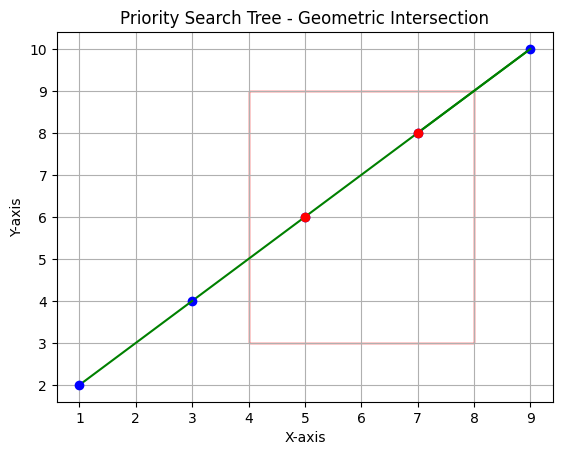

In [ ]:
import matplotlib.pyplot as plt
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
def build_pst(points):
    if not points:
        return None
    points.sort(key=lambda p: p.x)
    median_index = len(points) // 2
    median_point = points[median_index]
    left_points = [p for p in points if p.x < median_point.x]
    right_points = [p for p in points if p.x > median_point.x]
    return Node(
        point=median_point,
        left=build_pst(left_points),
        right=build_pst(right_points)
    )
def query_pst(root, x_min, x_max, y_min, y_max, result):
    if root is None:
        return
    if x_min <= root.point.x <= x_max and y_min <= root.point.y <= y_max:
        result.append(root.point)
    if root.point.x >= x_min:
        query_pst(root.left, x_min, x_max, y_min, y_max, result)
    if root.point.x <= x_max:
        query_pst(root.right, x_min, x_max, y_min, y_max, result)
def visualize_pst(root, ax):
    if root is not None:
        ax.plot(root.point.x, root.point.y, 'bo')
        if root.left:
            ax.plot([root.point.x, root.left.point.x], [root.point.y, root.left.point.y], 'g-')
            visualize_pst(root.left, ax)
        if root.right:
            ax.plot([root.point.x, root.right.point.x], [root.point.y, root.right.point.y], 'g-')
            visualize_pst(root.right, ax)
def visualize_query_result(result, ax):
    for point in result:
        ax.plot(point.x, point.y, 'ro')
points = [Point(1, 2), Point(3, 4), Point(5, 6), Point(7, 8), Point(9, 10)]
pst_root = build_pst(points)
fig, ax = plt.subplots()
visualize_pst(pst_root, ax)
x_range_min, x_range_max = 4, 8
y_range_min, y_range_max = 3, 9
rect = plt.Rectangle((x_range_min, y_range_min), x_range_max - x_range_min, y_range_max - y_range_min, fill=False, edgecolor='r')
ax.add_patch(rect)
query_result = []
query_pst(pst_root, x_range_min, x_range_max, y_range_min, y_range_max, query_result)
visualize_query_result(query_result, ax)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Priority Search Tree - Geometric Intersection')
plt.grid(True)
plt.show()

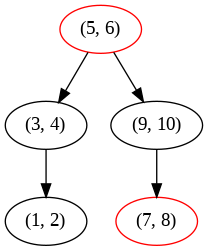

In [ ]:
import pygraphviz as pgv
from IPython.display import Image
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right
def build_pst(points):
    if not points:
        return None
    points.sort(key=lambda p: p.x)
    median_index = len(points) // 2
    median_point = points[median_index]
    left_points = [p for p in points if p.x < median_point.x]
    right_points = [p for p in points if p.x > median_point.x]
    return Node(
        point=median_point,
        left=build_pst(left_points),
        right=build_pst(right_points)
    )
def query_pst(root, x_min, x_max, y_min, y_max, result):
    if root is None:
        return
    if x_min <= root.point.x <= x_max and y_min <= root.point.y <= y_max:
        result.append(root.point)
    if root.point.x >= x_min:
        query_pst(root.left, x_min, x_max, y_min, y_max, result)
    if root.point.x <= x_max:
        query_pst(root.right, x_min, x_max, y_min, y_max, result)
def visualize_pst(graph, root):
    if root is not None:
        graph.add_node((root.point.x, root.point.y))
        if root.left:
            graph.add_edge((root.point.x, root.point.y), (root.left.point.x, root.left.point.y))
            visualize_pst(graph, root.left)
        if root.right:
            graph.add_edge((root.point.x, root.point.y), (root.right.point.x, root.right.point.y))
            visualize_pst(graph, root.right)
def visualize_query_result(graph, result):
    for point in result:
        graph.add_node((point.x, point.y), color='red')
points = [Point(1, 2), Point(3, 4), Point(5, 6), Point(7, 8), Point(9, 10)]
pst_root = build_pst(points)
graph = pgv.AGraph(directed=True)
visualize_pst(graph, pst_root)
x_range_min, x_range_max = 4, 8
y_range_min, y_range_max = 3, 9
query_result = []
query_pst(pst_root, x_range_min, x_range_max, y_range_min, y_range_max, query_result)
visualize_query_result(graph, query_result)
graph.write('pst_graph.dot')
!dot -Tpng pst_graph.dot -o pst_graph.png
Image(filename='pst_graph.png')

**Quad-Tree**

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
class QuadTreeNode:
    def __init__(self, boundary, capacity):
        self.boundary = boundary
        self.capacity = capacity
        self.points = []
        self.subdivided = False
        self.northwest = None
        self.northeast = None
        self.southwest = None
        self.southeast = None
    def subdivide(self):
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.width / 2
        h = self.boundary.height / 2
        nw_boundary = Rectangle(x, y, w, h)
        self.northwest = QuadTreeNode(nw_boundary, self.capacity)
        ne_boundary = Rectangle(x + w, y, w, h)
        self.northeast = QuadTreeNode(ne_boundary, self.capacity)
        sw_boundary = Rectangle(x, y + h, w, h)
        self.southwest = QuadTreeNode(sw_boundary, self.capacity)
        se_boundary = Rectangle(x + w, y + h, w, h)
        self.southeast = QuadTreeNode(se_boundary, self.capacity)
        self.subdivided = True
    def insert(self, point):
        if not self.boundary.contains_point(point):
            return False
        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        if not self.subdivided:
            self.subdivide()
        return (
            self.northwest.insert(point) or
            self.northeast.insert(point) or
            self.southwest.insert(point) or
            self.southeast.insert(point)
        )
    def query_range(self, range_boundary, found_points):
        if not self.boundary.intersects(range_boundary):
            return
        for point in self.points:
            if range_boundary.contains_point(point):
                found_points.append(point)
        if self.subdivided:
            self.northwest.query_range(range_boundary, found_points)
            self.northeast.query_range(range_boundary, found_points)
            self.southwest.query_range(range_boundary, found_points)
            self.southeast.query_range(range_boundary, found_points)
class Rectangle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
    def contains_point(self, point):
        return (
            self.x <= point.x <= self.x + self.width and
            self.y <= point.y <= self.y + self.height
        )
    def intersects(self, other):
        return not (
            self.x + self.width < other.x or
            other.x + other.width < self.x or
            self.y + self.height < other.y or
            other.y + other.height < self.y
        )
boundary = Rectangle(0, 0, 100, 100)
quadtree = QuadTreeNode(boundary, capacity=4)
points_to_insert = [
    Point(20, 30),
    Point(70, 80),
    Point(40, 60),
    Point(10, 90),
    Point(90, 10),
    Point(50, 50),
    Point(85, 15)
]
for point in points_to_insert:
    quadtree.insert(point)
range_boundary = Rectangle(30, 40, 20, 20)
found_points = []
quadtree.query_range(range_boundary, found_points)
print("Points in the quadtree:")
for point in points_to_insert:
    print(f"({point.x}, {point.y})")
print("\nPoints in the specified range:")
for point in found_points:
    print(f"({point.x}, {point.y})")

Points in the quadtree:
(20, 30)
(70, 80)
(40, 60)
(10, 90)
(90, 10)
(50, 50)
(85, 15)

Points in the specified range:
(40, 60)
(50, 50)


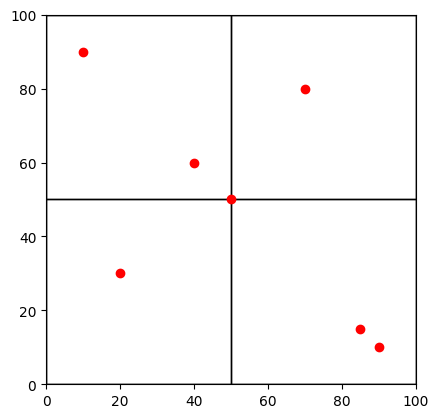

In [ ]:
import matplotlib.pyplot as plt
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
class QuadTreeNode:
    def __init__(self, boundary, capacity):
        self.boundary = boundary
        self.capacity = capacity
        self.points = []
        self.subdivided = False
        self.northwest = None
        self.northeast = None
        self.southwest = None
        self.southeast = None
    def subdivide(self):
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.width / 2
        h = self.boundary.height / 2
        nw_boundary = Rectangle(x, y, w, h)
        self.northwest = QuadTreeNode(nw_boundary, self.capacity)
        ne_boundary = Rectangle(x + w, y, w, h)
        self.northeast = QuadTreeNode(ne_boundary, self.capacity)
        sw_boundary = Rectangle(x, y + h, w, h)
        self.southwest = QuadTreeNode(sw_boundary, self.capacity)
        se_boundary = Rectangle(x + w, y + h, w, h)
        self.southeast = QuadTreeNode(se_boundary, self.capacity)
        self.subdivided = True
    def insert(self, point):
        if not self.boundary.contains_point(point):
            return False
        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        if not self.subdivided:
            self.subdivide()
        return (
            self.northwest.insert(point) or
            self.northeast.insert(point) or
            self.southwest.insert(point) or
            self.southeast.insert(point)
        )
def visualize_quadtree(node, ax):
    if node is None:
        return
    ax.add_patch(plt.Rectangle((node.boundary.x, node.boundary.y), node.boundary.width, node.boundary.height, fill=False, edgecolor='black'))
    for point in node.points:
        ax.plot(point.x, point.y, 'ro')
    visualize_quadtree(node.northwest, ax)
    visualize_quadtree(node.northeast, ax)
    visualize_quadtree(node.southwest, ax)
    visualize_quadtree(node.southeast, ax)
class Rectangle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
    def contains_point(self, point):
        return (
            self.x <= point.x <= self.x + self.width and
            self.y <= point.y <= self.y + self.height
        )
    def intersects(self, other):
        return not (
            self.x + self.width < other.x or
            other.x + other.width < self.x or
            self.y + self.height < other.y or
            other.y + other.height < self.y
        )
boundary = Rectangle(0, 0, 100, 100)
quadtree = QuadTreeNode(boundary, capacity=4)
points_to_insert = [
    Point(20, 30),
    Point(70, 80),
    Point(40, 60),
    Point(10, 90),
    Point(90, 10),
    Point(50, 50),
    Point(85, 15)
]
for point in points_to_insert:
    quadtree.insert(point)
fig, ax = plt.subplots()
visualize_quadtree(quadtree, ax)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

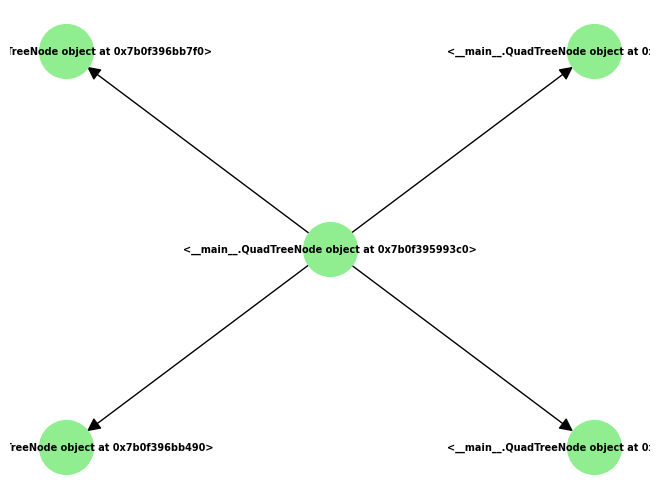

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
class QuadTreeNode:
    def __init__(self, boundary, capacity):
        self.boundary = boundary
        self.capacity = capacity
        self.points = []
        self.subdivided = False
        self.northwest = None
        self.northeast = None
        self.southwest = None
        self.southeast = None
    def subdivide(self):
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.width / 2
        h = self.boundary.height / 2
        nw_boundary = Rectangle(x, y, w, h)
        self.northwest = QuadTreeNode(nw_boundary, self.capacity)
        ne_boundary = Rectangle(x + w, y, w, h)
        self.northeast = QuadTreeNode(ne_boundary, self.capacity)
        sw_boundary = Rectangle(x, y + h, w, h)
        self.southwest = QuadTreeNode(sw_boundary, self.capacity)
        se_boundary = Rectangle(x + w, y + h, w, h)
        self.southeast = QuadTreeNode(se_boundary, self.capacity)
        self.subdivided = True
    def insert(self, point):
        if not self.boundary.contains_point(point):
            return False
        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        if not self.subdivided:
            self.subdivide()
        return (
            self.northwest.insert(point) or
            self.northeast.insert(point) or
            self.southwest.insert(point) or
            self.southeast.insert(point)
        )
class Rectangle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
    def contains_point(self, point):
        return (
            self.x <= point.x <= self.x + self.width and
            self.y <= point.y <= self.y + self.height
        )
    def intersects(self, other):
        return not (
            self.x + self.width < other.x or
            other.x + other.width < self.x or
            self.y + self.height < other.y or
            other.y + other.height < self.y
        )
def visualize_quadtree(node, graph, parent=None):
    if node is None:
        return
    graph.add_node(node, pos=(node.boundary.x + node.boundary.width / 2, node.boundary.y + node.boundary.height / 2))
    if parent is not None:
        graph.add_edge(parent, node)
    visualize_quadtree(node.northwest, graph, node)
    visualize_quadtree(node.northeast, graph, node)
    visualize_quadtree(node.southwest, graph, node)
    visualize_quadtree(node.southeast, graph, node)
boundary = Rectangle(0, 0, 100, 100)
quadtree = QuadTreeNode(boundary, capacity=4)
points_to_insert = [
    Point(20, 30),
    Point(70, 80),
    Point(40, 60),
    Point(10, 90),
    Point(90, 10),
    Point(50, 50),
    Point(85, 15)
]
for point in points_to_insert:
    quadtree.insert(point)
quadtree_graph = nx.DiGraph()
visualize_quadtree(quadtree, quadtree_graph)
pos = nx.get_node_attributes(quadtree_graph, 'pos')
nx.draw(quadtree_graph, pos, with_labels=True, node_size=1500, node_color='lightgreen', font_size=7, font_color='black', font_weight='bold', arrowsize=20)
plt.show()

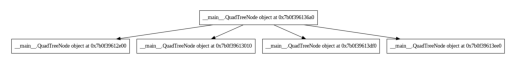

In [ ]:
import pygraphviz as pgv
import matplotlib.pyplot as plt
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
class QuadTreeNode:
    def __init__(self, boundary, capacity):
        self.boundary = boundary
        self.capacity = capacity
        self.points = []
        self.subdivided = False
        self.northwest = None
        self.northeast = None
        self.southwest = None
        self.southeast = None
    def subdivide(self):
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.width / 2
        h = self.boundary.height / 2
        nw_boundary = Rectangle(x, y, w, h)
        self.northwest = QuadTreeNode(nw_boundary, self.capacity)
        ne_boundary = Rectangle(x + w, y, w, h)
        self.northeast = QuadTreeNode(ne_boundary, self.capacity)
        sw_boundary = Rectangle(x, y + h, w, h)
        self.southwest = QuadTreeNode(sw_boundary, self.capacity)
        se_boundary = Rectangle(x + w, y + h, w, h)
        self.southeast = QuadTreeNode(se_boundary, self.capacity)
        self.subdivided = True
    def insert(self, point):
        if not self.boundary.contains_point(point):
            return False
        if len(self.points) < self.capacity:
            self.points.append(point)
            return True
        if not self.subdivided:
            self.subdivide()
        return (
            self.northwest.insert(point) or
            self.northeast.insert(point) or
            self.southwest.insert(point) or
            self.southeast.insert(point)
        )
class Rectangle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
    def contains_point(self, point):
        return (
            self.x <= point.x <= self.x + self.width and
            self.y <= point.y <= self.y + self.height
        )
    def intersects(self, other):
        return not (
            self.x + self.width < other.x or
            other.x + other.width < self.x or
            self.y + self.height < other.y or
            other.y + other.height < self.y
        )
def visualize_quadtree(node, graph, parent=None):
    if node is None:
        return
    graph.add_node(str(node), label=str(node), shape='box')
    if parent is not None:
        graph.add_edge(str(parent), str(node))
    visualize_quadtree(node.northwest, graph, node)
    visualize_quadtree(node.northeast, graph, node)
    visualize_quadtree(node.southwest, graph, node)
    visualize_quadtree(node.southeast, graph, node)
boundary = Rectangle(0, 0, 100, 100)
quadtree = QuadTreeNode(boundary, capacity=4)
points_to_insert = [
    Point(20, 30),
    Point(70, 80),
    Point(40, 60),
    Point(10, 90),
    Point(90, 10),
    Point(50, 50),
    Point(85, 15)
]
for point in points_to_insert:
    quadtree.insert(point)
quadtree_graph = pgv.AGraph(strict=True, directed=True)
visualize_quadtree(quadtree, quadtree_graph)
output_file = "quadtree_visualization.png"
quadtree_graph.draw(output_file, prog='dot', format='png')
img = plt.imread(output_file)
plt.imshow(img)
plt.axis('off')
plt.show()

**Randomized Incremental Construction**

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def orientation(p, q, r):
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0
    return 1 if val > 0 else 2

def convex_hull_ric(points):
    hull = []
    points.sort(key=lambda point: (point.x, point.y))
    hull.append(points[0])
    hull.append(points[-1])
    up_set, down_set = [], []

    for i in range(1, len(points) - 1):
        orientation_val = orientation(points[0], points[-1], points[i])
        if orientation_val == 2:
            up_set.append(points[i])
        elif orientation_val == 1:
            down_set.append(points[i])

    for p in up_set:
        while len(hull) >= 2 and orientation(hull[-2], hull[-1], p) != 2:
            hull.pop()

        hull.append(p)

    for p in down_set:
        while len(hull) >= 2 and orientation(hull[-2], hull[-1], p) != 2:
            hull.pop()

        hull.append(p)

    return hull

if __name__ == "__main__":
    n = int(input("Enter the number of points: "))
    points = []
    print("Enter the coordinates of each point (x y):")
    for _ in range(n):
        x, y = map(int, input().split())
        points.append(Point(x, y))

    convex_hull = convex_hull_ric(points)

    print("Convex Hull Points:")
    for p in convex_hull:
        print(f"({p.x}, {p.y})")


Enter the number of points: 6
Enter the coordinates of each point (x y):
1 1
2 5
3 7
4 9
12 17
11 29
Convex Hull Points:
(1, 1)
(12, 17)
(11, 29)


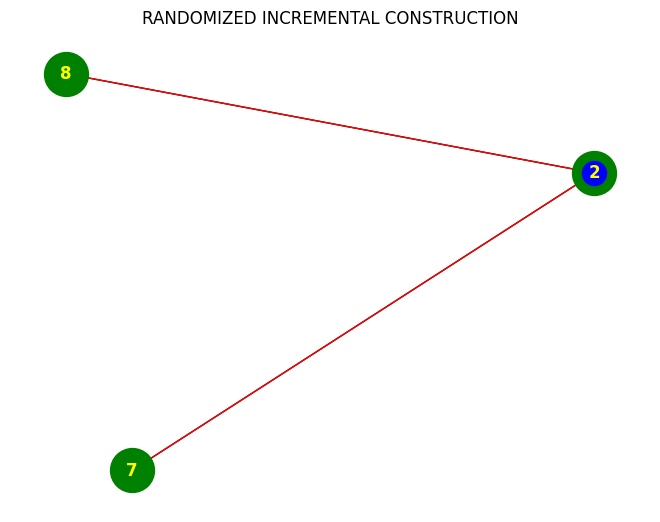

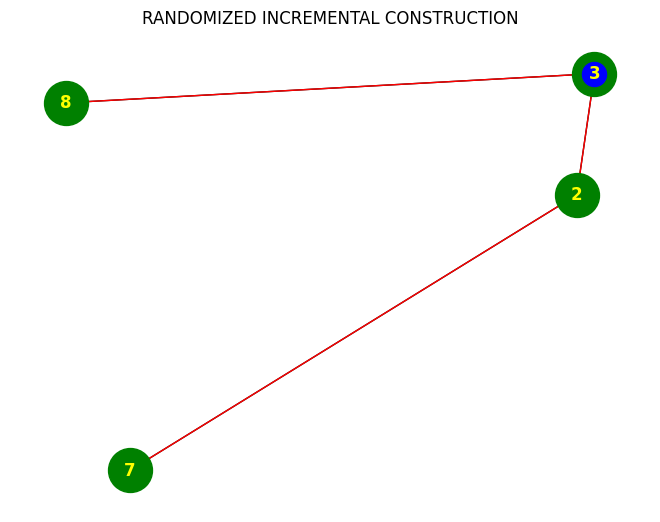

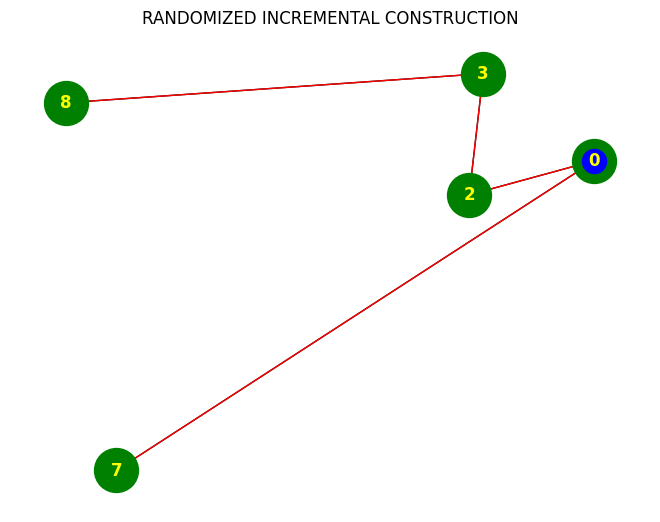

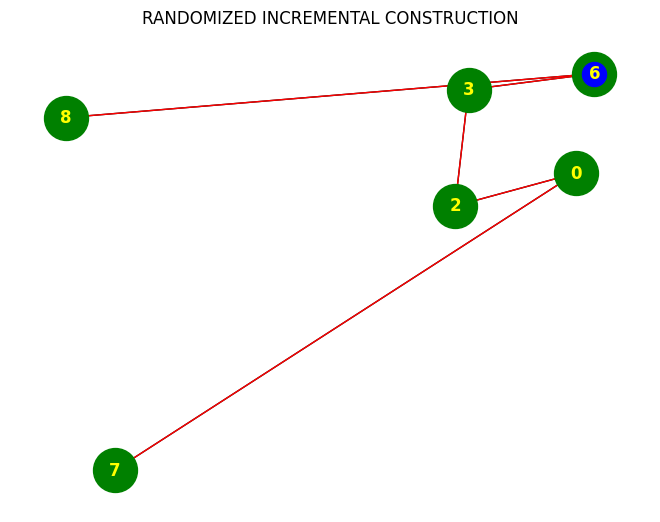

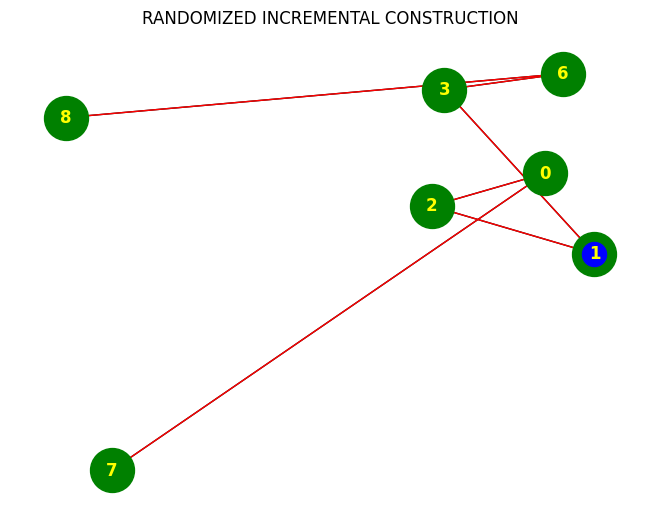

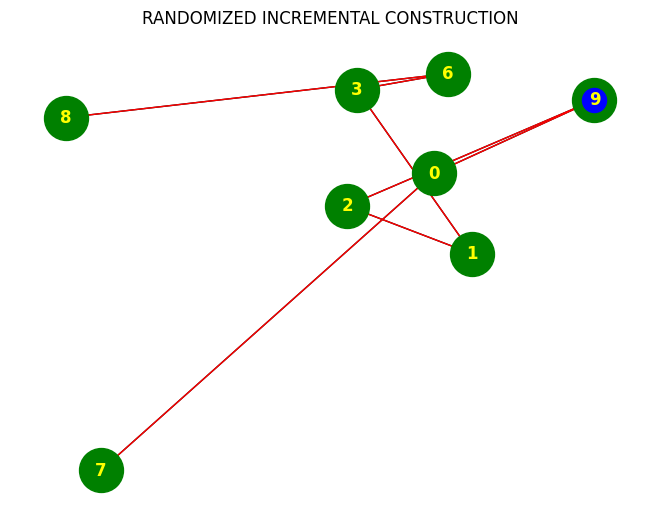

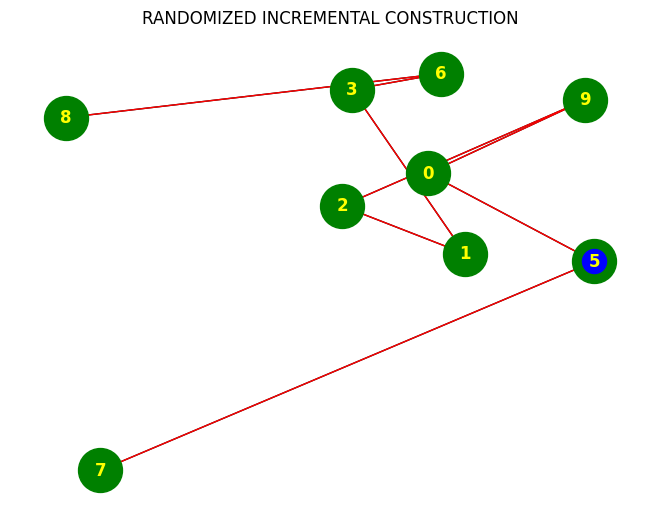

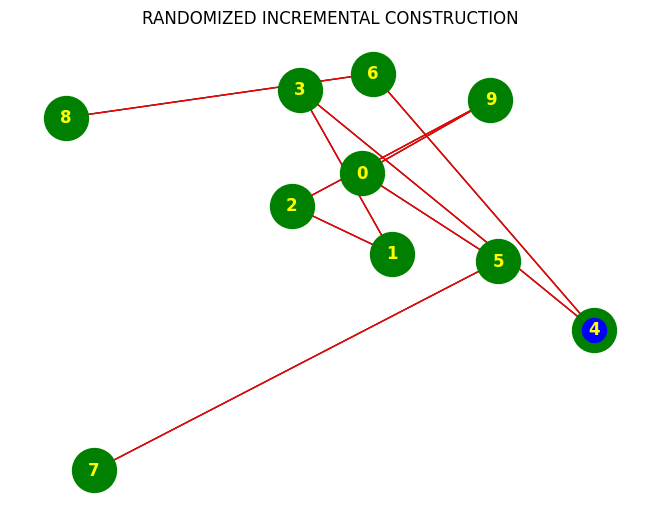

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else 2
def plot_convex_hull(G, pos, hull_edges, current_point):
    plt.clf()
    nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000, node_color="green", font_color="yellow", font_weight="bold")
    nx.draw_networkx_edges(G, pos, edgelist=hull_edges, edge_color='red')
    nx.draw_networkx_nodes(G, pos, nodelist=[current_point], node_color='blue')
    plt.title('RANDOMIZED INCREMENTAL CONSTRUCTION')
    plt.pause(0.5)
def randomized_incremental_construction(points):
    G = nx.Graph()
    pos = {i: points[i] for i in range(len(points))}
    hull_edges = []
    sorted_indices = sorted(range(len(points)), key=lambda i: points[i][0])
    G.add_edge(sorted_indices[0], sorted_indices[1])
    G.add_edge(sorted_indices[1], sorted_indices[0])
    hull_edges.append((sorted_indices[0], sorted_indices[1]))
    for i in range(2, len(points)):
        current_point = sorted_indices[i]
        for j in range(len(hull_edges)):
            edge_start, edge_end = hull_edges[j]
            if orientation(points[edge_start], points[edge_end], points[current_point]) == 2:
                G.remove_edge(edge_start, edge_end)
                G.add_edge(edge_start, current_point)
                G.add_edge(current_point, edge_end)
                hull_edges.pop(j)
                hull_edges.append((edge_start, current_point))
                hull_edges.append((current_point, edge_end))
                break
        plot_convex_hull(G, pos, hull_edges, current_point)
    plt.show()
if __name__ == "__main__":
    np.random.seed(0)
    points = np.random.rand(10, 2)
    randomized_incremental_construction(points)

**Range Counting using Fractional Cascading**

In [ ]:
class Node:
    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None
class FractionalCascading:
    def __init__(self, data):
        self.root = self.build_tree(sorted(data))
    def build_tree(self, sorted_data):
        if not sorted_data:
            return None
        mid = len(sorted_data) // 2
        root = Node(sorted_data[mid])
        root.left = self.build_tree(sorted_data[:mid])
        root.right = self.build_tree(sorted_data[mid + 1:])
        return root
    def count_elements_in_range(self, root, start, end):
        if not root:
            return 0
        if end < root.value:
            return self.count_elements_in_range(root.left, start, end)
        if start > root.value:
            return self.count_elements_in_range(root.right, start, end)
        return (
            1
            + self.count_elements_in_range(root.left, start, root.value - 1)
            + self.count_elements_in_range(root.right, root.value + 1, end)
        )
if __name__ == "__main__":
    data = [1, 3, 5, 7, 9, 2, 4, 6, 8, 10]
    fc_tree = FractionalCascading(data)
    print(fc_tree.count_elements_in_range(fc_tree.root, 3, 8))
    print(fc_tree.count_elements_in_range(fc_tree.root, 1, 5))
    print(fc_tree.count_elements_in_range(fc_tree.root, 6, 10))

6
5
5


<ipython-input-28-46c967f2b31a>:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([parent[0], x], [parent[1], y], 'k-', color='green')


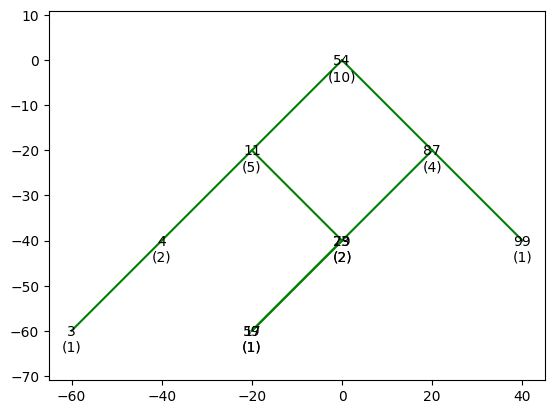

Number of elements in the range [30, 70] = 7


In [ ]:
import matplotlib.pyplot as plt
from random import sample
class Node:
    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None
        self.count = 0
class FractionalCascading:
    def __init__(self, data):
        self.root = self.build_tree(sorted(data))
    def build_tree(self, sorted_data):
        if not sorted_data:
            return None
        mid = len(sorted_data) // 2
        root = Node(sorted_data[mid])
        root.left = self.build_tree(sorted_data[:mid])
        root.right = self.build_tree(sorted_data[mid + 1:])
        root.count = 1 + (root.left.count if root.left else 0) + (root.right.count if root.right else 0)
        return root
    def count_elements_in_range(self, root, start, end):
        if not root:
            return 0
        if end < root.value:
            return self.count_elements_in_range(root.left, start, end)
        if start > root.value:
            return self.count_elements_in_range(root.right, start, end)
        return (
            root.count
            - (root.right.count if root.right else 0)
            + self.count_elements_in_range(root.left, start, root.value - 1)
            + self.count_elements_in_range(root.right, root.value + 1, end)
        )
def visualize_tree(tree, ax, x, y, parent=None):
    if tree:
        ax.annotate(f"{tree.value}\n({tree.count})", (x, y), textcoords="offset points", xytext=(0, -15), ha='center')
        if parent is not None:
            ax.plot([parent[0], x], [parent[1], y], 'k-', color='green')
        visualize_tree(tree.left, ax, x - 20, y - 20, (x, y))
        visualize_tree(tree.right, ax, x + 20, y - 20, (x, y))
def main():
    data = sample(range(1, 100), 10)
    fc_tree = FractionalCascading(data)
    fig, ax = plt.subplots()
    visualize_tree(fc_tree.root, ax, x=0, y=0)
    ax.set_aspect('equal', adjustable='datalim')
    plt.show()
    start_range, end_range = 30, 70
    count_in_range = fc_tree.count_elements_in_range(fc_tree.root, start_range, end_range)
    print(f"Number of elements in the range [{start_range}, {end_range}] = {count_in_range}")
if __name__ == "__main__":
    main()

**Red Black Tree**

Inorder Traversal:
[5, 10, 15, 20, 25, 30]

Preorder Traversal:
[15, 5, 10, 25, 20, 30]

Postorder Traversal:
[10, 5, 20, 30, 25, 15]

Visualizing Red-Black Tree:


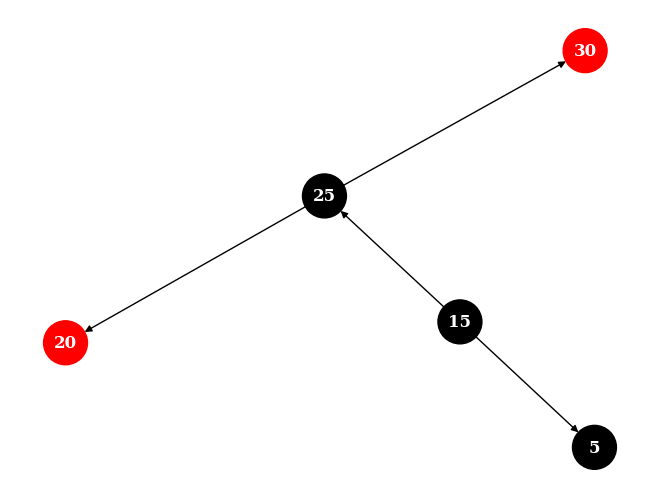

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class Node:
    def __init__(self, key, color, left, right, parent):
        self.key = key
        self.color = color
        self.left = left
        self.right = right
        self.parent = parent
class RedBlackTree:
    def __init__(self):
        self.NIL = Node(None, 'BLACK', None, None, None)
        self.root = self.NIL
    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y
    def right_rotate(self, y):
        x = y.left
        y.left = x.right
        if x.right != self.NIL:
            x.right.parent = y
        x.parent = y.parent
        if y.parent is None:
            self.root = x
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x
        x.right = y
        y.parent = x
    def insert(self, key):
        z = Node(key, 'RED', self.NIL, self.NIL, None)
        y = None
        x = self.root
        while x != self.NIL:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        z.parent = y
        if y is None:
            self.root = z
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
        if z.parent is None:
            z.color = 'BLACK'
            return
        self._insert_fixup(z)
    def _insert_fixup(self, z):
        while z.parent and z.parent.color == 'RED':
            if z.parent == z.parent.parent.left:
                y = z.parent.parent.right
                if y and y.color == 'RED':
                    z.parent.color = 'BLACK'
                    y.color = 'BLACK'
                    z.parent.parent.color = 'RED'
                    z = z.parent.parent
                else:
                    if z == z.parent.right:
                        z = z.parent
                        self.left_rotate(z)
                    if z.parent:
                        z.parent.color = 'BLACK'
                    if z.parent.parent:
                        z.parent.parent.color = 'RED'
                    if z.parent.parent:
                        self.right_rotate(z.parent.parent)
            else:
                y = z.parent.parent.left
                if y and y.color == 'RED':
                    z.parent.color = 'BLACK'
                    y.color = 'BLACK'
                    z.parent.parent.color = 'RED'
                    z = z.parent.parent
                else:
                    if z == z.parent.left:
                        z = z.parent
                        self.right_rotate(z)
                    if z.parent:
                        z.parent.color = 'BLACK'
                    if z.parent.parent:
                        z.parent.parent.color = 'RED'
                    if z.parent.parent:
                        self.left_rotate(z.parent.parent)
        self.root.color = 'BLACK'
    def inorder_traversal(self, node, result):
        if node != self.NIL:
            self.inorder_traversal(node.left, result)
            result.append(node.key)
            self.inorder_traversal(node.right, result)
    def preorder_traversal(self, node, result):
        if node != self.NIL:
            result.append(node.key)
            self.preorder_traversal(node.left, result)
            self.preorder_traversal(node.right, result)
    def postorder_traversal(self, node, result):
        if node != self.NIL:
            self.postorder_traversal(node.left, result)
            self.postorder_traversal(node.right, result)
            result.append(node.key)
    def visualize_tree(self):
      G = nx.DiGraph()
      queue = [self.root]
      while queue:
        current_node = queue.pop(0)
        if current_node != self.NIL:
          G.add_node(current_node.key, color=current_node.color)
          if current_node.left and current_node.left != self.NIL:
            G.add_edge(current_node.key, current_node.left.key)
            queue.append(current_node.left)
            if current_node.right and current_node.right != self.NIL:
              G.add_edge(current_node.key, current_node.right.key)
              queue.append(current_node.right)
      pos = nx.spring_layout(G)
      colors = [G.nodes[n]['color'] for n in G.nodes]
      nx.draw(G, pos, with_labels=True, node_size=1000, node_color=colors, font_color="white", font_weight="bold",font_family="serif")
      plt.show()
def main():
    keys = [15, 25, 5, 10, 20, 30]
    rb_tree = RedBlackTree()
    for key in keys:
        rb_tree.insert(key)
    print("Inorder Traversal:")
    inorder_result = []
    rb_tree.inorder_traversal(rb_tree.root, inorder_result)
    print(inorder_result)

    print("\nPreorder Traversal:")
    preorder_result = []
    rb_tree.preorder_traversal(rb_tree.root, preorder_result)
    print(preorder_result)
    print("\nPostorder Traversal:")
    postorder_result = []
    rb_tree.postorder_traversal(rb_tree.root, postorder_result)
    print(postorder_result)
    print("\nVisualizing Red-Black Tree:")
    rb_tree.visualize_tree()
if __name__ == "__main__":
    main()

**Rolling Hash**

In [ ]:
class RollingHash:
    def __init__(self, s, base=256, prime=101):
        self.base = base
        self.prime = prime
        self.hash_value = 0
        self.length = 0
        for char in s:
            self.append(char)
    def append(self, char):
        self.hash_value = (self.hash_value * self.base + ord(char)) % self.prime
        self.length += 1
    def skip(self, char):
        first_char = ord(char) * (self.base ** (self.length - 1)) % self.prime
        self.hash_value = (self.base * (self.hash_value - first_char) + ord(char)) % self.prime
    def get_hash(self):
        return self.hash_value
text = "honorificabilitudinitatibus"
pattern = "cab"
rolling_hash = RollingHash(pattern)
for char in text[:len(pattern)]:
    rolling_hash.append(char)
print("Hash of pattern =", rolling_hash.get_hash())
for i in range(len(pattern), len(text)):
    rolling_hash.skip(text[i - len(pattern)])
    rolling_hash.append(text[i])
    print(f"Hash after appending {text[i]} =", rolling_hash.get_hash())

Hash of pattern = 50
Hash after appending o = 17
Hash after appending r = 47
Hash after appending i = 67
Hash after appending f = 42
Hash after appending i = 75
Hash after appending c = 72
Hash after appending a = 7
Hash after appending b = 100
Hash after appending i = 99
Hash after appending l = 36
Hash after appending i = 12
Hash after appending t = 94
Hash after appending u = 8
Hash after appending d = 66
Hash after appending i = 85
Hash after appending n = 88
Hash after appending i = 49
Hash after appending t = 69
Hash after appending a = 81
Hash after appending t = 73
Hash after appending i = 60
Hash after appending b = 31
Hash after appending u = 9
Hash after appending s = 70


In [ ]:
class RollingHash:
    def __init__(self, s, base=256, prime=101):
        self.base = base
        self.prime = prime
        self.hash_values = [0]
        self.chars = ['']
        self.terms = [0]
        self.polynomials = []
        for char in s:
            self.append(char)
    def append(self, char):
        prev_hash = self.hash_values[-1]
        new_term = (prev_hash * self.base) % self.prime
        new_hash = (new_term + ord(char)) % self.prime
        self.hash_values.append(new_hash)
        self.terms.append(new_term)
        self.chars.append(char)
        self.polynomials.append(self.get_polynomial())
    def get_polynomial(self):
        terms = [f"{self.terms[i]} * {self.chars[i]}" for i in range(len(self.terms))]
        return ' + '.join(terms)
    def skip(self):
        self.hash_values.pop(0)
        self.chars.pop(0)
        self.terms.pop(0)
        self.polynomials.pop(0)
    def get_hash_values(self):
        return self.hash_values
def visualize_rolling_hash(word, pattern):
    rolling_hash = RollingHash(word)
    hash_values = rolling_hash.get_hash_values()
    print(f"Hash of pattern '{pattern}' = {hash_values[0]}")
    for i, char in enumerate(word):
        rolling_hash.append(char)
        hash_values = rolling_hash.get_hash_values()
        print(f"Hash after appending {char} = {hash_values[-1]}")
file_path = '/content/dataset.txt'
with open(file_path, 'r') as file:
    words = file.read().splitlines()
for word in words:
    visualize_rolling_hash(word, "io")
    visualize_rolling_hash(word, "ia")

Hash of pattern 'io' = 0
Hash after appending F = 71
Hash after appending l = 3
Hash after appending o = 71
Hash after appending c = 95
Hash after appending c = 78
Hash after appending i = 75
Hash after appending n = 19
Hash after appending a = 12
Hash after appending u = 58
Hash after appending c = 100
Hash after appending i = 51
Hash after appending n = 36
Hash after appending i = 29
Hash after appending h = 54
Hash after appending i = 92
Hash after appending l = 26
Hash after appending i = 95
Hash after appending p = 91
Hash after appending i = 70
Hash after appending l = 50
Hash after appending i = 78
Hash after appending f = 72
Hash after appending i = 54
Hash after appending c = 86
Hash after appending a = 95
Hash after appending t = 95
Hash after appending i = 84
Hash after appending o = 1
Hash after appending n = 63
Hash of pattern 'ia' = 0
Hash after appending F = 71
Hash after appending l = 3
Hash after appending o = 71
Hash after appending c = 95
Hash after appending c = 78


**Rope**

In [ ]:
class RopeNode:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
        self.weight = len(value)
def create_rope(string):
    if not string:
        return None
    return _create_rope(string, 0, len(string) - 1)
def _create_rope(string, start, end):
    if start == end:
        return RopeNode(string[start])
    mid = (start + end) // 2
    left = _create_rope(string, start, mid)
    right = _create_rope(string, mid + 1, end)
    return RopeNode(left.value + right.value, left, right)
def concat(rope1, rope2):
    if not rope1:
        return rope2
    if not rope2:
        return rope1
    return RopeNode(rope1.value + rope2.value, rope1, rope2)
def split(rope, index):
    if not rope:
        return None, None
    if index == 0:
        return None, rope
    if index < rope.left.weight:
        left, right = split(rope.left, index)
        return left, concat(right, rope.right)
    else:
        left, right = split(rope.right, index - rope.left.weight)
        return concat(rope.left, left), right
def insert(rope, index, insert_string):
    left, right = split(rope, index)
    insert_rope = create_rope(insert_string)
    return concat(left, concat(insert_rope, right))
def delete(rope, start, end):
    left, mid_right = split(rope, start)
    mid, right = split(mid_right, end - start)
    return concat(left, right)
def index(rope, i):
    if not rope:
        return None
    if i < rope.left.weight:
        return index(rope.left, i)
    elif i >= rope.left.weight and i < rope.left.weight + len(rope.value):
        return rope.value[i - rope.left.weight]
    else:
        return index(rope.right, i - rope.left.weight - len(rope.value))
def print_rope(rope):
    if rope:
        print_rope(rope.left)
        print(rope.value, end='')
        print_rope(rope.right)
string = "Hello, World!"
rope = create_rope(string)
print("ORIGINAL ROPE:")
print_rope(rope)
index_to_split = 7
left, right = split(rope, index_to_split)
print(f"\n\nAFTER SPLITTING AT INDEX {index_to_split}:")
print_rope(left)
print_rope(right)
insert_index = 7
insert_string = " Amazing"
rope = insert(rope, insert_index, insert_string)
print(f"\n\nAFTER INSERTING '{insert_string}' AT INDEX {insert_index}:")
print_rope(rope)
delete_start, delete_end = 7, 16
rope = delete(rope, delete_start, delete_end)
print(f"\n\nAFTER DELETING FROM INDEX {delete_start} TO {delete_end}:")
print_rope(rope)
index_to_access = 9
print(f"\n\nCHARACTER AT INDEX {index_to_access} = {index(rope, index_to_access)}")

ORIGINAL ROPE:
HHeeHellllllHello, oo,,o,  Hello, World!WWooWorrWorld!llddld!!

AFTER SPLITTING AT INDEX 7:
HHeeHellllllHello, oo,,o,  WWooWorrWorld!llddld!!

AFTER INSERTING ' Amazing' AT INDEX 7:
HHeeHellllllHello, oo,,o,  Hello,  AmazingWorld!  AA Amammaa Amazingzziizingnngg AmazingWorld!WWooWorrWorld!llddld!!

AFTER DELETING FROM INDEX 7 TO 16:
HHeeHellllllHello, oo,,o,  Hello, orld!oorrorld!llddld!!

CHARACTER AT INDEX 9 = l


**Scapegoat Tree**

Scapegoat Tree:


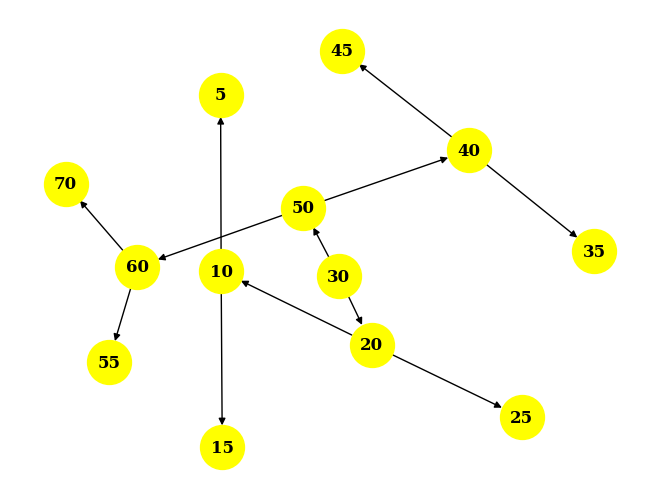

In [ ]:
import random
class ScapegoatNode:
    def __init__(self, key, parent=None, left=None, right=None):
        self.key = key
        self.parent = parent
        self.left = left
        self.right = right
class ScapegoatTree:
    def __init__(self, alpha=0.75):
        self.root = None
        self.alpha = alpha
    def _size(self, node):
        if not node:
            return 0
        return 1 + self._size(node.left) + self._size(node.right)
    def _sorted_nodes(self, node):
        if not node:
            return []
        return self._sorted_nodes(node.left) + [node] + self._sorted_nodes(node.right)
    def _build_tree(self, nodes, start, end):
        if start > end:
            return None
        mid = (start + end) // 2
        node = nodes[mid]
        node.left = self._build_tree(nodes, start, mid - 1)
        if node.left:
            node.left.parent = node
        node.right = self._build_tree(nodes, mid + 1, end)
        if node.right:
            node.right.parent = node
        return node
    def _is_balanced(self, node):
        if not node:
            return True
        left_size = self._size(node.left)
        right_size = self._size(node.right)
        return left_size <= self.alpha * (left_size + right_size) and \
               right_size <= self.alpha * (left_size + right_size)
    def _find_scapegoat(self, node):
        while node:
            if not self._is_balanced(node):
                return node
            node = node.parent
        return None
    def _rebuild(self, node):
        if not node:
            return
        subtree_size = self._size(node)
        parent = node.parent
        sorted_nodes = self._sorted_nodes(node)
        new_subtree = self._build_tree(sorted_nodes, 0, subtree_size - 1)
        if not parent:
            self.root = new_subtree
            if new_subtree:
                new_subtree.parent = None
        elif parent.left == node:
            parent.left = new_subtree
            if new_subtree:
                new_subtree.parent = parent
        else:
            parent.right = new_subtree
            if new_subtree:
                new_subtree.parent = parent
    def _insert(self, node, key):
        if not node:
            return ScapegoatNode(key)
        if key < node.key:
            node.left = self._insert(node.left, key)
            node.left.parent = node
        elif key > node.key:
            node.right = self._insert(node.right, key)
            node.right.parent = node
        return node
    def insert(self, key):
        self.root = self._insert(self.root, key)
        scapegoat = self._find_scapegoat(self.root)
        if scapegoat:
            self._rebuild(scapegoat)
    def visualize_tree(self):
        import networkx as nx
        import matplotlib.pyplot as plt
        def add_nodes_edges(graph, node):
            if node:
                graph.add_node(node.key)
                if node.left:
                    graph.add_edge(node.key, node.left.key)
                    add_nodes_edges(graph, node.left)
                if node.right:
                    graph.add_edge(node.key, node.right.key)
                    add_nodes_edges(graph, node.right)
        G = nx.DiGraph()
        add_nodes_edges(G, self.root)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='yellow', font_size=12, font_family='serif')
        plt.show()
if __name__ == "__main__":
    keys = [30, 20, 50, 10, 25, 40, 60, 5, 15, 35, 45, 55, 70]
    rb_tree = ScapegoatTree()
    for key in keys:
        rb_tree.insert(key)
    print("Scapegoat Tree:")
    rb_tree.visualize_tree()

**Segment Tree**

In [ ]:
class SegmentTree:
    def __init__(self, arr):
        self.arr = arr
        self.size = len(arr)
        self.tree = [0] * (4 * self.size)
        self.build_tree(1, 0, self.size - 1)
    def build_tree(self, node, start, end):
        if start == end:
            self.tree[node] = self.arr[start]
        else:
            mid = (start + end) // 2
            left_child = 2 * node
            right_child = 2 * node + 1
            self.build_tree(left_child, start, mid)
            self.build_tree(right_child, mid + 1, end)
            self.tree[node] = self.tree[left_child] + self.tree[right_child]
    def update(self, index, value):
        self._update(1, 0, self.size - 1, index, value)
    def _update(self, node, start, end, index, value):
        if start == end:
            self.arr[index] = value
            self.tree[node] = value
        else:
            mid = (start + end) // 2
            left_child = 2 * node
            right_child = 2 * node + 1
            if start <= index <= mid:
                self._update(left_child, start, mid, index, value)
            else:
                self._update(right_child, mid + 1, end, index, value)
            self.tree[node] = self.tree[left_child] + self.tree[right_child]
    def query(self, left, right):
        return self._query(1, 0, self.size - 1, left, right)
    def _query(self, node, start, end, left, right):
        if right < start or left > end:
            return 0
        elif left <= start and right >= end:
            return self.tree[node]
        else:
            mid = (start + end) // 2
            left_child = 2 * node
            right_child = 2 * node + 1
            left_sum = self._query(left_child, start, mid, left, right)
            right_sum = self._query(right_child, mid + 1, end, left, right)
            return left_sum + right_sum
arr = [1, 3, 5, 7, 9, 11]
seg_tree = SegmentTree(arr)
print("Original Array =", arr)
print("\nSegment Tree Array =", seg_tree.tree)
seg_tree.update(2, 10)
print("\nUpdated Array =", seg_tree.arr)
print("\nUpdated Segment Tree Array =", seg_tree.tree)
result = seg_tree.query(1, 4)
print("\nSum of elements in range [1, 4] =", result)

Original Array = [1, 3, 5, 7, 9, 11]

Segment Tree Array = [0, 36, 9, 27, 4, 5, 16, 11, 1, 3, 0, 0, 7, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Updated Array = [1, 3, 10, 7, 9, 11]

Updated Segment Tree Array = [0, 41, 14, 27, 4, 10, 16, 11, 1, 3, 0, 0, 7, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Sum of elements in range [1, 4] = 29


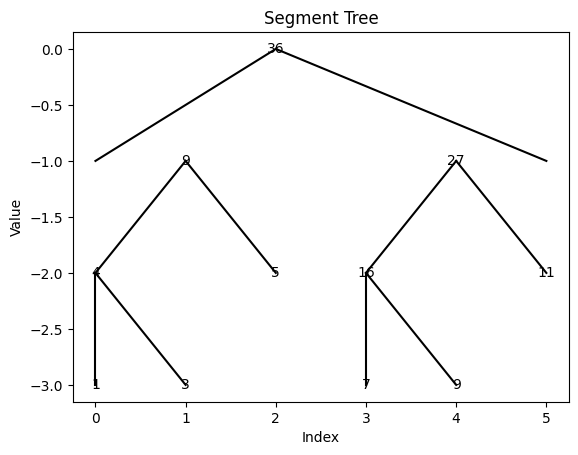

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
class SegmentTreeVisualization:
    def __init__(self, arr):
        self.arr = arr
        self.size = len(arr)
        self.tree = [0] * (4 * self.size)
        self.x_positions = [i for i in range(self.size)]
        self.build_tree(1, 0, self.size - 1)
    def build_tree(self, node, start, end):
        if start == end:
            self.tree[node] = self.arr[start]
        else:
            mid = (start + end) // 2
            left_child = 2 * node
            right_child = 2 * node + 1
            self.build_tree(left_child, start, mid)
            self.build_tree(right_child, mid + 1, end)
            self.tree[node] = self.tree[left_child] + self.tree[right_child]
    def visualize_tree(self):
        fig, ax = plt.subplots()
        self._plot_tree(ax, 1, 0, self.size - 1, 0)
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.title("Segment Tree")
        plt.show()
    def _plot_tree(self, ax, node, start, end, depth):
        if start == end:
            ax.text(self.x_positions[start], -depth, str(self.tree[node]), ha='center', va='center')
        else:
            mid = (start + end) // 2
            left_child = 2 * node
            right_child = 2 * node + 1
            self._plot_tree(ax, left_child, start, mid, depth + 1)
            self._plot_tree(ax, right_child, mid + 1, end, depth + 1)
            ax.text(self.x_positions[mid], -depth, str(self.tree[node]), ha='center', va='center')
            ax.plot([self.x_positions[mid], self.x_positions[start]], [-depth, -depth - 1], 'k-')
            ax.plot([self.x_positions[mid], self.x_positions[end]], [-depth, -depth - 1], 'k-')
arr = [1, 3, 5, 7, 9, 11]
seg_tree_vis = SegmentTreeVisualization(arr)
seg_tree_vis.visualize_tree()

In [ ]:
!pip install graphviz

In [ ]:
import graphviz
class SegmentTreeVisualization:
    def __init__(self, arr):
        self.arr = arr
        self.size = len(arr)
        self.tree = [0] * (4 * self.size)
        self.dot = graphviz.Digraph(comment='Segment Tree')
        self.build_tree(1, 0, self.size - 1)
    def build_tree(self, node, start, end):
        if start == end:
            self.tree[node] = self.arr[start]
            self.dot.node(str(node), label=str(self.tree[node]))
        else:
            mid = (start + end) // 2
            left_child = 2 * node
            right_child = 2 * node + 1
            self.build_tree(left_child, start, mid)
            self.build_tree(right_child, mid + 1, end)
            self.tree[node] = self.tree[left_child] + self.tree[right_child]
            self.dot.node(str(node), label=str(self.tree[node]))
            self.dot.edge(str(node), str(left_child))
            self.dot.edge(str(node), str(right_child))
    def visualize_tree(self):
        self.dot.render('segment_tree', format='png', cleanup=True)
        print("segment_tree.png")
arr = [1, 3, 5, 7, 9, 11]
seg_tree_vis = SegmentTreeVisualization(arr)
seg_tree_vis.visualize_tree()

segment_tree.png


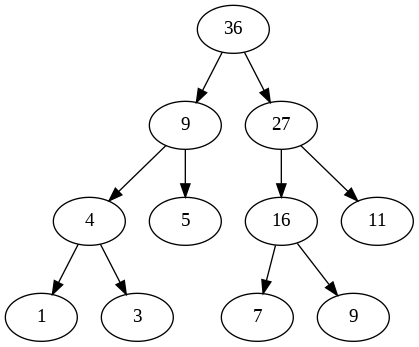

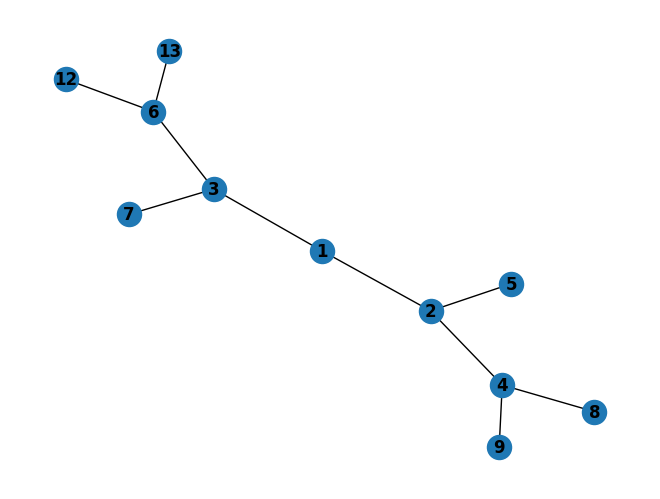

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class SegmentTreeVisualization:
    def __init__(self, arr):
        self.arr = arr
        self.size = len(arr)
        self.tree = [0] * (4 * self.size)
        self.G = nx.Graph()
        self.build_tree(1, 0, self.size - 1)
    def build_tree(self, node, start, end):
        if start == end:
            self.tree[node] = self.arr[start]
            self.G.add_node(node, label=str(self.tree[node]))
        else:
            mid = (start + end) // 2
            left_child = 2 * node
            right_child = 2 * node + 1
            self.build_tree(left_child, start, mid)
            self.build_tree(right_child, mid + 1, end)
            self.tree[node] = self.tree[left_child] + self.tree[right_child]
            self.G.add_node(node, label=str(self.tree[node]))
            self.G.add_edge(node, left_child)
            self.G.add_edge(node, right_child)
    def visualize_tree(self):
        pos = nx.spring_layout(self.G)
        labels = nx.get_edge_attributes(self.G, 'label')
        nx.draw(self.G, pos, with_labels=True, font_weight='bold')
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()
arr = [1, 3, 5, 7, 9, 11]
seg_tree_vis = SegmentTreeVisualization(arr)
seg_tree_vis.visualize_tree()

**Self Balancing Cartesian Tree**

In [ ]:
import random
class Node:
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.left = None
        self.right = None
def split(root, key):
    if root is None:
        return None, None
    if root.key <= key:
        left, right_split = split(root.right, key)
        root.right = left
        return root, right_split
    else:
        left_split, right = split(root.left, key)
        root.left = right
        return left_split, root
def merge(left, right):
    if left is None:
        return right
    if right is None:
        return left
    if left.priority > right.priority:
        left.right = merge(left.right, right)
        return left
    else:
        right.left = merge(left, right.left)
        return right
def insert(root, key, priority):
    new_node = Node(key, priority)
    left, right = split(root, key)
    return merge(merge(left, new_node), right)
def delete(root, key):
    left, right = split(root, key - 1)
    _, right = split(right, key)
    return merge(left, right)
def search(root, key):
    if root is None or root.key == key:
        return root
    if root.key < key:
        return search(root.right, key)
    return search(root.left, key)
def range_query(root, low, high):
    _, right_split = split(root, low - 1)
    left_split, _ = split(right_split, high)
    return left_split
def find_min(root):
    while root.left:
        root = root.left
    return root
def find_max(root):
    while root.right:
        root = root.right
    return root
def inorder_traversal(root):
    if root:
        inorder_traversal(root.left)
        print(root.key, end=' ')
        inorder_traversal(root.right)
def reverse_inorder_traversal(root):
    if root:
        reverse_inorder_traversal(root.right)
        print(root.key, end=' ')
        reverse_inorder_traversal(root.left)
def level_order_traversal(root):
    if not root:
        return
    queue = [root]
    while queue:
        node = queue.pop(0)
        print(node.key, end=' ')
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
root = None
keys = [3, 10, 5, 2, 8]
for key in keys:
    root = insert(root, key, priority=random.randint(1, 100))
print("Inorder Traversal:")
inorder_traversal(root)
print("\nReverse Inorder Traversal:")
reverse_inorder_traversal(root)
print("\nLevel Order Traversal:")
level_order_traversal(root)
print("\nMinimum Key:", find_min(root).key)
print("Maximum Key:", find_max(root).key)
search_result = search(root, 5)
print("\nSearch Result for key 5:", search_result.key if search_result else "Not Found")
range_query_result = range_query(root, 3, 8)

Inorder Traversal:
2 3 5 8 10 
Reverse Inorder Traversal:
10 8 5 3 2 
Level Order Traversal:
2 3 5 8 10 
Minimum Key: 2
Maximum Key: 10

Search Result for key 5: 5


**Shor Algortihm**

In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from math import gcd
from fractions import Fraction
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
def c_amod15_basic(a, power):
    U = QuantumCircuit(5)
    for q in range(4):
        U.append(c_U_gate(a, 2**q), [q] + [i + 4 for i in range(4)])
    U = U.to_gate()
    U.name = f"cU^{a} mod 15"
    c_U = U.control()
    return c_U
def c_amod15(a, power):
    U = QuantumCircuit(5)
    for i in range(power):
        U.append(c_amod15_basic(a, i), range(5))
    U = U.to_gate()
    U.name = f"cU^{a} mod 15"
    c_U = U.control()
    return c_U
def c_U_gate(a, power):
    U = QuantumCircuit(5)
    angle = power * np.pi / 8
    U.u(angle, 0, 0)
    U.cx(0, 1)
    U.u(-angle, 1, 0)
    U.cx(0, 2)
    U.u(angle, 2, 0)
    U.cx(0, 3)
    U.u(-angle, 3, 0)
    U = U.to_gate()
    U.name = f"cU^{a} mod 15"
    return U
def shor_algorithm(N, a, n_count):
    if a not in [2, 7, 8, 11, 13]:
        raise ValueError("'a' must be 2, 7, 8, 11, or 13 in this implementation")
    fractions = []
    for s in range(2, 100):
        frac = Fraction(s / (2 ** n_count)).limit_denominator(N)
        if frac.denominator % 2 != 0:
            fractions.append(frac)
    return fractions
N = 15
a = 7
n_count = 8
fractions = shor_algorithm(N, a, n_count)
print(fractions)

[Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(0, 1), Fraction(1, 15), Fraction(1, 15), Fraction(1, 15), Fraction(1, 15), Fraction(1, 15), Fraction(1, 15), Fraction(1, 15), Fraction(1, 15), Fraction(1, 15), Fraction(1, 13), Fraction(1, 13), Fraction(1, 11), Fraction(1, 11), Fraction(1, 9), Fraction(1, 9), Fraction(1, 9), Fraction(2, 15), Fraction(2, 15), Fraction(1, 7), Fraction(1, 7), Fraction(2, 13), Fraction(2, 13), Fraction(2, 13), Fraction(2, 13), Fraction(2, 11), Fraction(2, 11), Fraction(2, 11), Fraction(2, 11), Fraction(1, 5), Fraction(1, 5), Fraction(1, 5), Fraction(1, 5), Fraction(1, 5), Fraction(2, 9), Fraction(2, 9), Fraction(3, 13), Fraction(3, 13), Fraction(3, 13), Fraction(3, 13), Fraction(4, 15), Fraction(4, 15), Fraction(4, 15), Fraction(3, 11), Fraction(3, 11), Fraction(2, 7), Fraction(2, 7), Fraction(2, 7), Fraction(4, 13), Fraction(4, 13), Fraction(4, 13), Fraction(4, 13), Fraction(4, 13), Fraction(1, 3), Fr

In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from math import gcd
from fractions import Fraction
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
def c_amod15_basic(a, power):
    U = QuantumCircuit(5)
    for q in range(4):
        U.append(c_U_gate(a, 2**q), [q] + [i + 4 for i in range(4)])
    U = U.to_gate()
    U.name = f"cU^{a} mod 15"
    c_U = U.control()
    return c_U
def c_amod15(a, power):
    U = QuantumCircuit(5)
    for i in range(power):
        U.append(c_amod15_basic(a, i), range(5))
    U = U.to_gate()
    U.name = f"cU^{a} mod 15"
    c_U = U.control()
    return c_U
def c_U_gate(a, power):
    U = QuantumCircuit(5)
    angle = power * np.pi / 8
    U.u(angle, 0, 0)
    U.cx(0, 1)
    U.u(-angle, 1, 0)
    U.cx(0, 2)
    U.u(angle, 2, 0)
    U.cx(0, 3)
    U.u(-angle, 3, 0)
    U = U.to_gate()
    U.name = f"cU^{a} mod 15"
    return U
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4 + n_count, n_count)
    qc.h(range(n_count))
    qc.x(3 + n_count)
    for q in range(n_count):
        qc.append(c_amod15(a, 2**q), [q] + [i + n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count))
    qc.measure(range(n_count), range(n_count))
    aer_sim = Aer.get_backend('aer_simulator')
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc, shots=1)
    result = aer_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    frac = int(readings[0], 2) / (2 ** n_count)
    return frac
def shor_algorithm(n, a):
    if gcd(a, n) > 1:
        return gcd(a, n)
    r = find_order(a, n)
    if r % 2 == 0:
        candidate = pow(a, r // 2, n)
        if candidate not in {1, n - 1}:
            return gcd(candidate + 1, n), gcd(candidate - 1, n)
    return None
def find_order(a, n):
    for i in range(2, 100):
        frac = Fraction(i / 2**8).limit_denominator(n)
        if frac.denominator % 2 != 0:
            s = frac.numerator
            if s != 0:
                order = 0
                while True:
                    order += 1
                    if pow(a, order, n) == 1:
                        break
                if order % s == 0:
                    return order
def shor_algorithm_graphics(N):
    possible_a_values = [2, 7, 8, 11, 13]
    factors_found = []
    for a in possible_a_values:
        print(f"Attempt for a = {a}")
        factors = shor_algorithm(N, a)
        if factors:
            print(f"Non-trivial factor found: {factors}")
            factors_found.append(factors)
    return factors_found
N = 15
factors = shor_algorithm_graphics(N)
print("\nFactors =", factors)

Attempt for a = 2
Non-trivial factor found: (5, 3)
Attempt for a = 7
Non-trivial factor found: (5, 3)
Attempt for a = 8
Non-trivial factor found: (5, 3)
Attempt for a = 11
Non-trivial factor found: (3, 5)
Attempt for a = 13
Non-trivial factor found: (5, 3)

Factors = [(5, 3), (5, 3), (5, 3), (3, 5), (5, 3)]


**Skip List with Reverse Pointer**

In [ ]:
import random
class Node:
    def __init__(self, key, level):
        self.key = key
        self.forward = [None] * (level + 1)
        self.backward = None
class SkipList:
    def __init__(self, max_level):
        self.max_level = max_level
        self.header = self.create_node(float('-inf'), max_level)
        self.current_max_level = 0
    def create_node(self, key, level):
        new_node = Node(key, level)
        return new_node
    def random_level(self):
        level = 0
        while random.random() < 0.5 and level < self.max_level:
            level += 1
        return level
    def insert(self, key):
        update = [None] * (self.max_level + 1)
        current = self.header
        for i in range(self.current_max_level, -1, -1):
            while current.forward[i] and current.forward[i].key < key:
                current = current.forward[i]
            update[i] = current
        new_level = self.random_level()
        if new_level > self.current_max_level:
            for i in range(self.current_max_level + 1, new_level + 1):
                update[i] = self.header
            self.current_max_level = new_level
        new_node = self.create_node(key, new_level)
        for i in range(new_level + 1):
            new_node.forward[i] = update[i].forward[i]
            if update[i].forward[i]:
                update[i].forward[i].backward = new_node
            update[i].forward[i] = new_node
            new_node.backward = update[0]
    def delete(self, key):
        update = [None] * (self.max_level + 1)
        current = self.header
        for i in range(self.current_max_level, -1, -1):
            while current.forward[i] and current.forward[i].key < key:
                current = current.forward[i]
            update[i] = current
        current = current.forward[0]
        if current and current.key == key:
            for i in range(self.current_max_level + 1):
                if update[i].forward[i] != current:
                    break
                update[i].forward[i] = current.forward[i]
                if current.forward[i]:
                    current.forward[i].backward = update[i]
            while self.current_max_level > 0 and not self.header.forward[self.current_max_level]:
                self.current_max_level -= 1
    def search(self, key):
        current = self.header
        for i in range(self.current_max_level, -1, -1):
            while current.forward[i] and current.forward[i].key < key:
                current = current.forward[i]
        current = current.forward[0]
        if current and current.key == key:
            return current
        return None
    def display(self):
        for level in range(self.current_max_level + 1):
            current = self.header
            while current.forward[level]:
                print(current.forward[level].key, end=" -> ")
                current = current.forward[level]
            print("")
skip_list = SkipList(max_level=4)
keys_to_insert = [3, 6, 7, 9, 12, 19, 17, 26, 21, 25, 35]
for key in keys_to_insert:
    skip_list.insert(key)
print("Skip List after insertion:")
skip_list.display()
key_to_search = 17
search_result = skip_list.search(key_to_search)
if search_result:
    print(f"Node with key {key_to_search} found in the Skip List.")
else:
    print(f"Node with key {key_to_search} not found in the Skip List.")
key_to_delete = 12
skip_list.delete(key_to_delete)
print(f"Skip List after deleting key {key_to_delete}:")
skip_list.display()

Skip List after insertion:
3 -> 6 -> 7 -> 9 -> 12 -> 17 -> 19 -> 21 -> 25 -> 26 -> 35 -> 
6 -> 9 -> 17 -> 19 -> 21 -> 
6 -> 17 -> 
6 -> 
6 -> 
Node with key 17 found in the Skip List.
Skip List after deleting key 12:
3 -> 6 -> 7 -> 9 -> 17 -> 19 -> 21 -> 25 -> 26 -> 35 -> 
6 -> 9 -> 17 -> 19 -> 21 -> 
6 -> 17 -> 
6 -> 
6 -> 


In [ ]:
!pip install networkx

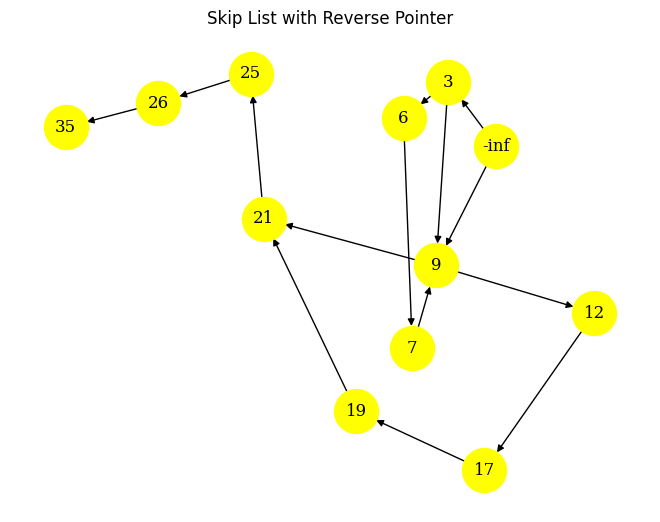

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
class Node:
    def __init__(self, key, level):
        self.key = key
        self.level = level
        self.forward = [None] * (level + 1)
        self.backward = None
class SkipList:
    def __init__(self, max_level):
        self.max_level = max_level
        self.header = self.create_node(float('-inf'), max_level)
        self.current_max_level = 0
    def create_node(self, key, level):
        new_node = Node(key, level)
        return new_node
    def random_level(self):
        level = 0
        while random.random() < 0.5 and level < self.max_level:
            level += 1
        return level
    def insert(self, key):
        update = [None] * (self.max_level + 1)
        current = self.header
        for i in range(self.current_max_level, -1, -1):
            while current.forward[i] and current.forward[i].key < key:
                current = current.forward[i]
            update[i] = current
        new_level = self.random_level()
        if new_level > self.current_max_level:
            for i in range(self.current_max_level + 1, new_level + 1):
                update[i] = self.header
            self.current_max_level = new_level
        new_node = self.create_node(key, new_level)
        for i in range(new_level + 1):
            new_node.forward[i] = update[i].forward[i]
            if update[i].forward[i]:
                update[i].forward[i].backward = new_node
            update[i].forward[i] = new_node
            new_node.backward = update[0]
    def draw_skip_list(self):
        G = nx.DiGraph()
        for level in range(self.current_max_level + 1):
            current = self.header
            while current.forward[level]:
                G.add_edge(current.key, current.forward[level].key)
                current = current.forward[level]
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color="yellow", font_size=12, font_color="black",font_family='serif')
        plt.title("Skip List with Reverse Pointer")
        plt.show()
skip_list = SkipList(max_level=4)
keys_to_insert = [3, 6, 7, 9, 12, 19, 17, 26, 21, 25, 35]
for key in keys_to_insert:
    skip_list.insert(key)
skip_list.draw_skip_list()

**Sliding Window Tree**

In [ ]:
class SlidingWindowTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (size + 1)
    def update(self, index, delta):
        index += 1
        while index <= self.size:
            self.tree[index] += delta
            index += index & -index
    def query(self, index):
        index += 1
        result = 0
        while index > 0:
            result += self.tree[index]
            index -= index & -index
        return result
    def range_query(self, start, end):
        return self.query(end) - self.query(start - 1) if start > 0 else self.query(end)
if __name__ == "__main__":
    arr = [1, 3, 5, 2, 6, 8, 4, 9]
    window_size = 3
    swt = SlidingWindowTree(len(arr))
    for i in range(window_size):
        swt.update(i, arr[i])
    for i in range(len(arr) - window_size + 1):
        start, end = i, i + window_size - 1
        window_sum = swt.range_query(start, end)
        print(f"Sum of elements in window [{start}, {end}] = {window_sum}")

Sum of elements in window [0, 2] = 9
Sum of elements in window [1, 3] = 8
Sum of elements in window [2, 4] = 5
Sum of elements in window [3, 5] = 0
Sum of elements in window [4, 6] = 0
Sum of elements in window [5, 7] = 0


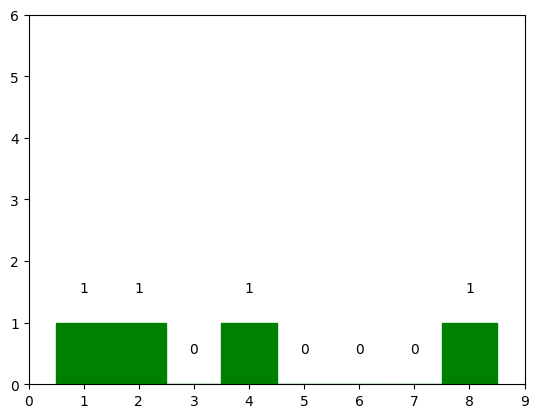

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
class SlidingWindowTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (size + 1)
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(0, size + 1)
        self.ax.set_ylim(0, 15)
    def update(self, index, delta):
        index += 1
        while index <= self.size:
            self.tree[index] += delta
            index += index & -index
        self.plot_tree()
    def query(self, index):
        index += 1
        result = 0
        while index > 0:
            result += self.tree[index]
            index -= index & -index
        return result
    def range_query(self, start, end):
        return self.query(end) - self.query(start - 1) if start > 0 else self.query(end)
    def plot_tree(self):
        self.ax.clear()
        for i, value in enumerate(self.tree[1:], start=1):
            self.ax.add_patch(patches.Rectangle((i - 0.5, 0), 1, value, fill=True, color='green'))
            self.ax.text(i, value + 0.5, str(value), ha='center')
        self.ax.set_xlim(0, self.size + 1)
        self.ax.set_ylim(0, max(self.tree) + 5)
        plt.pause(0.5)
if __name__ == "__main__":
    arr = [1, 3, 5, 2, 6, 8, 4, 9]
    window_size = 3
    swt = SlidingWindowTree(len(arr))
    for i in range(window_size):
        swt.update(i, arr[i])
    for i in range(len(arr) - window_size + 1):
        start, end = i, i + window_size - 1
        window_sum = swt.range_query(start, end)
    plt.show()

In [ ]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 32 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [ ]:
!pip install pygraphviz

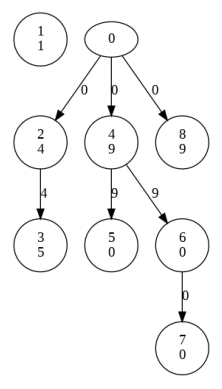

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz as pgv
class SlidingWindowTree:
    def __init__(self, size):
        self.size = size
        self.tree = [0] * (size + 1)
        self.graph = pgv.AGraph(directed=True)
    def update(self, index, delta):
        index += 1
        while index <= self.size:
            self.tree[index] += delta
            index += index & -index
        self.update_graph()
    def query(self, index):
        index += 1
        result = 0
        while index > 0:
            result += self.tree[index]
            index -= index & -index
        return result
    def range_query(self, start, end):
        return self.query(end) - self.query(start - 1) if start > 0 else self.query(end)
    def update_graph(self):
        self.graph.clear()
        for i, value in enumerate(self.tree[1:], start=1):
            self.graph.add_node(i, label=f"{i}\n{value}")
            if i > 1:
                parent = i - (i & -i)
                self.graph.add_edge(parent, i, label=f"{self.tree[parent]}")
    def visualize(self):
        self.graph.layout(prog='dot')
        self.graph.draw("sliding_window_tree.png")
        img = plt.imread("sliding_window_tree.png")
        plt.imshow(img)
        plt.axis('off')
        plt.show()
if __name__ == "__main__":
    arr = [1, 3, 5, 2, 6, 8, 4, 9]
    window_size = 3
    swt = SlidingWindowTree(len(arr))
    for i in range(window_size):
        swt.update(i, arr[i])
    for i in range(len(arr) - window_size + 1):
        start, end = i, i + window_size - 1
        window_sum = swt.range_query(start, end)
    swt.visualize()

**Sparse Matrix**

In [ ]:
class SparseMatrix:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.matrix = {}
    def set_value(self, row, col, value):
        if 0 <= row < self.rows and 0 <= col < self.cols:
            if value != 0:
                self.matrix[(row, col)] = value
                return True
            elif (row, col) in self.matrix:
                del self.matrix[(row, col)]
                return True
        return False
    def get_value(self, row, col):
        return self.matrix.get((row, col), 0)
    def get_row(self, row):
        return {(col, self.get_value(row, col)) for col in range(self.cols) if self.get_value(row, col) != 0}
    def get_col(self, col):
        return {(row, self.get_value(row, col)) for row in range(self.rows) if self.get_value(row, col) != 0}
    def transpose(self):
        transposed_matrix = SparseMatrix(self.cols, self.rows)
        for (row, col), value in self.matrix.items():
            transposed_matrix.set_value(col, row, value)
        return transposed_matrix
    def display(self):
        for i in range(self.rows):
            for j in range(self.cols):
                print(self.get_value(i, j), end=" ")
            print()
if __name__ == "__main__":
    sparse_matrix = SparseMatrix(3, 3)
    sparse_matrix.set_value(0, 0, 1)
    sparse_matrix.set_value(0, 2, 2)
    sparse_matrix.set_value(1, 1, 3)
    sparse_matrix.set_value(2, 0, 4)
    sparse_matrix.set_value(2, 2, 5)
    print("Sparse Matrix:")
    sparse_matrix.display()
    print("\nGet Row 1:", sparse_matrix.get_row(1))
    print("Get Column 2:", sparse_matrix.get_col(2))
    transposed_matrix = sparse_matrix.transpose()
    print("\nTransposed Matrix:")
    transposed_matrix.display()

Sparse Matrix:
1 0 2 
0 3 0 
4 0 5 

Get Row 1: {(1, 3)}
Get Column 2: {(0, 2), (2, 5)}

Transposed Matrix:
1 0 4 
0 3 0 
2 0 5 


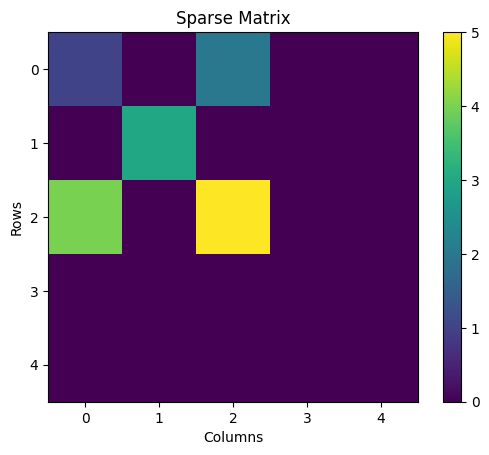

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
class SparseMatrixVisualization:
    def __init__(self, sparse_matrix):
        self.sparse_matrix = sparse_matrix
    def visualize_heatmap(self):
        matrix_values = np.zeros((self.sparse_matrix.rows, self.sparse_matrix.cols))
        for (row, col), value in self.sparse_matrix.matrix.items():
            matrix_values[row][col] = value
        plt.imshow(matrix_values, cmap='viridis', interpolation='nearest')
        plt.title("Sparse Matrix")
        plt.xlabel("Columns")
        plt.ylabel("Rows")
        plt.colorbar()
        plt.show()
if __name__ == "__main__":
    sparse_matrix1 = SparseMatrix(5, 5)
    sparse_matrix1.set_value(0, 0, 1)
    sparse_matrix1.set_value(0, 2, 2)
    sparse_matrix1.set_value(1, 1, 3)
    sparse_matrix1.set_value(2, 0, 4)
    sparse_matrix1.set_value(2, 2, 5)
    visualization = SparseMatrixVisualization(sparse_matrix1)
    visualization.visualize_heatmap()

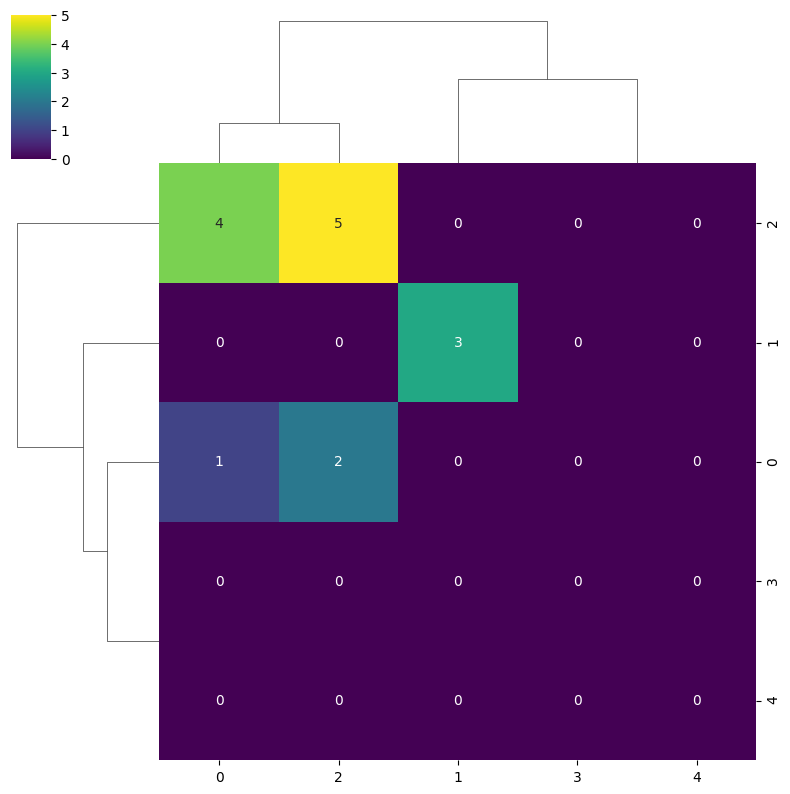

In [ ]:
import seaborn as sns
import numpy as np
class SparseMatrixVisualization:
    def __init__(self, sparse_matrix):
        self.sparse_matrix = sparse_matrix
    def visualize_clustermap(self):
        matrix_values = np.zeros((self.sparse_matrix.rows, self.sparse_matrix.cols))
        for (row, col), value in self.sparse_matrix.matrix.items():
            matrix_values[row][col] = value
        sns.clustermap(matrix_values, cmap='viridis', method='average', metric='euclidean',
                       row_cluster=True, col_cluster=True, figsize=(8, 8), annot=True, fmt='.2g')
if __name__ == "__main__":
    sparse_matrix1 = SparseMatrix(5, 5)
    sparse_matrix1.set_value(0, 0, 1)
    sparse_matrix1.set_value(0, 2, 2)
    sparse_matrix1.set_value(1, 1, 3)
    sparse_matrix1.set_value(2, 0, 4)
    sparse_matrix1.set_value(2, 2, 5)
    visualization = SparseMatrixVisualization(sparse_matrix1)
    visualization.visualize_clustermap()

**Succinct Data Structure**

In [ ]:
class SuccinctBitVector:
    def __init__(self, data):
        self.rank1 = [0]
        self.select1_index = {}
        for i, bit in enumerate(data):
            if bit == 1:
                self.rank1.append(self.rank1[-1] + 1)
                self.select1_index[len(self.rank1) - 1] = i
            else:
                self.rank1.append(self.rank1[-1])
    def rank(self, i):
        return self.rank1[i]
    def select1(self, i):
        if i not in self.select1_index:
            return None
        return self.select1_index[i]
if __name__ == "__main__":
    data = [1, 0, 1, 1, 0, 0, 1, 1, 1, 0]
    succinct_bit_vector = SuccinctBitVector(data)
    print("Rank of 7 =", succinct_bit_vector.rank(7))
    print("Select1 of 3 =", succinct_bit_vector.select1(3))

Rank of 7 = 4
Select1 of 3 = 2


**Succint Dynamic Dictionary**

In [ ]:
class DynamicSuccinctDictionary:
    def __init__(self):
        self.keys = []
        self.values = []
        self.bit_vector = []
    def rank1(self, i):
        return sum(self.bit_vector[:i + 1])
    def select1(self, i):
        indices = [j for j, bit in enumerate(self.bit_vector) if bit == 1]
        return indices[i] if i < len(indices) else None
    def insert(self, key, value):
        key_binary = bin(key)[2:]
        self.keys.append(key_binary)
        self.values.append(value)
        self.bit_vector.append(1)
    def delete(self, key):
        key_binary = bin(key)[2:]
        try:
            idx = self.keys.index(key_binary)
            del self.keys[idx]
            del self.values[idx]
            del self.bit_vector[idx]
        except ValueError:
            pass
    def lookup(self, key):
        key_binary = bin(key)[2:]
        try:
            idx = self.keys.index(key_binary)
            return self.values[idx]
        except ValueError:
            return None
if __name__ == "__main__":
    dynamic_dict = DynamicSuccinctDictionary()
    dynamic_dict.insert(5, "pizza")
    dynamic_dict.insert(8, "burger")
    dynamic_dict.insert(3, "oatmeal")
    print("Lookup key 8 =", dynamic_dict.lookup(8))
    print("Lookup key 10 =", dynamic_dict.lookup(10))
    dynamic_dict.delete(8)
    print("Lookup key 8 after deletion =", dynamic_dict.lookup(8))

Lookup key 8 = burger
Lookup key 10 = None
Lookup key 8 after deletion = None


**Suffix Automation**

In [ ]:
class SuffixAutomatonNode:
    def __init__(self, length, link=None):
        self.length = length
        self.link = link
        self.transitions = {}
def build_suffix_automaton(s):
    s += "$"
    root = SuffixAutomatonNode(0)
    last = root
    for i in range(len(s)):
        current = SuffixAutomatonNode(i + 1)
        current.link = None
        position = last
        while position is not None and s[i] not in position.transitions:
            position.transitions[s[i]] = current
            position = position.link
        if position is None:
            current.link = root
        else:
            next_state = position.transitions[s[i]]
            if next_state.length == position.length + 1:
                current.link = next_state
            else:
                clone = SuffixAutomatonNode(position.length + 1, next_state.link)
                clone.transitions = next_state.transitions.copy()
                while position is not None and position.transitions[s[i]] == next_state:
                    position.transitions[s[i]] = clone
                    position = position.link
                next_state.link = clone
                current.link = clone
        last = current
    return root
def visualize_suffix_automaton(root):
    import pygraphviz as pgv
    from IPython.display import Image
    def dfs(node, graph):
        for char, child in node.transitions.items():
            graph.add_edge(node.length, child.length, label=char)
            dfs(child, graph)
    graph = pgv.AGraph(directed=True)
    dfs(root, graph)
    graph.layout(prog='dot')
    filename = "suffix_automaton.png"
    graph.draw(filename)
    return Image(filename)
if __name__ == "__main__":
    s = "banana"
    automaton_root = build_suffix_automaton(s)
    visualize_suffix_automaton(automaton_root)

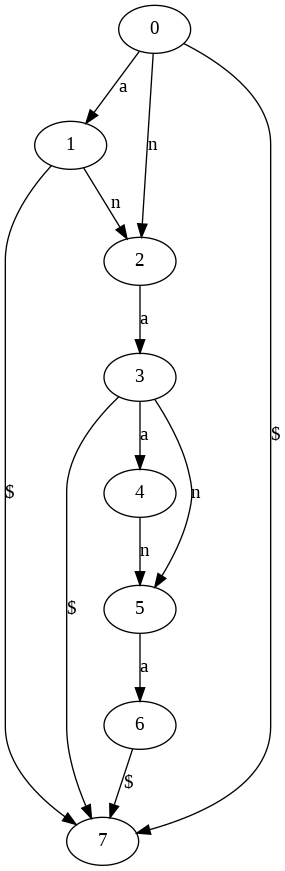

**Suffix Tree Clustering**

In [ ]:
class SuffixTreeNode:
    def __init__(self):
        self.children = {}
        self.index = -1
def build_suffix_tree(s):
    root = SuffixTreeNode()
    for i in range(len(s)):
        current = root
        for j in range(i, len(s)):
            char = s[j]
            if char not in current.children:
                current.children[char] = SuffixTreeNode()
            current = current.children[char]
            current.index = i
    return root
def suffix_tree_to_newick(node):
    if not node.children:
        return str(node.index)
    children_newick = []
    for char, child in node.children.items():
        child_newick = suffix_tree_to_newick(child)
        children_newick.append(f"{char}:{child_newick}")
    return f"({''.join(children_newick)})"
def hierarchical_clustering(suffix_trees):
    newick_trees = [suffix_tree_to_newick(tree) for tree in suffix_trees]
    return newick_trees
if __name__ == "__main__":
    sequences = ["ATCG", "ATGC", "GATC", "CGAT"]
    suffix_trees = [build_suffix_tree(seq) for seq in sequences]
    cluster_trees = hierarchical_clustering(suffix_trees)
    for i, tree in enumerate(cluster_trees):
        print(f"Cluster Tree {i + 1} =", tree)

Cluster Tree 1 = (A:(T:(C:(G:0)))T:(C:(G:1))C:(G:2)G:3)
Cluster Tree 2 = (A:(T:(G:(C:0)))T:(G:(C:1))G:(C:2)C:3)
Cluster Tree 3 = (G:(A:(T:(C:0)))A:(T:(C:1))T:(C:2)C:3)
Cluster Tree 4 = (C:(G:(A:(T:0)))G:(A:(T:1))A:(T:2)T:3)


In [ ]:
import graphviz
class SuffixTreeNode:
    def __init__(self):
        self.children = {}
        self.index = -1
def visualize_suffix_tree(node, graph, parent_label=""):
    for char, child in node.children.items():
        label = f"{parent_label}{char}"
        graph.node(label)
        if child.index != -1:
            graph.node(str(child.index), shape="point")
            graph.edge(label, str(child.index))
        visualize_suffix_tree(child, graph, label)
if __name__ == "__main__":
    sequences = ["ATCG", "ATGC", "GATC", "CGAT"]
    suffix_trees = [build_suffix_tree(seq) for seq in sequences]
    for i, tree in enumerate(suffix_trees):
        graph = graphviz.Digraph(format='png')
        visualize_suffix_tree(tree, graph)
        graph.render(filename=f"tree_{i}", format='png', cleanup=True)

`tree_0.png`

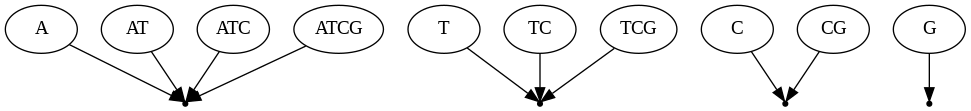

`tree_1.png`

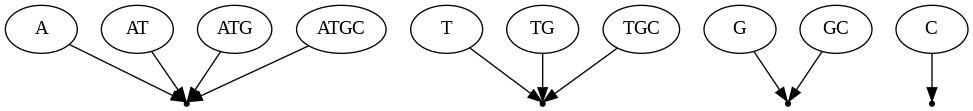

`tree_2.png`

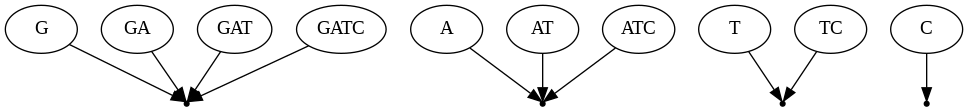

`tree_3.png`

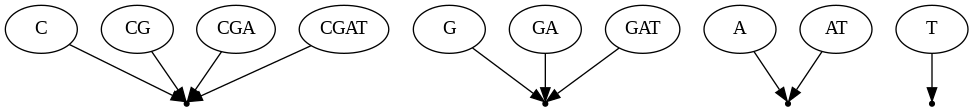

**Tango Tree**

In [ ]:
class TangoNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.size = 1
class TangoTree:
    def __init__(self):
        self.root = None
    def size(self, node):
        return node.size if node else 0
    def update_size(self, node):
        if node:
            node.size = 1 + self.size(node.left) + self.size(node.right)
    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left:
            y.left.parent = x
        y.parent = x.parent
        if not x.parent:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y
        self.update_size(x)
        self.update_size(y)
    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        if x.right:
            x.right.parent = y
        x.parent = y.parent
        if not y.parent:
            self.root = x
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x
        x.right = y
        y.parent = x
        self.update_size(y)
        self.update_size(x)
    def splay(self, node):
        while node.parent:
            parent = node.parent
            grandparent = parent.parent
            if grandparent is None:
                if node == parent.left:
                    self.rotate_right(parent)
                else:
                    self.rotate_left(parent)
            elif node == parent.left and parent == grandparent.left:
                self.rotate_right(grandparent)
                self.rotate_right(parent)
            elif node == parent.right and parent == grandparent.right:
                self.rotate_left(grandparent)
                self.rotate_left(parent)
            elif node == parent.right and parent == grandparent.left:
                self.rotate_left(parent)
                self.rotate_right(grandparent)
            else:
                self.rotate_right(parent)
                self.rotate_left(grandparent)
    def insert(self, key, value=None):
        new_node = TangoNode(key, value)
        if not self.root:
            self.root = new_node
        else:
            current = self.root
            while current:
                parent = current
                if key < current.key:
                    current = current.left
                elif key > current.key:
                    current = current.right
                else:
                    current.value = value
                    return
            if key < parent.key:
                parent.left = new_node
            else:
                parent.right = new_node
            new_node.parent = parent
            self.splay(new_node)
    def find(self, key):
        current = self.root
        while current:
            if key < current.key:
                current = current.left
            elif key > current.key:
                current = current.right
            else:
                self.splay(current)
                return current.value
        return None
if __name__ == "__main__":
    tango_tree = TangoTree()
    tango_tree.insert(5, "apple")
    tango_tree.insert(3, "banana")
    tango_tree.insert(7, "cherry")
    print(tango_tree.find(3))
    print(tango_tree.find(5))
    print(tango_tree.find(7))

banana
apple
cherry


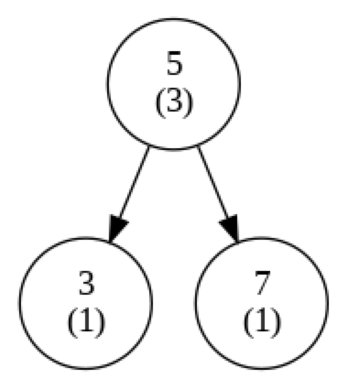

In [ ]:
import pygraphviz as pgv
import matplotlib.pyplot as plt
from PIL import Image
class TangoTreeNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.size = 1
        self.left = None
        self.right = None
        self.parent = None
class TangoTree:
    def __init__(self):
        self.root = None
    def _size(self, node):
        return node.size if node else 0
    def _update_size(self, node):
        if node:
            node.size = 1 + self._size(node.left) + self._size(node.right)
    def _rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left:
            y.left.parent = x
        y.parent = x.parent
        if not x.parent:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y
        self._update_size(x)
        self._update_size(y)
    def _rotate_right(self, y):
        x = y.left
        y.left = x.right
        if x.right:
            x.right.parent = y
        x.parent = y.parent
        if not y.parent:
            self.root = x
        elif y == y.parent.right:
            y.parent.right = x
        else:
            y.parent.left = x
        x.right = y
        y.parent = x
        self._update_size(y)
        self._update_size(x)
    def _splay(self, node):
        while node.parent:
            if not node.parent.parent:
                if node == node.parent.left:
                    self._rotate_right(node.parent)
                else:
                    self._rotate_left(node.parent)
            elif node == node.parent.left and node.parent == node.parent.parent.left:
                self._rotate_right(node.parent.parent)
                self._rotate_right(node.parent)
            elif node == node.parent.right and node.parent == node.parent.parent.right:
                self._rotate_left(node.parent.parent)
                self._rotate_left(node.parent)
            elif node == node.parent.right and node.parent == node.parent.parent.left:
                self._rotate_left(node.parent)
                self._rotate_right(node.parent.parent)
            else:
                self._rotate_right(node.parent)
                self._rotate_left(node.parent.parent)
    def _insert(self, key, value, node):
        if not node:
            return TangoTreeNode(key, value)
        self._splay(node)
        if key < node.key:
            new_node = self._insert(key, value, node.left)
            new_node.parent = node
            node.left = new_node
        elif key > node.key:
            new_node = self._insert(key, value, node.right)
            new_node.parent = node
            node.right = new_node
        else:
            node.value = value
        self._update_size(node)
        return node
    def insert(self, key, value):
        self.root = self._insert(key, value, self.root)
        self._splay(self.root)
    def _find(self, key, node):
        if not node:
            return None
        if key < node.key:
            return self._find(key, node.left)
        elif key > node.key:
            return self._find(key, node.right)
        else:
            self._splay(node)
            return node
    def find(self, key):
        return self._find(key, self.root)
    def visualize(self):
        G = pgv.AGraph(directed=True)
        self._build_graph(G, self.root)
        graph_file = "tango_tree.png"
        G.draw(graph_file, format='png', prog='dot')
        img = Image.open(graph_file)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    def _build_graph(self, G, node):
        if node:
            G.add_node(node.key, label=f"{node.key}\n({node.size})")
            if node.parent:
                G.add_edge(node.parent.key, node.key)
            self._build_graph(G, node.left)
            self._build_graph(G, node.right)
if __name__ == "__main__":
    tango_tree = TangoTree()
    tango_tree.insert(5, "apple")
    tango_tree.insert(3, "banana")
    tango_tree.insert(7, "cherry")
    tango_tree.visualize()

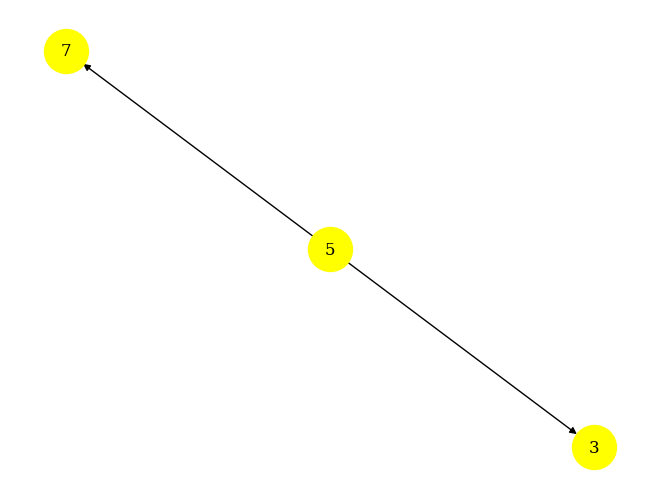

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class TangoTreeNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.size = 1
        self.left = None
        self.right = None
        self.parent = None
class TangoTree:
    def __init__(self):
        self.root = None
    def _size(self, node):
        return node.size if node else 0
    def _update_size(self, node):
        if node:
            node.size = 1 + self._size(node.left) + self._size(node.right)
    def _rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left:
            y.left.parent = x
        y.parent = x.parent
        if not x.parent:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y
        self._update_size(x)
        self._update_size(y)
    def _rotate_right(self, y):
        x = y.left
        y.left = x.right
        if x.right:
            x.right.parent = y
        x.parent = y.parent
        if not y.parent:
            self.root = x
        elif y == y.parent.right:
            y.parent.right = x
        else:
            y.parent.left = x
        x.right = y
        y.parent = x
        self._update_size(y)
        self._update_size(x)
    def _splay(self, node):
        while node.parent:
            if not node.parent.parent:
                if node == node.parent.left:
                    self._rotate_right(node.parent)
                else:
                    self._rotate_left(node.parent)
            elif node == node.parent.left and node.parent == node.parent.parent.left:
                self._rotate_right(node.parent.parent)
                self._rotate_right(node.parent)
            elif node == node.parent.right and node.parent == node.parent.parent.right:
                self._rotate_left(node.parent.parent)
                self._rotate_left(node.parent)
            elif node == node.parent.right and node.parent == node.parent.parent.left:
                self._rotate_left(node.parent)
                self._rotate_right(node.parent.parent)
            else:
                self._rotate_right(node.parent)
                self._rotate_left(node.parent.parent)
    def _insert(self, key, value, node):
        if not node:
            return TangoTreeNode(key, value)
        self._splay(node)
        if key < node.key:
            new_node = self._insert(key, value, node.left)
            new_node.parent = node
            node.left = new_node
        elif key > node.key:
            new_node = self._insert(key, value, node.right)
            new_node.parent = node
            node.right = new_node
        else:
            node.value = value
        self._update_size(node)
        return node
    def insert(self, key, value):
        self.root = self._insert(key, value, self.root)
        self._splay(self.root)
    def _find(self, key, node):
        if not node:
            return None
        if key < node.key:
            return self._find(key, node.left)
        elif key > node.key:
            return self._find(key, node.right)
        else:
            self._splay(node)
            return node
    def find(self, key):
        return self._find(key, self.root)
    def visualize(self):
        G = nx.DiGraph()
        self._build_graph(G, self.root)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color='yellow', font_size=12, font_color='black', font_family='serif')
        plt.show()
    def _build_graph(self, G, node):
        if node:
            G.add_node(node.key, label=f"{node.key}\n({node.size})")
            if node.parent:
                G.add_edge(node.parent.key, node.key)
            self._build_graph(G, node.left)
            self._build_graph(G, node.right)
if __name__ == "__main__":
    tango_tree = TangoTree()
    tango_tree.insert(5, "apple")
    tango_tree.insert(3, "banana")
    tango_tree.insert(7, "cherry")
    tango_tree.visualize()

**Top K Query**

In [ ]:
import heapq
class TopKQuery:
    def __init__(self, k):
        self.k = k
        self.heap = []
    def add_element(self, element):
        heapq.heappush(self.heap, -element)
        if len(self.heap) > self.k:
            heapq.heappop(self.heap)
    def get_top_k(self):
        return [-x for x in self.heap]
if __name__ == "__main__":
    top_k_query = TopKQuery(3)
    elements = [10, 5, 8, 12, 7, 3, 15, 6]
    for element in elements:
        top_k_query.add_element(element)
    top_k_elements = top_k_query.get_top_k()
    print(f"Top {top_k_query.k} elements = {top_k_elements}")

Top 3 elements = [6, 3, 5]


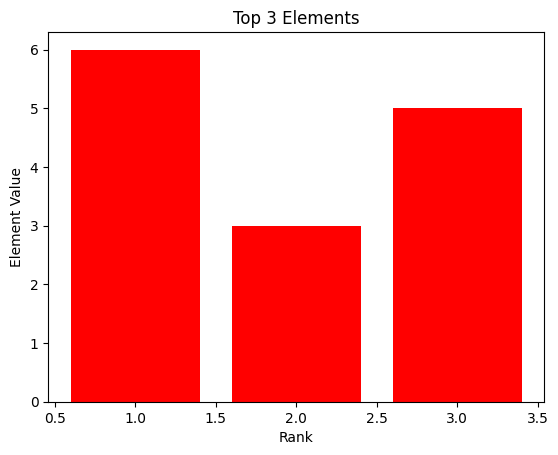

In [ ]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
class TopKQuery:
    def __init__(self, k):
        self.k = k
        self.heap = []
    def add_element(self, element):
        heapq.heappush(self.heap, -element)
        if len(self.heap) > self.k:
            heapq.heappop(self.heap)
    def get_top_k(self):
        return [-x for x in self.heap]
    def visualize_top_k(self):
        top_k_elements = self.get_top_k()
        plt.bar(range(1, self.k+1), top_k_elements, color='red')
        plt.xlabel('Rank')
        plt.ylabel('Element Value')
        plt.title(f'Top {self.k} Elements')
        plt.show()
if __name__ == "__main__":
    top_k_query = TopKQuery(3)
    elements = [10, 5, 8, 12, 7, 3, 15, 6]
    for element in elements:
        top_k_query.add_element(element)
    top_k_query.visualize_top_k()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import heapq
class TopKQuerySimulation:
    def __init__(self, k, elements):
        self.k = k
        self.elements = elements
        self.heap = []
    def add_element(self, element):
        heapq.heappush(self.heap, element)
        if len(self.heap) > self.k:
            heapq.heappop(self.heap)
    def get_top_k(self):
        return sorted(self.heap, reverse=True)
    def simulate(self):
        top_k_elements_list = []
        for element in self.elements:
            self.add_element(element)
            top_k_elements = self.get_top_k()
            top_k_elements_list.append(top_k_elements[:self.k])
        self.plot_results(top_k_elements_list)
    def plot_results(self, top_k_elements_list):
        fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter'}]])
        for i, top_k_elements in enumerate(top_k_elements_list):
            fig.add_trace(
                go.Scatter(
                    x=list(range(1, self.k + 1)),
                    y=top_k_elements,
                    mode='markers+lines',
                    name=f'Iteration {i+1}',
                ),
                row=1, col=1,
            )
        fig.update_layout(
            title=f'Top K Query',
            xaxis_title='Rank',
            yaxis_title='Element Value',
            showlegend=True,
        )
        fig.show()
if __name__ == "__main__":
    k_value = 3
    elements_list = [10, 5, 8, 12, 7, 3, 15, 6]
    top_k_query_simulation = TopKQuerySimulation(k_value, elements_list)
    top_k_query_simulation.simulate()

In [ ]:
!apt-get install python3-dev graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 32 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/m

In [ ]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168135 sha256=0cf5fbd25ef3f48007531c6a900ad8599de413b11d720f9ba319741d91a07a35
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz


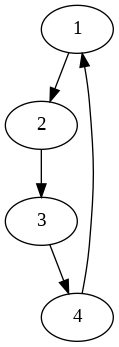

In [ ]:
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
A = nx.nx_agraph.to_agraph(G)
A.layout(prog='dot')
A.draw('graph.png')
Image(filename='graph.png')

**Top Tree**

In [ ]:
class TopTreeNode:
    def __init__(self, key):
        self.key = key
        self.size = 1
        self.left = None
        self.right = None
class TopTree:
    def __init__(self):
        self.root = None
    def size(self, node):
        return node.size if node else 0
    def update_size(self, node):
        if node:
            node.size = 1 + self.size(node.left) + self.size(node.right)
    def split(self, node, key):
        if not node:
            return None, None
        if key < node.key:
            left, node.left = self.split(node.left, key)
            self.update_size(node)
            return left, node
        else:
            node.right, right = self.split(node.right, key)
            self.update_size(node)
            return node, right
    def merge(self, left, right):
        if not left or not right:
            return left or right
        if left.key < right.key:
            left.right = self.merge(left.right, right)
            self.update_size(left)
            return left
        else:
            right.left = self.merge(left, right.left)
            self.update_size(right)
            return right
    def insert(self, key):
        left, right = self.split(self.root, key)
        new_node = TopTreeNode(key)
        self.root = self.merge(self.merge(left, new_node), right)
    def erase(self, key):
        left, right = self.split(self.root, key)
        _, right = self.split(right, key + 1)
        self.root = self.merge(left, right)
    def find_kth(self, k, node=None):
        node = node or self.root
        if not node:
            return None
        left_size = self.size(node.left)
        if k == left_size + 1:
            return node.key
        elif k <= left_size:
            return self.find_kth(k, node.left)
        else:
            return self.find_kth(k - left_size - 1, node.right)
top_tree = TopTree()
keys = [5, 3, 7, 2, 6, 8]
for key in keys:
    top_tree.insert(key)
k = 3
result = top_tree.find_kth(k)
print(f"The {k}-th smallest element = {result}")

The 3-th smallest element = 5


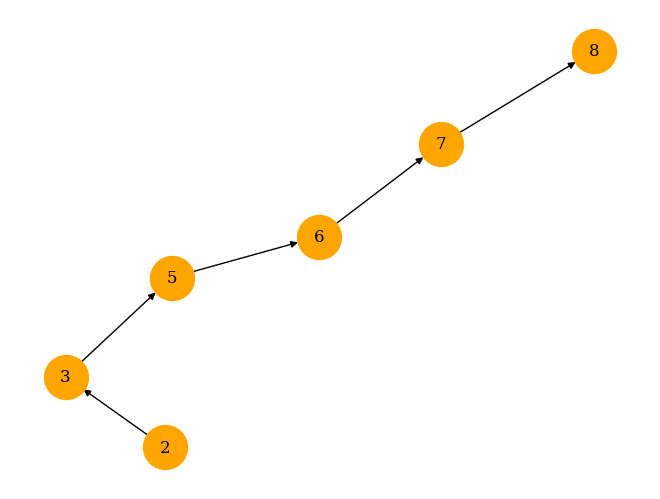

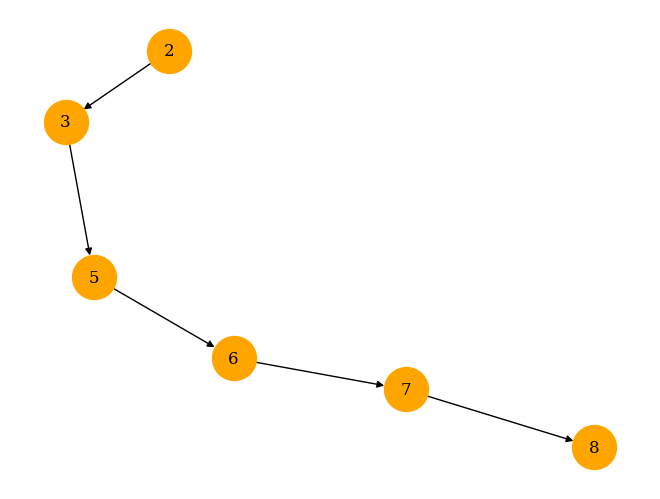

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
class TopTreeNode:
    def __init__(self, key):
        self.key = key
        self.size = 1
        self.left = None
        self.right = None
class TopTree:
    def __init__(self):
        self.root = None
    def size(self, node):
        return node.size if node else 0
    def update_size(self, node):
        if node:
            node.size = 1 + self.size(node.left) + self.size(node.right)
    def split(self, node, key):
        if not node:
            return None, None
        if key < node.key:
            left, node.left = self.split(node.left, key)
            self.update_size(node)
            return left, node
        else:
            node.right, right = self.split(node.right, key)
            self.update_size(node)
            return node, right
    def merge(self, left, right):
        if not left or not right:
            return left or right
        if left.key < right.key:
            left.right = self.merge(left.right, right)
            self.update_size(left)
            return left
        else:
            right.left = self.merge(left, right.left)
            self.update_size(right)
            return right
    def insert(self, key):
        left, right = self.split(self.root, key)
        new_node = TopTreeNode(key)
        self.root = self.merge(self.merge(left, new_node), right)
    def erase(self, key):
        left, right = self.split(self.root, key)
        _, right = self.split(right, key + 1)
        self.root = self.merge(left, right)
    def visualize(self, node=None, graph=None):
        if node is None:
            node = self.root
            graph = nx.DiGraph()
        if node:
            if node.left:
                graph.add_edge(node.key, node.left.key)
                self.visualize(node.left, graph)
            if node.right:
                graph.add_edge(node.key, node.right.key)
                self.visualize(node.right, graph)
        return graph
top_tree = TopTree()
keys = [5, 3, 7, 2, 6, 8]
for key in keys:
    top_tree.insert(key)
graph = top_tree.visualize()
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=1000, node_color="orange", font_size=12, font_family='serif')
plt.show()

**Treap**

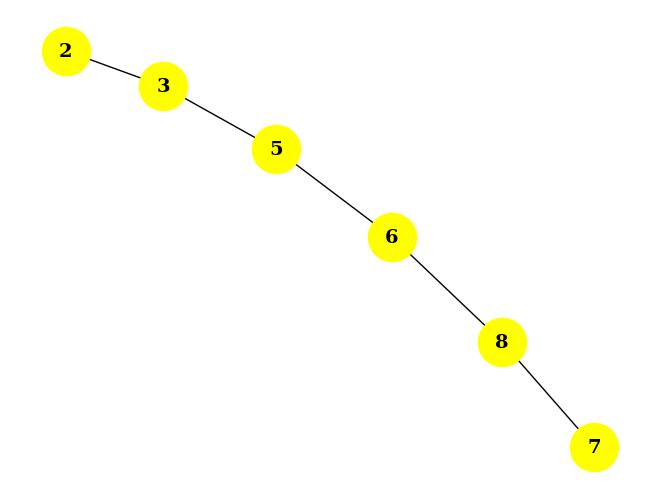

Search for key 6: True
Deleted key 3


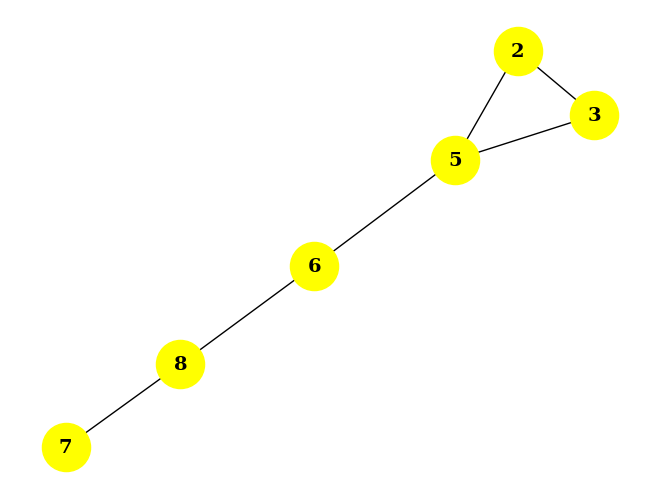

In [ ]:
import random
import matplotlib.pyplot as plt
import networkx as nx
class TreapNode:
    def __init__(self, key, priority):
        self.key = key
        self.priority = priority
        self.left = None
        self.right = None
class Treap:
    def __init__(self):
        self.root = None
        self.graph = nx.Graph()
    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        x.right = y
        return x
    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        y.left = x
        return y
    def insert(self, root, key, priority):
        if not root:
            return TreapNode(key, priority)
        if key <= root.key:
            root.left = self.insert(root.left, key, priority)
            if root.left.priority > root.priority:
                root = self.rotate_right(root)
        else:
            root.right = self.insert(root.right, key, priority)
            if root.right.priority > root.priority:
                root = self.rotate_left(root)
        return root
    def insert_key(self, key):
        priority = random.randint(1, 1000)
        self.root = self.insert(self.root, key, priority)
    def search(self, root, key):
        if not root or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)
    def search_key(self, key):
        return self.search(self.root, key)
    def delete(self, root, key):
        if not root:
            return root
        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left

            if root.left.priority > root.right.priority:
                root = self.rotate_right(root)
                root.right = self.delete(root.right, key)
            else:
                root = self.rotate_left(root)
                root.left = self.delete(root.left, key)
        return root
    def delete_key(self, key):
        self.root = self.delete(self.root, key)
    def inorder_traversal(self, root=None):
        if root is None:
            root = self.root
        result = []
        if root.left:
            result.extend(self.inorder_traversal(root.left))
        result.append(root.key)
        if root.right:
            result.extend(self.inorder_traversal(root.right))
        return result
    def visualize(self, root=None):
        if root is None:
            root = self.root
        if root.left:
            self.graph.add_edge(root.key, root.left.key)
            self.visualize(root.left)
        if root.right:
            self.graph.add_edge(root.key, root.right.key)
            self.visualize(root.right)
    def draw(self):
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, font_weight='bold', node_size=1200, node_color="yellow", font_size=14, font_family='serif')
        plt.show()
treap = Treap()
keys = [5, 3, 7, 2, 6, 8]
for key in keys:
    treap.insert_key(key)
treap.visualize()
treap.draw()
search_key = 6
search_result = treap.search_key(search_key)
print(f"Search for key {search_key}: {search_result is not None}")
delete_key = 3
treap.delete_key(delete_key)
print(f"Deleted key {delete_key}")
treap.visualize()
treap.draw()

**Two Level Radix Tree**

In [ ]:
class RadixNode:
    def __init__(self, value=None):
        self.value = value
        self.children = {}
class TwoLevelRadixTree:
    def __init__(self):
        self.root = RadixNode()
    def insert(self, key, value):
        current = self.root
        for char in key:
            if char not in current.children:
                current.children[char] = RadixNode()
            current = current.children[char]
        current.value = value
    def search(self, key):
        current = self.root
        for char in key:
            if char not in current.children:
                return None
            current = current.children[char]
        return current.value
radix_tree = TwoLevelRadixTree()
radix_tree.insert("Apple", "Fruit")
radix_tree.insert("Lamborghini", "Car")
radix_tree.insert("Lion", "Animal")
radix_tree.insert("Ronaldo", "Footballer")
print(radix_tree.search("Apple"))
print(radix_tree.search("Lamborghini"))
print(radix_tree.search("Lion"))
print(radix_tree.search("Ronaldo"))
print(radix_tree.search("Pizza"))

Fruit
Car
Animal
Footballer
None


**Uniform Spanning Tree**

In [ ]:
import networkx as nx
import random
def generate_random_graph(n, seed=42):
    G = nx.Graph()
    random.seed(seed)
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < 0.3:
                G.add_edge(i, j)
    return G
def find_uniform_spanning_tree(G, seed=42):
    random.seed(seed)
    edges = list(G.edges())
    random.shuffle(edges)
    spanning_tree = nx.Graph()
    union_find = {node: node for node in G.nodes()}
    for edge in edges:
        u, v = edge
        root_u = find(union_find, u)
        root_v = find(union_find, v)
        if root_u != root_v:
            spanning_tree.add_edge(u, v)
            union(union_find, root_u, root_v)
    return spanning_tree
def find(union_find, node):
    if union_find[node] != node:
        union_find[node] = find(union_find, union_find[node])
    return union_find[node]
def union(union_find, root_u, root_v):
    union_find[root_u] = root_v
random_graph = generate_random_graph(10)
uniform_spanning_tree = find_uniform_spanning_tree(random_graph)
print("Edges of the Uniform Spanning Tree:")
print(uniform_spanning_tree.edges())

Edges of the Uniform Spanning Tree:
[(3, 1), (3, 7), (3, 0), (1, 9), (8, 7), (2, 5), (2, 9), (9, 6), (0, 4)]


**Van Emde Boas Tree**

In [ ]:
import math
class VEBTree:
    def __init__(self, universe_size):
        self.u = universe_size
        self.min = None
        self.max = None
        if self.u == 2:
            self.cluster = None
            self.summary = None
        else:
            cluster_size = int(math.ceil(math.sqrt(self.u)))
            self.cluster = [None] * cluster_size
            self.summary = VEBTree(cluster_size)
    def high(self, x):
        return x // int(math.sqrt(self.u))
    def low(self, x):
        return x % int(math.sqrt(self.u))
    def index(self, x, y):
        return x * int(math.sqrt(self.u)) + y
    def minimum(self):
        return self.min
    def maximum(self):
        return self.max
    def member(self, x):
        if x == self.min or x == self.max:
            return True
        elif self.u == 2:
            return False
        elif self.cluster[self.high(x)] is not None:
            return self.cluster[self.high(x)].member(self.low(x))
        else:
            return False
    def successor(self, x):
        if self.u == 2:
            if x == 0 and self.max == 1:
                return 1
            else:
                return None
        elif self.min is not None and x < self.min:
            return self.min
        else:
            if self.cluster[self.high(x)] is not None:
                max_low = self.cluster[self.high(x)].maximum()
                if max_low is not None and self.low(x) < max_low:
                    offset = self.cluster[self.high(x)].successor(self.low(x))
                    return self.index(self.high(x), offset)
                else:
                    succ_cluster = self.summary.successor(self.high(x))
                    if succ_cluster is None:
                        return None
                    else:
                        offset = self.cluster[succ_cluster].minimum()
                        return self.index(succ_cluster, offset)
            else:
                return None
    def predecessor(self, x):
        if self.u == 2:
            if x == 1 and self.min == 0:
                return 0
            else:
                return None
        elif self.max is not None and x > self.max:
            return self.max
        else:
            if self.cluster[self.high(x)] is not None:
                min_low = self.cluster[self.high(x)].minimum()
                if min_low is not None and self.low(x) > min_low:
                    offset = self.cluster[self.high(x)].predecessor(self.low(x))
                    return self.index(self.high(x), offset)
                else:
                    pred_cluster = self.summary.predecessor(self.high(x))
                    if pred_cluster is None:
                        if self.min is not None and x > self.min:
                            return self.min
                        else:
                            return None
                    else:
                        offset = self.cluster[pred_cluster].maximum()
                        return self.index(pred_cluster, offset)
            else:
                return None
    def insert(self, x):
        if self.min is None:
            self.min = self.max = x
        else:
            if x < self.min:
                x, self.min = self.min, x
            if self.u > 2:
                if self.cluster[self.high(x)] is None:
                    self.cluster[self.high(x)] = VEBTree(int(math.sqrt(self.u)))
                if self.cluster[self.high(x)].minimum() is None:
                    self.summary.insert(self.high(x))
                self.cluster[self.high(x)].insert(self.low(x))
            if x > self.max:
                self.max = x
    def delete(self, x):
        if self.min == self.max:
            self.min = self.max = None
        elif self.u == 2:
            if x == 0:
                self.min = 1
            else:
                self.min = 0
            self.max = self.min
        else:
            if x == self.min:
                first_cluster = self.summary.minimum()
                x = self.index(first_cluster, self.cluster[first_cluster].minimum())
                self.min = x
            self.cluster[self.high(x)].delete(self.low(x))
            if self.cluster[self.high(x)].minimum() is None:
                self.summary.delete(self.high(x))
                if x == self.max:
                    summary_max = self.summary.maximum()
                    if summary_max is None:
                        self.max = self.min
                    else:
                        self.max = self.index(summary_max, self.cluster[summary_max].maximum())
            elif x == self.max:
                self.max = self.index(self.high(x), self.cluster[self.high(x)].maximum())
veb_tree = VEBTree(16)
veb_tree.insert(2)
veb_tree.insert(4)
veb_tree.insert(7)
veb_tree.insert(10)
print("Minimum =", veb_tree.minimum())
print("Maximum =", veb_tree.maximum())
print("Successor of 7 =", veb_tree.successor(7))
print("Predecessor of 7 =", veb_tree.predecessor(7))
veb_tree.delete(7)
print("After deleting 7, Successor of 4 =", veb_tree.successor(4))

Minimum = 2
Maximum = 10
Successor of 7 = None
Predecessor of 7 = 4
After deleting 7, Successor of 4 = None


**Wavelet Tree**

In [ ]:
class WaveletTree:
    def __init__(self, alphabet, sequence):
        self.alphabet = alphabet
        self.sequence = sequence
        self.root = self.build_wavelet_tree(sequence, alphabet)
    def build_wavelet_tree(self, sequence, alphabet):
        if len(alphabet) == 1 or len(set(sequence)) == 1:
            return {'leaf': True, 'symbol': sequence[0]}
        mid = (max(alphabet) + min(alphabet)) // 2
        left_alphabet = [c for c in alphabet if c <= mid]
        right_alphabet = [c for c in alphabet if c > mid]
        left_sequence = [c for c in sequence if c <= mid]
        right_sequence = [c for c in sequence if c > mid]
        return {
            'leaf': False,
            'mid': mid,
            'left': self.build_wavelet_tree(left_sequence, left_alphabet),
            'right': self.build_wavelet_tree(right_sequence, right_alphabet)
        }
    def rank(self, symbol, position):
        return self.rank_helper(self.root, symbol, position)
    def rank_helper(self, node, symbol, position):
        if node['leaf']:
            return position if node['symbol'] == symbol else 0
        if symbol <= node['mid']:
            return self.rank_helper(node['left'], symbol, position)
        else:
            return self.rank_helper(node['right'], symbol, position - position // 2)
    def select(self, symbol, rank):
        return self.select_helper(self.root, symbol, rank)
    def select_helper(self, node, symbol, rank):
        if node['leaf']:
            return None if node['symbol'] != symbol else rank
        if symbol <= node['mid']:
            return self.select_helper(node['left'], symbol, rank)
        else:
            return self.select_helper(node['right'], symbol, rank + rank // 2)
alphabet = [0, 1, 2, 3, 4, 5, 6, 7]
sequence = [3, 1, 4, 6, 2, 5, 7, 0]
wavelet_tree = WaveletTree(alphabet, sequence)
print("Rank of 2 at position 4 =", wavelet_tree.rank(2, 4))
print("Rank of 6 at position 6 =", wavelet_tree.rank(6, 6))
print("Select 1 for symbol 4 =", wavelet_tree.select(4, 1))
print("Select 2 for symbol 2 =", wavelet_tree.select(2, 2))

Rank of 2 at position 4 = 2
Rank of 6 at position 6 = 2
Select 1 for symbol 4 = 1
Select 2 for symbol 2 = 3


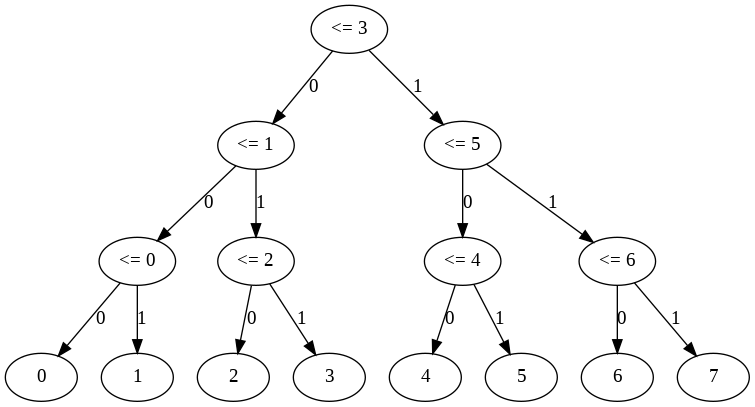

In [ ]:
import pygraphviz as pgv
from PIL import Image
from IPython.display import Image as IPImage, display
class WaveletTree:
    def __init__(self, alphabet, sequence):
        self.alphabet = alphabet
        self.sequence = sequence
        self.root = self.build_wavelet_tree(sequence, alphabet)
    def build_wavelet_tree(self, sequence, alphabet):
        if len(alphabet) == 1 or len(set(sequence)) == 1:
            return {'leaf': True, 'symbol': sequence[0]}
        mid = (max(alphabet) + min(alphabet)) // 2
        left_alphabet = [c for c in alphabet if c <= mid]
        right_alphabet = [c for c in alphabet if c > mid]
        left_sequence = [c for c in sequence if c <= mid]
        right_sequence = [c for c in sequence if c > mid]
        return {
            'leaf': False,
            'mid': mid,
            'left': self.build_wavelet_tree(left_sequence, left_alphabet),
            'right': self.build_wavelet_tree(right_sequence, right_alphabet)
        }
class WaveletTreeVisualization:
    def __init__(self, tree):
        self.tree = tree
        self.graph = pgv.AGraph(directed=True)
    def visualize_wavelet_tree(self, node, parent=None, edge_label=None):
        if node['leaf']:
            leaf_node_id = f"leaf_{node['symbol']}"
            self.graph.add_node(leaf_node_id, label=str(node['symbol']))
            if parent is not None:
                self.graph.add_edge(parent, leaf_node_id, label=edge_label)
        else:
            internal_node_id = f"internal_{node['mid']}"
            self.graph.add_node(internal_node_id, label=f"<= {node['mid']}")
            if parent is not None:
                self.graph.add_edge(parent, internal_node_id, label=edge_label)
            self.visualize_wavelet_tree(node['left'], internal_node_id, "0")
            self.visualize_wavelet_tree(node['right'], internal_node_id, "1")
    def render_tree(self, output_file="wavelet_tree.png"):
        self.visualize_wavelet_tree(self.tree.root)
        self.graph.draw(output_file, format='png', prog='dot')
        img = Image.open(output_file)
        display(IPImage(filename=output_file))
alphabet = [0, 1, 2, 3, 4, 5, 6, 7]
sequence = [3, 1, 4, 6, 2, 5, 7, 0]
wavelet_tree = WaveletTree(alphabet, sequence)
wavelet_tree_visualization = WaveletTreeVisualization(wavelet_tree)
wavelet_tree_visualization.render_tree()

**Weak AVL Tree**

In [ ]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1
class WeakAVLTree:
    def __init__(self):
        self.root = None
    def height(self, node):
        if node is None:
            return 0
        return node.height
    def balance_factor(self, node):
        return self.height(node.left) - self.height(node.right)
    def update_height(self, node):
        if node is not None:
            node.height = 1 + max(self.height(node.left), self.height(node.right))
    def rotate_left(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        self.update_height(z)
        self.update_height(y)
        return y
    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x
    def rebalance(self, node):
        if node is None:
            return None
        self.update_height(node)
        balance = self.balance_factor(node)
        if balance > 1:
            if self.balance_factor(node.left) >= 0:
                return self.rotate_right(node)
            else:
                node.left = self.rotate_left(node.left)
                return self.rotate_right(node)
        if balance < -1:
            if self.balance_factor(node.right) <= 0:
                return self.rotate_left(node)
            else:
                node.right = self.rotate_right(node.right)
                return self.rotate_left(node)
        return node
    def insert(self, root, key):
        if root is None:
            return Node(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
        return self.rebalance(root)
    def insert_key(self, key):
        self.root = self.insert(self.root, key)
    def search(self, root, key):
        if root is None or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)
    def search_key(self, key):
        return self.search(self.root, key)
    def find_min(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current
    def delete(self, root, key):
        if root is None:
            return root
        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left
            root.key = self.find_min(root.right).key
            root.right = self.delete(root.right, root.key)
        return self.rebalance(root)
    def delete_key(self, key):
        self.root = self.delete(self.root, key)
    def inorder_traversal(self, node, result):
        if node:
            result = self.inorder_traversal(node.left, result)
            result.append(node.key)
            result = self.inorder_traversal(node.right, result)
        return result
    def preorder_traversal(self, node, result):
        if node:
            result.append(node.key)
            result = self.preorder_traversal(node.left, result)
            result = self.preorder_traversal(node.right, result)
        return result
    def postorder_traversal(self, node, result):
        if node:
            result = self.postorder_traversal(node.left, result)
            result = self.postorder_traversal(node.right, result)
            result.append(node.key)
        return result
    def get_inorder(self):
        result = []
        return self.inorder_traversal(self.root, result)
    def get_preorder(self):
        result = []
        return self.preorder_traversal(self.root, result)
    def get_postorder(self):
        result = []
        return self.postorder_traversal(self.root, result)
    def display_tree(self, node, level=0, prefix="Root: "):
        if node is not None:
            print(" " * (level * 4) + prefix + f"{node.key} ({node.height})")
            self.display_tree(node.left, level + 1, "L--- ")
            self.display_tree(node.right, level + 1, "R--- ")
weak_avl_tree = WeakAVLTree()
keys = [3, 1, 5, 2, 4, 6]
for key in keys:
    weak_avl_tree.insert_key(key)
print("Initial Weak AVL Tree:")
weak_avl_tree.display_tree(weak_avl_tree.root)
print("In-order Traversal =", weak_avl_tree.get_inorder())
print("Pre-order Traversal =", weak_avl_tree.get_preorder())
print("Post-order Traversal =", weak_avl_tree.get_postorder())

search_key = 4
print(f"\nSearch for key {search_key}:")
search_result = weak_avl_tree.search_key(search_key)
if search_result is not None:
    print(f"Key {search_key} found in the tree.")
else:
    print(f"Key {search_key} not found in the tree.")

delete_key = 2
print(f"\nDeleting key {delete_key}:")
weak_avl_tree.delete_key(delete_key)
weak_avl_tree.display_tree(weak_avl_tree.root)
print("In-order Traversal =", weak_avl_tree.get_inorder())
print("Pre-order Traversal =", weak_avl_tree.get_preorder())
print("Post-order Traversal =", weak_avl_tree.get_postorder())

Initial Weak AVL Tree:
Root: 3 (3)
    L--- 1 (2)
        R--- 2 (1)
    R--- 5 (2)
        L--- 4 (1)
        R--- 6 (1)
In-order Traversal = [1, 2, 3, 4, 5, 6]
Pre-order Traversal = [3, 1, 2, 5, 4, 6]
Post-order Traversal = [2, 1, 4, 6, 5, 3]

Search for key 4:
Key 4 found in the tree.

Deleting key 2:
Root: 3 (3)
    L--- 1 (1)
    R--- 5 (2)
        L--- 4 (1)
        R--- 6 (1)
In-order Traversal = [1, 3, 4, 5, 6]
Pre-order Traversal = [3, 1, 5, 4, 6]
Post-order Traversal = [1, 4, 6, 5, 3]


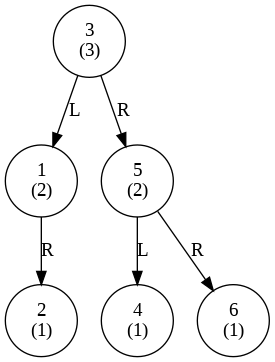

In [ ]:
import pygraphviz as pgv
from PIL import Image
from IPython.display import Image as IPImage, display
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1
class WeakAVLTree:
    def __init__(self):
        self.root = None
    def height(self, node):
        if node is None:
            return 0
        return node.height
    def balance_factor(self, node):
        return self.height(node.left) - self.height(node.right)
    def update_height(self, node):
        if node is not None:
            node.height = 1 + max(self.height(node.left), self.height(node.right))
    def rotate_left(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        self.update_height(z)
        self.update_height(y)
        return y
    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x
    def rebalance(self, node):
        if node is None:
            return None
        self.update_height(node)
        balance = self.balance_factor(node)
        if balance > 1:
            if self.balance_factor(node.left) >= 0:
                return self.rotate_right(node)
            else:
                node.left = self.rotate_left(node.left)
                return self.rotate_right(node)
        if balance < -1:
            if self.balance_factor(node.right) <= 0:
                return self.rotate_left(node)
            else:
                node.right = self.rotate_right(node.right)
                return self.rotate_left(node)
        return node
    def insert(self, root, key):
        if root is None:
            return Node(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
        return self.rebalance(root)
    def insert_key(self, key):
        self.root = self.insert(self.root, key)
    def display_tree(self, node, graph, parent_id=None, label=None, level=0):
        if node is not None:
            current_id = str(node.key)
            graph.add_node(current_id, label=f"{node.key}\n({node.height})")
            if parent_id is not None:
                graph.add_edge(parent_id, current_id, label=label)
            self.display_tree(node.left, graph, current_id, "L", level + 1)
            self.display_tree(node.right, graph, current_id, "R", level + 1)
    def visualize_tree(self, output_file="weak_avl_tree.png"):
        graph = pgv.AGraph(directed=True)
        self.display_tree(self.root, graph)
        graph.layout(prog="dot")
        graph.draw(output_file, format='png')
        img = Image.open(output_file)
        display(IPImage(filename=output_file))
weak_avl_tree = WeakAVLTree()
keys = [3, 1, 5, 2, 4, 6]
for key in keys:
    weak_avl_tree.insert_key(key)
weak_avl_tree.visualize_tree()

Initial Weak AVL Tree:


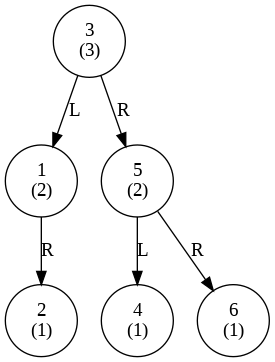


Search for key 4:
Key 4 found in the tree.

After deleting key 2:


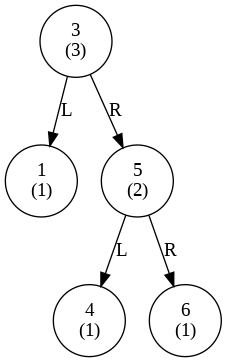


In-order Traversal = [1, 3, 4, 5, 6]
Pre-order Traversal = [3, 1, 5, 4, 6]
Post-order Traversal = [1, 4, 6, 5, 3]


In [ ]:
import pygraphviz as pgv
from PIL import Image
from IPython.display import Image as IPImage, display
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1
class WeakAVLTree:
    def __init__(self):
        self.root = None
    def height(self, node):
        if node is None:
            return 0
        return node.height
    def balance_factor(self, node):
        return self.height(node.left) - self.height(node.right)
    def update_height(self, node):
        if node is not None:
            node.height = 1 + max(self.height(node.left), self.height(node.right))
    def rotate_left(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        self.update_height(z)
        self.update_height(y)
        return y
    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x
    def rebalance(self, node):
        if node is None:
            return None
        self.update_height(node)
        balance = self.balance_factor(node)
        if balance > 1:
            if self.balance_factor(node.left) >= 0:
                return self.rotate_right(node)
            else:
                node.left = self.rotate_left(node.left)
                return self.rotate_right(node)
        if balance < -1:
            if self.balance_factor(node.right) <= 0:
                return self.rotate_left(node)
            else:
                node.right = self.rotate_right(node.right)
                return self.rotate_left(node)
        return node
    def insert(self, root, key):
        if root is None:
            return Node(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
        return self.rebalance(root)
    def insert_key(self, key):
        self.root = self.insert(self.root, key)
    def search(self, root, key):
        if root is None or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)
    def search_key(self, key):
        return self.search(self.root, key)
    def find_min(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current
    def delete(self, root, key):
        if root is None:
            return root
        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            if root.left is None:
                return root.right
            elif root.right is None:
                return root.left
            root.key = self.find_min(root.right).key
            root.right = self.delete(root.right, root.key)
        return self.rebalance(root)
    def delete_key(self, key):
        self.root = self.delete(self.root, key)
    def inorder_traversal(self, node, result):
        if node:
            result = self.inorder_traversal(node.left, result)
            result.append(node.key)
            result = self.inorder_traversal(node.right, result)
        return result
    def preorder_traversal(self, node, result):
        if node:
            result.append(node.key)
            result = self.preorder_traversal(node.left, result)
            result = self.preorder_traversal(node.right, result)
        return result
    def postorder_traversal(self, node, result):
        if node:
            result = self.postorder_traversal(node.left, result)
            result = self.postorder_traversal(node.right, result)
            result.append(node.key)
        return result
    def get_inorder(self):
        result = []
        return self.inorder_traversal(self.root, result)
    def get_preorder(self):
        result = []
        return self.preorder_traversal(self.root, result)
    def get_postorder(self):
        result = []
        return self.postorder_traversal(self.root, result)
    def display_tree(self, node, graph, parent_id=None, label=None, level=0):
        if node is not None:
            current_id = str(node.key)
            graph.add_node(current_id, label=f"{node.key}\n({node.height})")
            if parent_id is not None:
                graph.add_edge(parent_id, current_id, label=label)
            self.display_tree(node.left, graph, current_id, "L", level + 1)
            self.display_tree(node.right, graph, current_id, "R", level + 1)
    def visualize_tree(self, output_file="weak_avl_tree.png"):
        graph = pgv.AGraph(directed=True)
        self.display_tree(self.root, graph)
        graph.layout(prog="dot")
        graph.draw(output_file, format='png')
        img = Image.open(output_file)
        display(IPImage(filename=output_file))
weak_avl_tree = WeakAVLTree()
keys = [3, 1, 5, 2, 4, 6]
for key in keys:
    weak_avl_tree.insert_key(key)
print("Initial Weak AVL Tree:")
weak_avl_tree.visualize_tree()
search_key = 4
print(f"\nSearch for key {search_key}:")
search_result = weak_avl_tree.search_key(search_key)
if search_result is not None:
    print(f"Key {search_key} found in the tree.")
else:
    print(f"Key {search_key} not found in the tree.")
delete_key = 2
print(f"\nAfter deleting key {delete_key}:")
weak_avl_tree.delete_key(delete_key)
weak_avl_tree.visualize_tree()
print("\nIn-order Traversal =", weak_avl_tree.get_inorder())
print("Pre-order Traversal =", weak_avl_tree.get_preorder())
print("Post-order Traversal =", weak_avl_tree.get_postorder())

**Weight Balanced Tree**

In [ ]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.weight = 1
class WeightBalancedTree:
    def __init__(self):
        self.root = None
    def weight(self, node):
        return node.weight if node else 0
    def update_weight(self, node):
        if node:
            node.weight = 1 + self.weight(node.left) + self.weight(node.right)
    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        x.right = y
        self.update_weight(y)
        self.update_weight(x)
        return x
    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        y.left = x
        self.update_weight(x)
        self.update_weight(y)
        return y
    def rebalance(self, node):
        if not node:
            return None
        if self.weight(node.left) > 2 * self.weight(node.right):
            if self.weight(node.left.left) < self.weight(node.left.right):
                node.left = self.rotate_left(node.left)
            node = self.rotate_right(node)
        elif self.weight(node.right) > 2 * self.weight(node.left):
            if self.weight(node.right.right) < self.weight(node.right.left):
                node.right = self.rotate_right(node.right)
            node = self.rotate_left(node)
        return node
    def insert(self, root, key):
        if not root:
            return Node(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
        elif key > root.key:
            root.right = self.insert(root.right, key)
        self.update_weight(root)
        return self.rebalance(root)
    def insert_key(self, key):
        self.root = self.insert(self.root, key)
    def search(self, root, key):
        if not root or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)
    def search_key(self, key):
        return self.search(self.root, key)
    def find_min(self, node):
        current = node
        while current.left:
            current = current.left
        return current
    def delete(self, root, key):
        if not root:
            return root
        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            root.key = self.find_min(root.right).key
            root.right = self.delete(root.right, root.key)
        self.update_weight(root)
        return self.rebalance(root)
    def delete_key(self, key):
        self.root = self.delete(self.root, key)
    def inorder_traversal(self, node, result):
        if node:
            result = self.inorder_traversal(node.left, result)
            result.append(node.key)
            result = self.inorder_traversal(node.right, result)
        return result
    def preorder_traversal(self, node, result):
        if node:
            result.append(node.key)
            result = self.preorder_traversal(node.left, result)
            result = self.preorder_traversal(node.right, result)
        return result
    def postorder_traversal(self, node, result):
        if node:
            result = self.postorder_traversal(node.left, result)
            result = self.postorder_traversal(node.right, result)
            result.append(node.key)
        return result
    def get_inorder(self):
        result = []
        return self.inorder_traversal(self.root, result)
    def get_preorder(self):
        result = []
        return self.preorder_traversal(self.root, result)
    def get_postorder(self):
        result = []
        return self.postorder_traversal(self.root, result)
    def display_tree(self, node, level=0, prefix="Root: "):
        if node:
            print(" " * (level * 4) + prefix + f"{node.key} ({node.weight})")
            self.display_tree(node.left, level + 1, "L--- ")
            self.display_tree(node.right, level + 1, "R--- ")
weight_balanced_tree = WeightBalancedTree()
keys = [3, 1, 5, 2, 4, 6]
for key in keys:
    weight_balanced_tree.insert_key(key)
print("Initial Weight-Balanced Tree:-")
weight_balanced_tree.display_tree(weight_balanced_tree.root)
print("In-order Traversal =", weight_balanced_tree.get_inorder())
print("Pre-order Traversal =", weight_balanced_tree.get_preorder())
print("Post-order Traversal =", weight_balanced_tree.get_postorder())
search_key = 4
print(f"\nSearch for key {search_key}:")
search_result = weight_balanced_tree.search_key(search_key)
if search_result:
    print(f"Key {search_key} found in the tree.")
else:
    print(f"Key {search_key} not found in the tree.")
delete_key = 2
print(f"\nAfter deleting key {delete_key}:-")
weight_balanced_tree.delete_key(delete_key)
weight_balanced_tree.display_tree(weight_balanced_tree.root)
print("In-order Traversal =", weight_balanced_tree.get_inorder())
print("Pre-order Traversal =", weight_balanced_tree.get_preorder())
print("Post-order Traversal =", weight_balanced_tree.get_postorder())

Initial Weight-Balanced Tree:-
Root: 3 (6)
    L--- 2 (2)
        L--- 1 (1)
    R--- 5 (3)
        L--- 4 (1)
        R--- 6 (1)
In-order Traversal = [1, 2, 3, 4, 5, 6]
Pre-order Traversal = [3, 2, 1, 5, 4, 6]
Post-order Traversal = [1, 2, 4, 6, 5, 3]

Search for key 4:
Key 4 found in the tree.

After deleting key 2:-
Root: 5 (5)
    L--- 3 (3)
        L--- 1 (1)
        R--- 4 (1)
    R--- 6 (1)
In-order Traversal = [1, 3, 4, 5, 6]
Pre-order Traversal = [5, 3, 1, 4, 6]
Post-order Traversal = [1, 4, 3, 6, 5]


Initial Weight-Balanced Tree:-


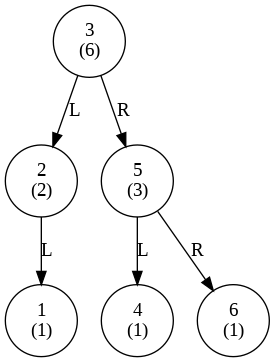


Search for key 4:
Key 4 found in the tree.

After deleting key 2:-


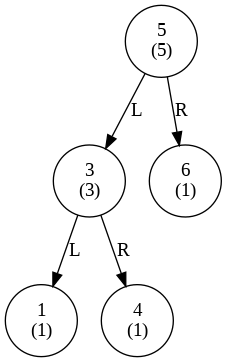

In-order Traversal = [1, 3, 4, 5, 6]
Pre-order Traversal = [5, 3, 1, 4, 6]
Post-order Traversal = [1, 4, 3, 6, 5]


In [ ]:
import pygraphviz as pgv
from PIL import Image
from IPython.display import Image as IPImage, display
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.weight = 1
class WeightBalancedTree:
    def __init__(self):
        self.root = None
    def weight(self, node):
        return node.weight if node else 0
    def update_weight(self, node):
        if node:
            node.weight = 1 + self.weight(node.left) + self.weight(node.right)
    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        x.right = y
        self.update_weight(y)
        self.update_weight(x)
        return x
    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        y.left = x
        self.update_weight(x)
        self.update_weight(y)
        return y
    def rebalance(self, node):
        if not node:
            return None
        if self.weight(node.left) > 2 * self.weight(node.right):
            if self.weight(node.left.left) < self.weight(node.left.right):
                node.left = self.rotate_left(node.left)
            node = self.rotate_right(node)
        elif self.weight(node.right) > 2 * self.weight(node.left):
            if self.weight(node.right.right) < self.weight(node.right.left):
                node.right = self.rotate_right(node.right)
            node = self.rotate_left(node)
        return node
    def insert(self, root, key):
        if not root:
            return Node(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
        elif key > root.key:
            root.right = self.insert(root.right, key)
        self.update_weight(root)
        return self.rebalance(root)
    def insert_key(self, key):
        self.root = self.insert(self.root, key)
    def search(self, root, key):
        if not root or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)
    def search_key(self, key):
        return self.search(self.root, key)
    def find_min(self, node):
        current = node
        while current.left:
            current = current.left
        return current
    def delete(self, root, key):
        if not root:
            return root
        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            root.key = self.find_min(root.right).key
            root.right = self.delete(root.right, root.key)
        self.update_weight(root)
        return self.rebalance(root)
    def delete_key(self, key):
        self.root = self.delete(self.root, key)
    def inorder_traversal(self, node, result):
        if node:
            result = self.inorder_traversal(node.left, result)
            result.append(node.key)
            result = self.inorder_traversal(node.right, result)
        return result
    def preorder_traversal(self, node, result):
        if node:
            result.append(node.key)
            result = self.preorder_traversal(node.left, result)
            result = self.preorder_traversal(node.right, result)
        return result
    def postorder_traversal(self, node, result):
        if node:
            result = self.postorder_traversal(node.left, result)
            result = self.postorder_traversal(node.right, result)
            result.append(node.key)
        return result
    def get_inorder(self):
        result = []
        return self.inorder_traversal(self.root, result)
    def get_preorder(self):
        result = []
        return self.preorder_traversal(self.root, result)
    def get_postorder(self):
        result = []
        return self.postorder_traversal(self.root, result)
    def display_tree(self, node, graph, parent_id=None, label=None, level=0):
        if node:
            current_id = str(node.key)
            graph.add_node(current_id, label=f"{node.key}\n({node.weight})")
            if parent_id:
                graph.add_edge(parent_id, current_id, label=label)
            self.display_tree(node.left, graph, current_id, "L", level + 1)
            self.display_tree(node.right, graph, current_id, "R", level + 1)
    def visualize_tree(self, output_file="weight_balanced_tree.png"):
        graph = pgv.AGraph(directed=True)
        self.display_tree(self.root, graph)
        graph.layout(prog="dot")
        graph.draw(output_file, format='png')
        img = Image.open(output_file)
        display(IPImage(filename=output_file))
weight_balanced_tree = WeightBalancedTree()
keys = [3, 1, 5, 2, 4, 6]
for key in keys:
    weight_balanced_tree.insert_key(key)
print("Initial Weight-Balanced Tree:-")
weight_balanced_tree.visualize_tree()
search_key = 4
print(f"\nSearch for key {search_key}:")
search_result = weight_balanced_tree.search_key(search_key)
if search_result:
    print(f"Key {search_key} found in the tree.")
else:
    print(f"Key {search_key} not found in the tree.")
delete_key = 2
print(f"\nAfter deleting key {delete_key}:-")
weight_balanced_tree.delete_key(delete_key)
weight_balanced_tree.visualize_tree()
print("In-order Traversal =", weight_balanced_tree.get_inorder())
print("Pre-order Traversal =", weight_balanced_tree.get_preorder())
print("Post-order Traversal =", weight_balanced_tree.get_postorder())


**Weight Biased Leftist Tree**

In [ ]:
class Node:
    def __init__(self, key, weight=1):
        self.key = key
        self.weight = weight
        self.left = None
        self.right = None
class WeightBiasedLeftistTree:
    def __init__(self):
        self.root = None
    def merge(self, h1, h2):
        if not h1:
            return h2
        if not h2:
            return h1
        if h1.key > h2.key:
            h1, h2 = h2, h1
        h1.right = self.merge(h1.right, h2)
        left_weight = h1.left.weight if h1.left else 0
        right_weight = h1.right.weight if h1.right else 0
        h1.weight = 1 + max(left_weight, right_weight)
        if not h1.left or left_weight < right_weight:
            h1.left, h1.right = h1.right, h1.left
        return h1
    def insert(self, key):
        new_node = Node(key)
        self.root = self.merge(self.root, new_node)
    def delete_min(self):
        if not self.root:
            return None
        min_key = self.root.key
        self.root = self.merge(self.root.left, self.root.right)
        return min_key
    def search(self, root, key):
        if not root or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)
    def search_key(self, key):
        return self.search(self.root, key)
    def inorder_traversal(self, node, result):
        if node:
            result = self.inorder_traversal(node.left, result)
            result.append(node.key)
            result = self.inorder_traversal(node.right, result)
        return result
    def preorder_traversal(self, node, result):
        if node:
            result.append(node.key)
            result = self.preorder_traversal(node.left, result)
            result = self.preorder_traversal(node.right, result)
        return result
    def postorder_traversal(self, node, result):
        if node:
            result = self.postorder_traversal(node.left, result)
            result = self.postorder_traversal(node.right, result)
            result.append(node.key)
        return result
    def get_inorder(self):
        result = []
        return self.inorder_traversal(self.root, result)
    def get_preorder(self):
        result = []
        return self.preorder_traversal(self.root, result)
    def get_postorder(self):
        result = []
        return self.postorder_traversal(self.root, result)
    def display_tree(self, node, level=0, prefix="Root: "):
        if node:
            print(" " * (level * 4) + prefix + f"{node.key} ({node.weight})")
            self.display_tree(node.left, level + 1, "L--- ")
            self.display_tree(node.right, level + 1, "R--- ")
weight_biased_leftist_tree = WeightBiasedLeftistTree()
keys = [3, 1, 5, 2, 4, 6]
for key in keys:
    weight_biased_leftist_tree.insert(key)
print("Initial Weight-Biased Leftist Tree:-")
weight_biased_leftist_tree.display_tree(weight_biased_leftist_tree.root)
print("In-order Traversal =", weight_biased_leftist_tree.get_inorder())
print("Pre-order Traversal =", weight_biased_leftist_tree.get_preorder())
print("Post-order Traversal =", weight_biased_leftist_tree.get_postorder())
search_key = 4
print(f"\nSearch for key {search_key}:")
search_result = weight_biased_leftist_tree.search_key(search_key)
if search_result:
    print(f"Key {search_key} found in the tree.")
else:
    print(f"Key {search_key} not found in the tree.")
min_key = weight_biased_leftist_tree.delete_min()
print(f"\nDeleted minimum key: {min_key}")
weight_biased_leftist_tree.display_tree(weight_biased_leftist_tree.root)
print("In-order Traversal =", weight_biased_leftist_tree.get_inorder())
print("Pre-order Traversal =", weight_biased_leftist_tree.get_preorder())
print("Post-order Traversal =", weight_biased_leftist_tree.get_postorder())

Initial Weight-Biased Leftist Tree:-
Root: 1 (3)
    L--- 2 (2)
        L--- 5 (1)
    R--- 3 (2)
        L--- 4 (1)
        R--- 6 (1)
In-order Traversal = [5, 2, 1, 4, 3, 6]
Pre-order Traversal = [1, 2, 5, 3, 4, 6]
Post-order Traversal = [5, 2, 4, 6, 3, 1]

Search for key 4:
Key 4 not found in the tree.

Deleted minimum key: 1
Root: 2 (3)
    L--- 3 (2)
        L--- 4 (1)
        R--- 6 (1)
    R--- 5 (1)
In-order Traversal = [4, 3, 6, 2, 5]
Pre-order Traversal = [2, 3, 4, 6, 5]
Post-order Traversal = [4, 6, 3, 5, 2]


Initial Weight-Biased Leftist Tree:
Image path: weight_biased_leftist_tree.png

Search for key 4:
Key 4 not found in the tree.

Deleted minimum key = 1
In-Order Traversal = [4, 3, 6, 2, 5]
Pre-Order Traversal = [2, 3, 4, 6, 5]
Post-Order Traversal = [4, 6, 3, 5, 2]


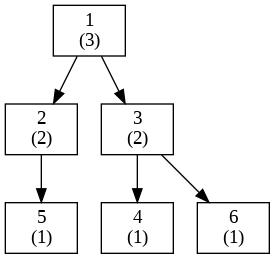

In [ ]:
import pygraphviz as pgv
class Node:
    _id_counter = 0
    def __init__(self, key, weight=1):
        self.key = key
        self.weight = weight
        self.left = None
        self.right = None
        self.id = Node._id_counter
        Node._id_counter += 1
class WeightBiasedLeftistTree:
    def __init__(self):
        self.root = None
    def merge(self, h1, h2):
        if not h1:
            return h2
        if not h2:
            return h1
        if h1.key > h2.key:
            h1, h2 = h2, h1
        h1.right = self.merge(h1.right, h2)
        left_weight = h1.left.weight if h1.left else 0
        right_weight = h1.right.weight if h1.right else 0
        h1.weight = 1 + max(left_weight, right_weight)
        if not h1.left or left_weight < right_weight:
            h1.left, h1.right = h1.right, h1.left
        return h1
    def insert(self, key):
        new_node = Node(key)
        self.root = self.merge(self.root, new_node)
    def delete_min(self):
        if not self.root:
            return None
        min_key = self.root.key
        self.root = self.merge(self.root.left, self.root.right)
        return min_key
    def search(self, root, key):
        if not root or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        else:
            return self.search(root.right, key)
    def search_key(self, key):
        return self.search(self.root, key)
    def in_order_traversal(self, node, result):
        if node:
            self.in_order_traversal(node.left, result)
            result.append(node.key)
            self.in_order_traversal(node.right, result)
    def pre_order_traversal(self, node, result):
        if node:
            result.append(node.key)
            self.pre_order_traversal(node.left, result)
            self.pre_order_traversal(node.right, result)
    def post_order_traversal(self, node, result):
        if node:
            self.post_order_traversal(node.left, result)
            self.post_order_traversal(node.right, result)
            result.append(node.key)
    def visualize_tree(self, node, graph):
        if node:
            graph.add_node(node.id, label=f"{node.key}\n({node.weight})")
            if node.left:
                graph.add_edge(node.id, node.left.id)
                self.visualize_tree(node.left, graph)
            if node.right:
                graph.add_edge(node.id, node.right.id)
                self.visualize_tree(node.right, graph)
    def display_tree(self):
        graph = pgv.AGraph(directed=True)
        graph.node_attr['shape'] = 'box'
        self.visualize_tree(self.root, graph)
        graph.layout(prog='dot')
        graph.draw('weight_biased_leftist_tree.png')
        return 'weight_biased_leftist_tree.png'
    def display_traversals(self):
        in_order_result = []
        pre_order_result = []
        post_order_result = []
        self.in_order_traversal(self.root, in_order_result)
        self.pre_order_traversal(self.root, pre_order_result)
        self.post_order_traversal(self.root, post_order_result)
        return {
            'In-Order Traversal': in_order_result,
            'Pre-Order Traversal': pre_order_result,
            'Post-Order Traversal': post_order_result
        }
weight_biased_leftist_tree = WeightBiasedLeftistTree()
keys = [3, 1, 5, 2, 4, 6]
for key in keys:
    weight_biased_leftist_tree.insert(key)
print("Initial Weight-Biased Leftist Tree:")
image_path = weight_biased_leftist_tree.display_tree()
print("Image path:", image_path)
search_key = 4
print(f"\nSearch for key {search_key}:")
search_result = weight_biased_leftist_tree.search_key(search_key)
if search_result:
    print(f"Key {search_key} found in the tree.")
else:
    print(f"Key {search_key} not found in the tree.")
min_key = weight_biased_leftist_tree.delete_min()
print(f"\nDeleted minimum key = {min_key}")
traversals = weight_biased_leftist_tree.display_traversals()
for traversal, result in traversals.items():
    print(f"{traversal} =", result)
from IPython.display import Image
Image(image_path)

**XOR Tree**

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.both = 0
class XORLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    def XOR(self, a, b):
        return a ^ b
    def insert_beginning(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.both = id(self.head)
            self.head.both = self.XOR(id(new_node), self.head.both)
            self.head = new_node
    def insert_end(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.both = id(self.tail)
            self.tail.both = self.XOR(id(new_node), self.tail.both)
            self.tail = new_node
    def delete_beginning(self):
        if not self.head:
            return None
        data = self.head.data
        if self.head == self.tail:
            self.head = None
            self.tail = None
        else:
            next_node_id = self.XOR(0, self.head.both)
            next_node = self.get_node_by_id(next_node_id)
            if next_node:
                next_node.both = self.XOR(id(self.head), next_node.both)
            self.head = next_node
        return data
    def delete_end(self):
        if not self.tail:
            return None
        data = self.tail.data
        if self.head == self.tail:
            self.head = None
            self.tail = None
        else:
            prev_node_id = self.XOR(0, self.tail.both)
            prev_node = self.get_node_by_id(prev_node_id)
            if prev_node:
                prev_node.both = self.XOR(id(self.tail), prev_node.both)
            self.tail = prev_node
        return data
    def search(self, target):
        current = self.head
        prev_id = 0
        while current:
            if current.data == target:
                return current.data
            next_id = self.XOR(prev_id, current.both)
            prev_id = id(current)
            current = self.get_node_by_id(next_id)
        return None
    def forward_traversal(self):
        result = []
        current = self.head
        prev_id = 0
        while current:
            result.append(current.data)
            next_id = self.XOR(prev_id, current.both)
            prev_id = id(current)
            current = self.get_node_by_id(next_id)
        return result
    def backward_traversal(self):
        result = []
        current = self.tail
        prev_id = 0
        while current:
            result.append(current.data)
            prev_id, current = id(current), self.get_previous_node(current, prev_id)
        return result
    def get_node_by_id(self, node_id):
        try:
            return object.__reduce__(node_id)[0]
        except TypeError:
            return None
    def get_previous_node(self, current, prev_id):
        next_id = self.XOR(prev_id, current.both)
        return self.get_node_by_id(next_id)
xor_linked_list = XORLinkedList()
xor_linked_list.insert_beginning(1)
xor_linked_list.insert_beginning(2)
xor_linked_list.insert_beginning(3)
xor_linked_list.insert_end(4)
xor_linked_list.insert_end(5)
print("Forward Traversal =", xor_linked_list.forward_traversal())
print("Backward Traversal =", xor_linked_list.backward_traversal())
search_result = xor_linked_list.search(4)
print("Search Result:", search_result)
deleted_data_beginning = xor_linked_list.delete_beginning()
print("Deleted from Beginning:", deleted_data_beginning)
print("Forward Traversal =", xor_linked_list.forward_traversal())
print("Backward Traversal =", xor_linked_list.backward_traversal())
deleted_data_end = xor_linked_list.delete_end()
print("Deleted from End =", deleted_data_end)
print("Forward Traversal =", xor_linked_list.forward_traversal())
print("Backward Traversal =", xor_linked_list.backward_traversal())

Forward Traversal = [3]
Backward Traversal = [5]
Search Result: None
Deleted from Beginning: 3
Forward Traversal = []
Backward Traversal = [5]
Deleted from End = 5
Forward Traversal = []
Backward Traversal = []


In [ ]:
import pygraphviz as pgv
from IPython.display import Image
class Node:
    def __init__(self, data):
        self.data = data
        self.both = 0
class XORLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    def XOR(self, a, b):
        return a ^ b
    def insert_beginning(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.both = id(self.head)
            self.head.both = self.XOR(id(new_node), self.head.both)
            self.head = new_node
    def insert_end(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            self.tail = new_node
        else:
            new_node.both = id(self.tail)
            self.tail.both = self.XOR(id(new_node), self.tail.both)
            self.tail = new_node
    def delete_beginning(self):
        if not self.head:
            return None
        data = self.head.data
        if self.head == self.tail:
            self.head = None
            self.tail = None
        else:
            next_node_id = self.XOR(0, self.head.both)
            next_node = self.get_node_by_id(next_node_id)
            if next_node:
                next_node.both = self.XOR(id(self.head), next_node.both)
            self.head = next_node
        return data
    def delete_end(self):
        if not self.tail:
            return None
        data = self.tail.data
        if self.head == self.tail:
            self.head = None
            self.tail = None
        else:
            prev_node_id = self.XOR(0, self.tail.both)
            prev_node = self.get_node_by_id(prev_node_id)
            if prev_node:
                prev_node.both = self.XOR(id(self.tail), prev_node.both)
            self.tail = prev_node
        return data
    def forward_traversal(self):
        result = []
        current = self.head
        prev_id = 0
        while current:
            result.append(current.data)
            next_id = self.XOR(prev_id, current.both)
            prev_id = id(current)
            current = self.get_node_by_id(next_id)
        return result
    def visualize_list(self):
        graph = pgv.AGraph(directed=True)
        graph.node_attr['shape'] = 'box'
        current = self.head
        prev_id = 0
        while current:
            graph.add_node(id(current), label=f"{current.data}")
            next_id = self.XOR(prev_id, current.both)
            if next_id:
                graph.add_edge(id(current), next_id)
            prev_id = id(current)
            current = self.get_node_by_id(next_id)
        graph.layout(prog='dot')
        graph.draw('xor_linked_list.png')
        return 'xor_linked_list.png'
    def display_image(self, image_path):
        return Image(filename=image_path)
    def get_node_by_id(self, node_id):
        try:
            return object.__reduce__(node_id)[0]
        except TypeError:
            return None
xor_linked_list = XORLinkedList()
while True:
    print("\nXOR Linked List Operations:")
    print("1. Insert at the Beginning")
    print("2. Insert at the End")
    print("3. Delete from the Beginning")
    print("4. Delete from the End")
    print("5. Forward Traversal")
    print("6. Visualize List")
    print("7. Exit")
    choice = input("Enter your choice (1-7): ")
    if choice == '1':
        data = input("Enter data to insert at the beginning: ")
        xor_linked_list.insert_beginning(int(data))
    elif choice == '2':
        data = input("Enter data to insert at the end: ")
        xor_linked_list.insert_end(int(data))
    elif choice == '3':
        deleted_data = xor_linked_list.delete_beginning()
        print(f"Deleted from the beginning: {deleted_data}")
    elif choice == '4':
        deleted_data = xor_linked_list.delete_end()
        print(f"Deleted from the end: {deleted_data}")
    elif choice == '5':
        print("Forward Traversal:", xor_linked_list.forward_traversal())
    elif choice == '6':
        image_path = xor_linked_list.visualize_list()
        print("XOR Linked List Visualization:", image_path)
        xor_linked_list.display_image(image_path)
    elif choice == '7':
        print("Exiting the program.")
        break
    else:
        print("Invalid choice. Please enter a number between 1 and 7.")


XOR Linked List Operations:
1. Insert at the Beginning
2. Insert at the End
3. Delete from the Beginning
4. Delete from the End
5. Forward Traversal
6. Visualize List
7. Exit
Enter your choice (1-7): 1
Enter data to insert at the beginning: 5

XOR Linked List Operations:
1. Insert at the Beginning
2. Insert at the End
3. Delete from the Beginning
4. Delete from the End
5. Forward Traversal
6. Visualize List
7. Exit
Enter your choice (1-7): 2
Enter data to insert at the end: 10

XOR Linked List Operations:
1. Insert at the Beginning
2. Insert at the End
3. Delete from the Beginning
4. Delete from the End
5. Forward Traversal
6. Visualize List
7. Exit
Enter your choice (1-7): 6
XOR Linked List Visualization: xor_linked_list.png

XOR Linked List Operations:
1. Insert at the Beginning
2. Insert at the End
3. Delete from the Beginning
4. Delete from the End
5. Forward Traversal
6. Visualize List
7. Exit
Enter your choice (1-7): 1
Enter data to insert at the beginning: 15

XOR Linked List O

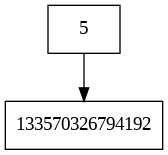

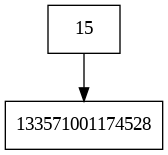

**Y Fast Trie**

In [ ]:
class Node:
    def __init__(self):
        self.prefix = None
        self.children = {}
class YFastTrie:
    def __init__(self):
        self.root = Node()
        self.max_level = 0
        self.min_level = 0
    def insert(self, key):
        binary_key = bin(key)[2:]
        current_node = self.root
        for bit in binary_key:
            if bit not in current_node.children:
                current_node.children[bit] = Node()
            current_node = current_node.children[bit]
        current_node.prefix = key
        self.max_level = max(self.max_level, len(binary_key))
    def find_predecessor(self, key):
        binary_key = bin(key)[2:]
        current_node = self.root
        predecessor = None
        for bit in binary_key:
            if bit in current_node.children:
                current_node = current_node.children[bit]
                predecessor = current_node.prefix
        return predecessor
    def find_successor(self, key):
        binary_key = bin(key)[2:]
        current_node = self.root
        successor = None
        for bit in reversed(binary_key):
            if '1' in current_node.children and current_node.children['1'].prefix > key:
                current_node = current_node.children['1']
                successor = current_node.prefix
            elif bit == '0' and '0' in current_node.children:
                current_node = current_node.children['0']
                successor = current_node.prefix
        return successor
yfast_trie = YFastTrie()
keys = [3, 5, 1, 9, 6]
for key in keys:
    yfast_trie.insert(key)
search_key = 4
predecessor = yfast_trie.find_predecessor(search_key)
successor = yfast_trie.find_successor(search_key)
print(f"Keys = {keys}")
print(f"Predecessor of {search_key} = {predecessor}")
print(f"Successor of {search_key} = {successor}")

Keys = [3, 5, 1, 9, 6]
Predecessor of 4 = None
Successor of 4 = None


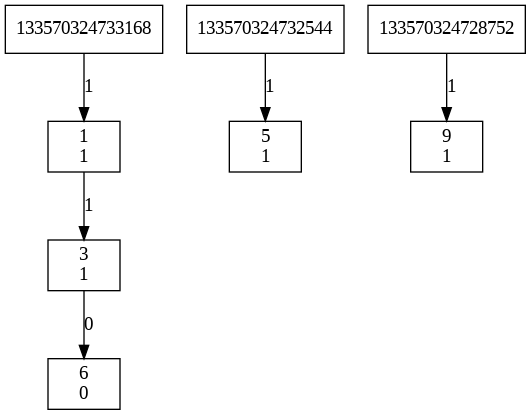

In [ ]:
import pygraphviz as pgv
from IPython.display import Image
class Node:
    def __init__(self):
        self.prefix = None
        self.children = {}
class YFastTrie:
    def __init__(self):
        self.root = Node()
        self.max_level = 0
        self.min_level = 0
    def insert(self, key):
        binary_key = bin(key)[2:]
        current_node = self.root
        for bit in binary_key:
            if bit not in current_node.children:
                current_node.children[bit] = Node()
            current_node = current_node.children[bit]
        current_node.prefix = key
        self.max_level = max(self.max_level, len(binary_key))
    def find_predecessor(self, key):
        binary_key = bin(key)[2:]
        current_node = self.root
        predecessor = None
        for bit in binary_key:
            if bit in current_node.children:
                current_node = current_node.children[bit]
                predecessor = current_node.prefix
        return predecessor
    def find_successor(self, key):
        binary_key = bin(key)[2:]
        current_node = self.root
        successor = None
        for bit in reversed(binary_key):
            if '1' in current_node.children and current_node.children['1'].prefix > key:
                current_node = current_node.children['1']
                successor = current_node.prefix
            elif bit == '0' and '0' in current_node.children:
                current_node = current_node.children['0']
                successor = current_node.prefix
        return successor
    def visualize_trie(self):
        graph = pgv.AGraph(directed=True)
        graph.node_attr['shape'] = 'box'
        self._visualize_recursive(self.root, graph)
        graph.layout(prog='dot')
        graph.draw('yfast_trie.png')
        return 'yfast_trie.png'
    def _visualize_recursive(self, node, graph, parent_id=None, bit_label=None):
        if node.prefix is not None:
            label = f"{node.prefix}\n{bit_label}" if bit_label else str(node.prefix)
            graph.add_node(id(node), label=label)
            if parent_id is not None:
                graph.add_edge(parent_id, id(node), label=bit_label)
        for bit, child_node in node.children.items():
            self._visualize_recursive(child_node, graph, id(node), bit)
yfast_trie = YFastTrie()
keys = [3, 5, 1, 9, 6]
for key in keys:
    yfast_trie.insert(key)
image_path = yfast_trie.visualize_trie()
Image(filename=image_path)



---

**`Thanks and Goodbye!`**

---

